<a href="https://colab.research.google.com/github/anandhramadoss/Loan_Default_Prediction/blob/master/Credit_Risk_Team5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/Loan_Default')
%cd Loan_Default


Mounted at /Loan_Default
[Errno 2] No such file or directory: 'Loan_Default'
/content


In [3]:
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None)
file = open('/Loan_Default/My Drive/Loan_Default/application_data.csv')
df = pd.read_csv(file)
print(df.head(20))


    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017      

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df.shape

Mounted at /content/drive


(307511, 122)

     |████████████████████████████████| 81kB 2.3MB/s 


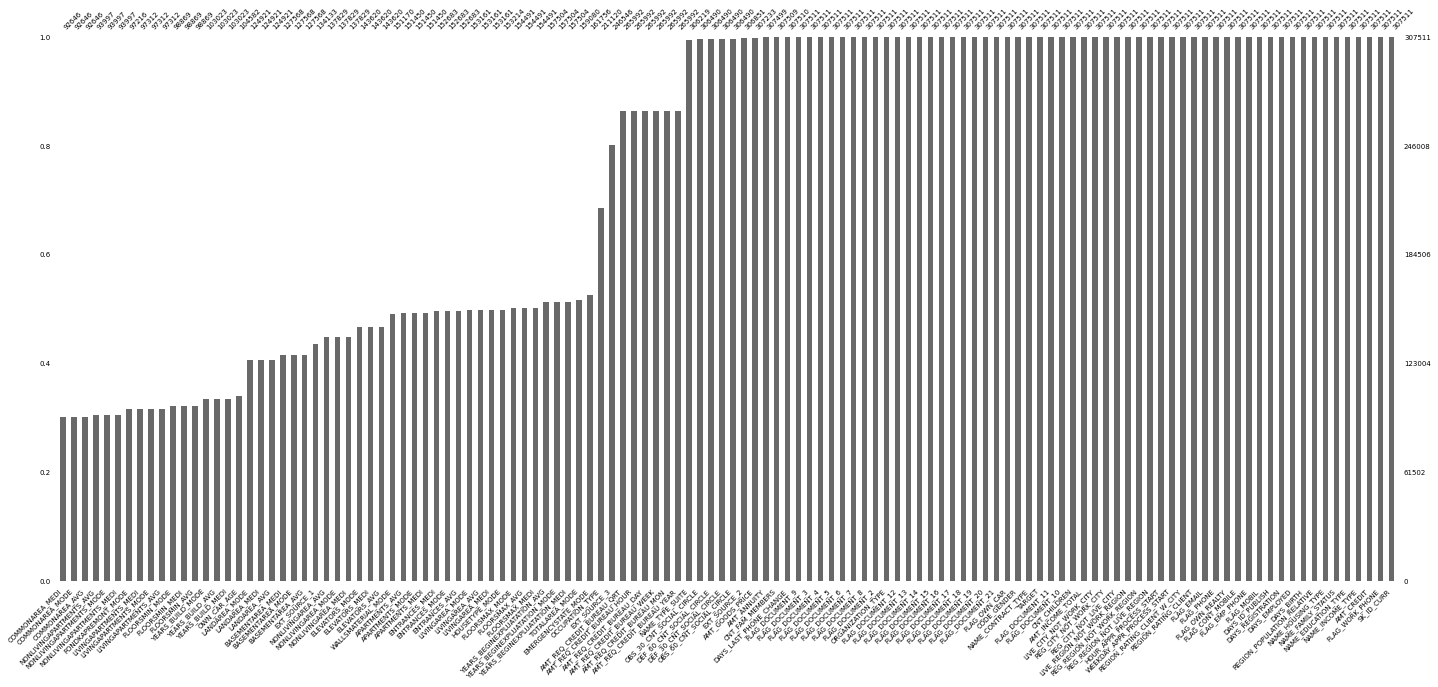

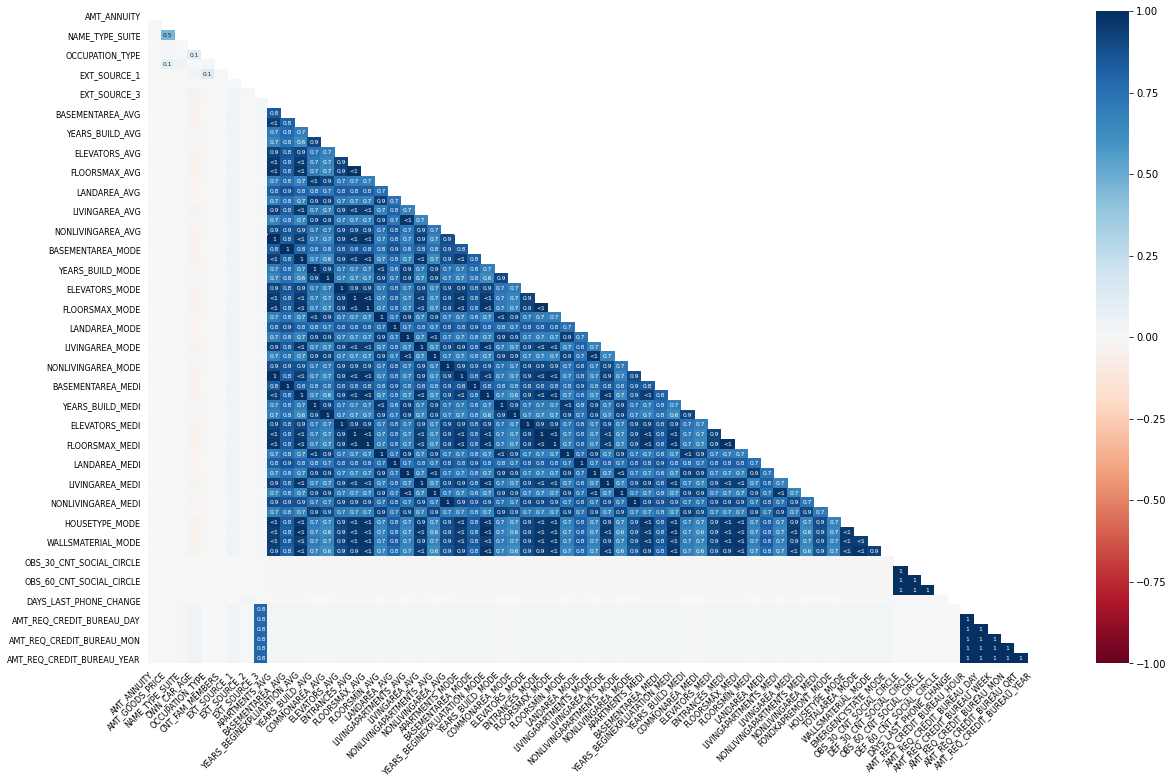

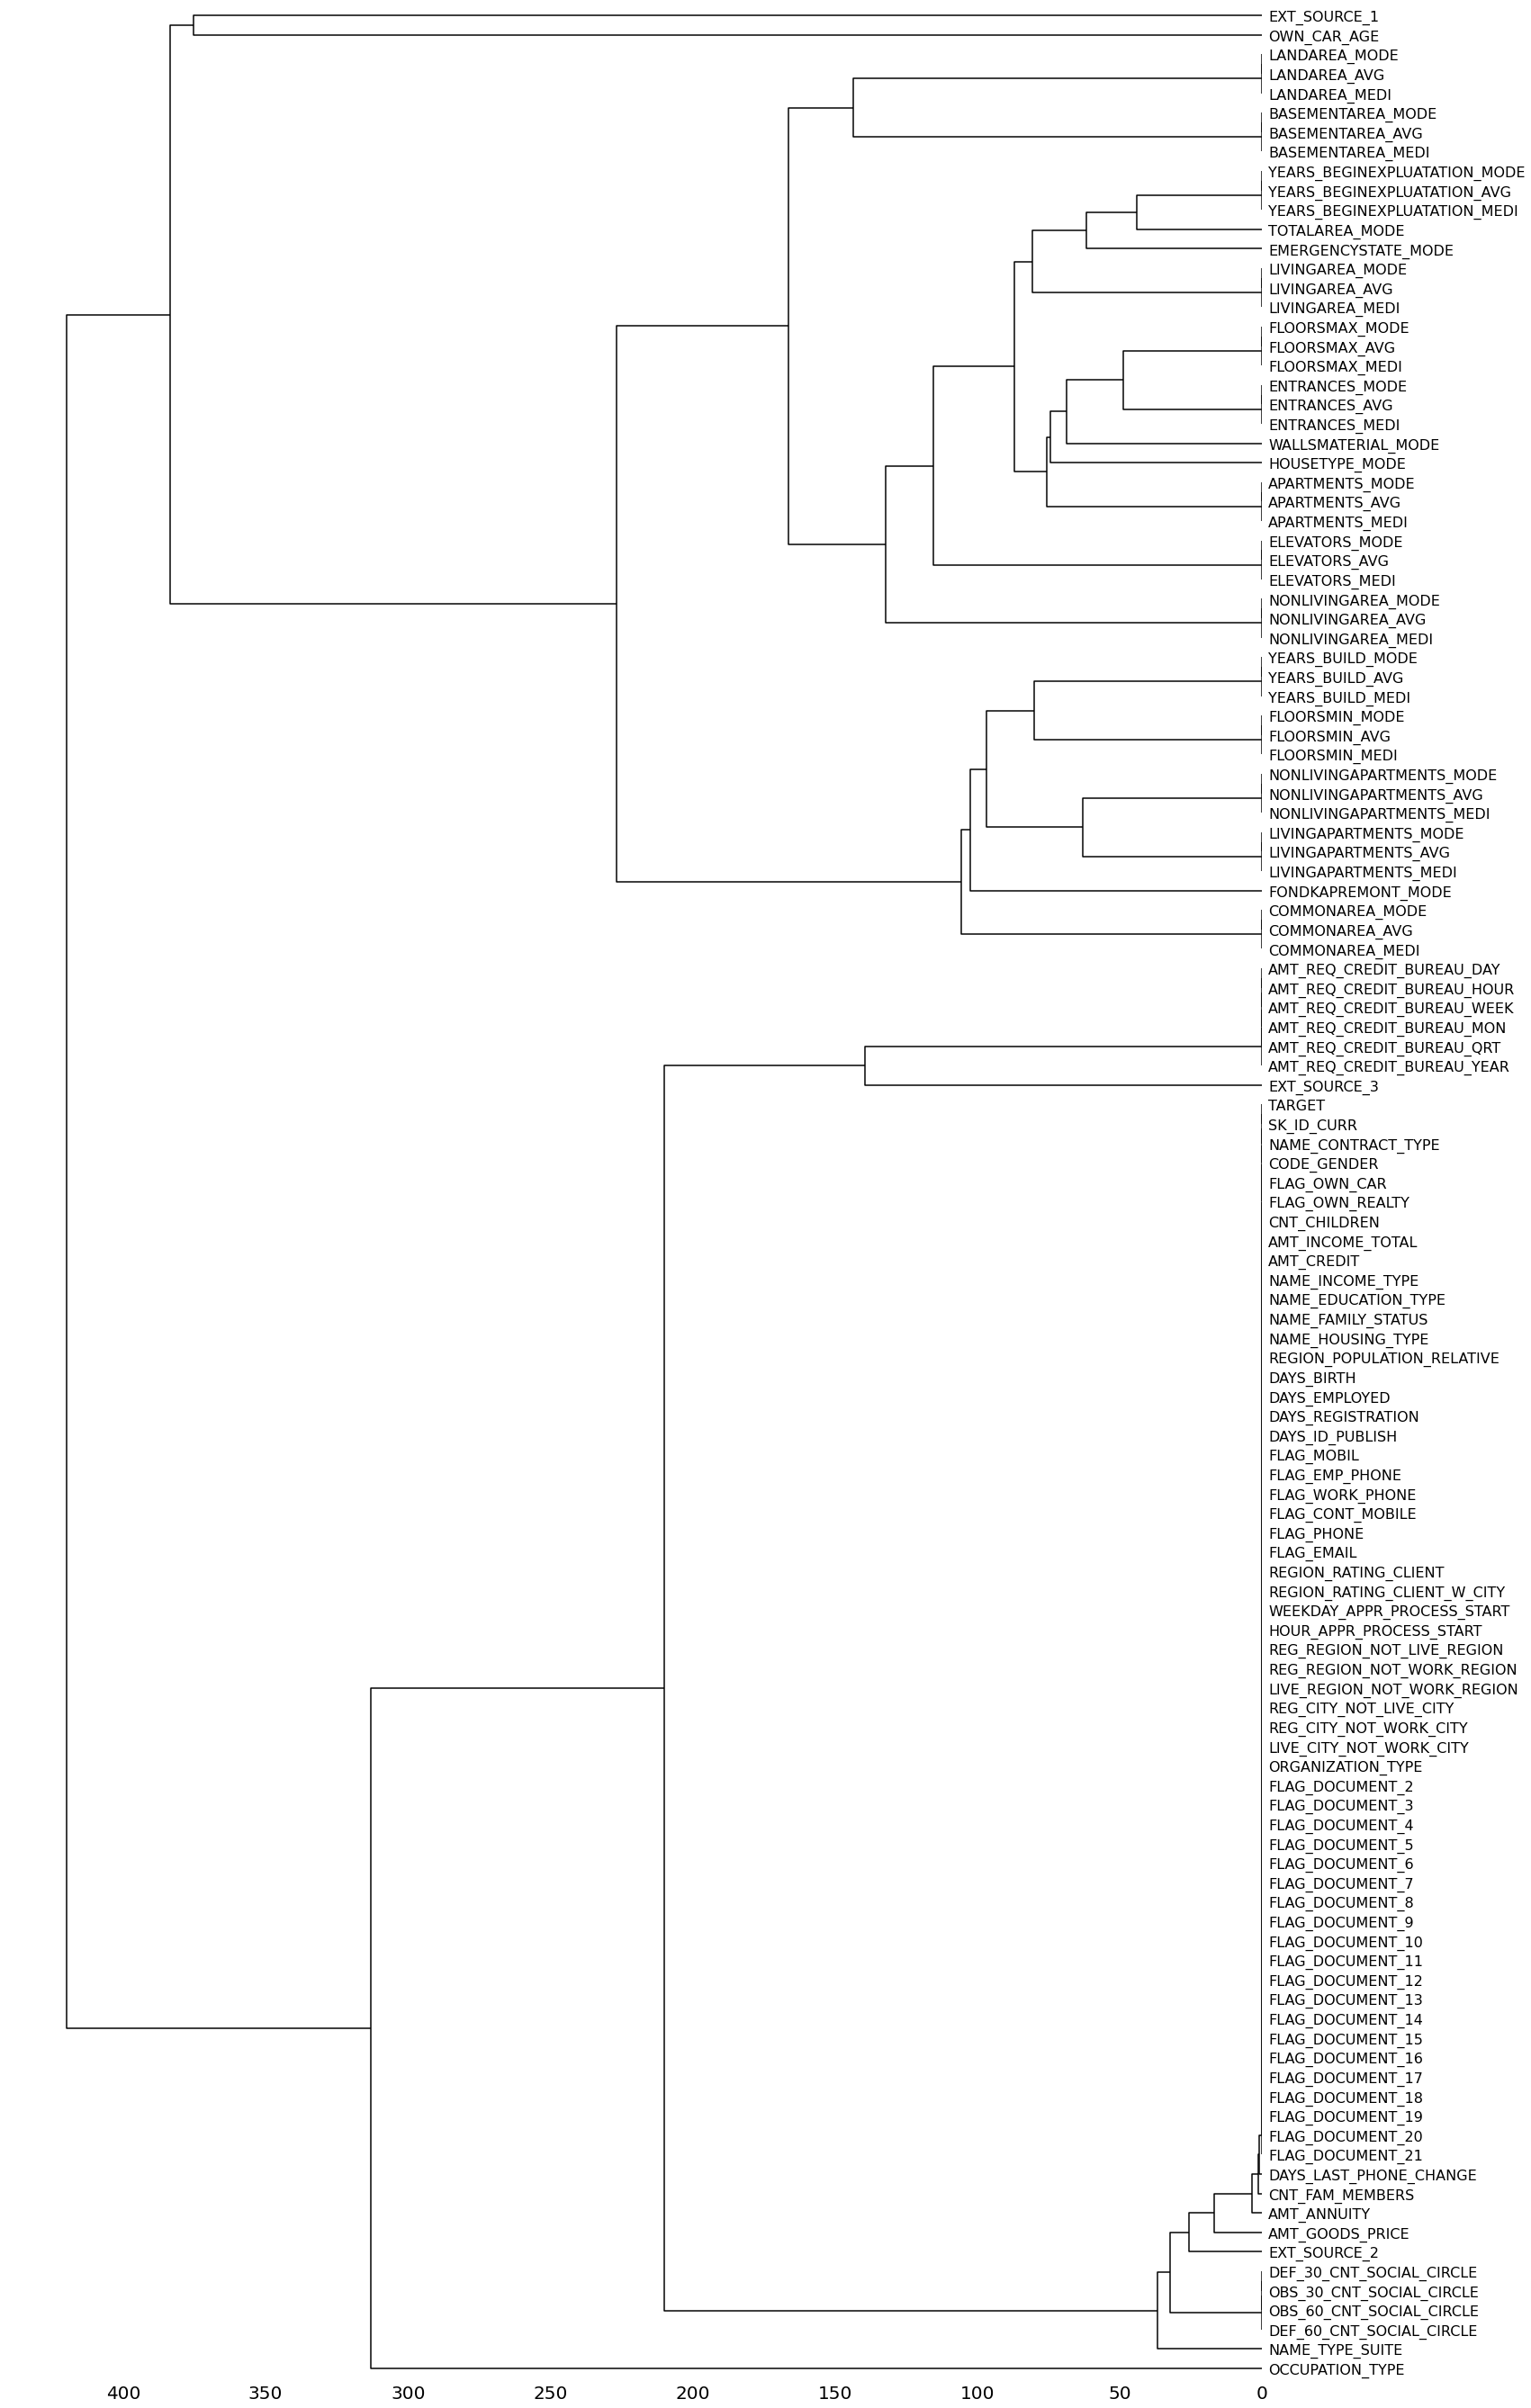

In [5]:
!pip install category_encoders
import missingno as msno 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import category_encoders as ce
  
# Visualize missing values as a matrix 
msno.bar(df,labels=True, fontsize = 7,sort='ascending')

#Correlation
msno.heatmap(df,fontsize = 8)
msno.dendrogram(df)

#https://towardsdatascience.com/visualize-missing-values-with-missingno-ad4d938b00a1


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
    #Percentage of Null values. This returns a panda scalar
    null_sum = df.isnull().sum()
    
    # instantiate columns for missing data
  
    total = null_sum.sort_values(ascending=False)
    
    #Calculates Percentage of Null values. This returns a panda scalar
    percent = ( ((null_sum / len(df.index))*100).round(2) ).sort_values(ascending=False)
    print(percent)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    #df_NA = df_NA[ (df_NA.T != 0).any() ]

    #df_NA = df_NA[ (df_NA.T).any() ]
    #https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

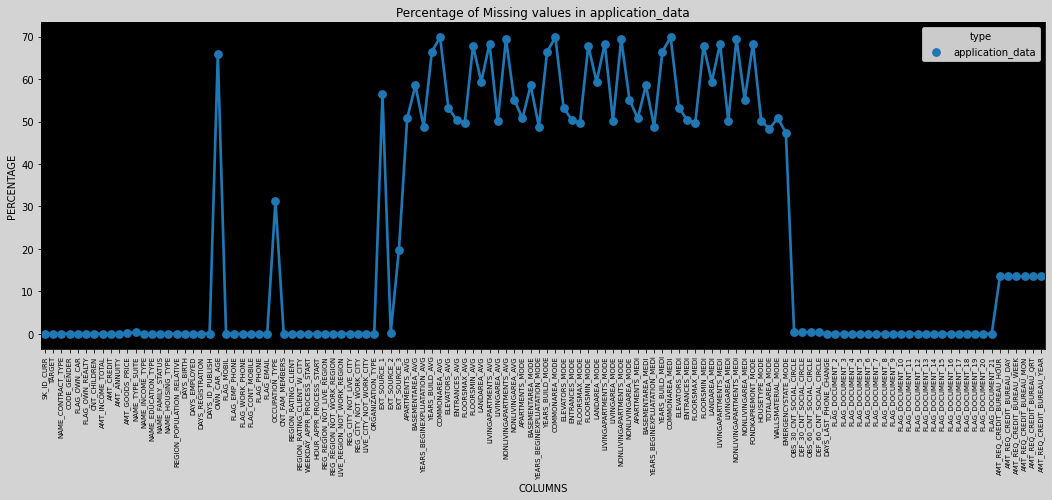

In [8]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")


In [9]:
df_NaN =df.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE"],axis=1)
print(df_NaN.head(20))

    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017      

In [10]:
#plt.hist(df_NaN);

In [11]:
obj_dtypes = [i for i in df_NaN.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in df_NaN.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

print('Categorical Columns' , "\n")
for x in range(len(obj_dtypes)): 
  print(obj_dtypes[x])

print("\n", 'Numeric Columns' , "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

print(obj_dtypes[0])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE

 Numeric Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FL

Data Exploration: Histograms 

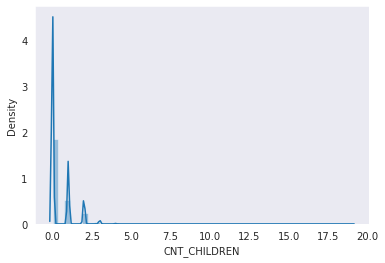

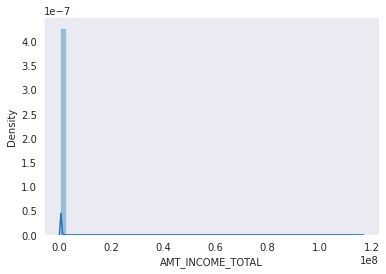

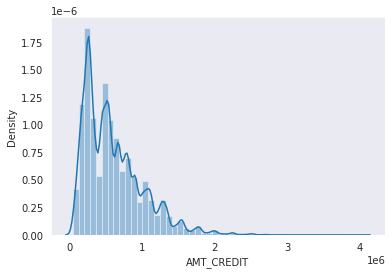

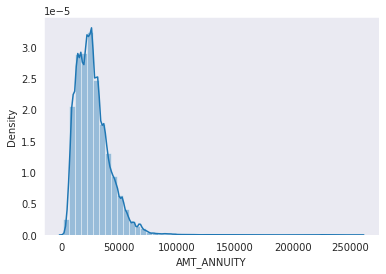

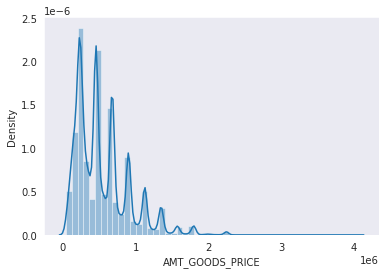

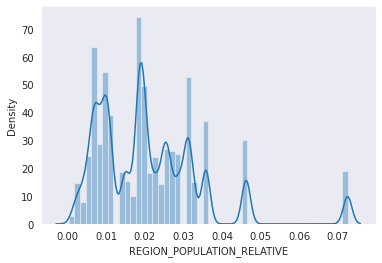

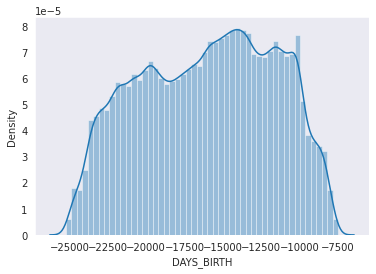

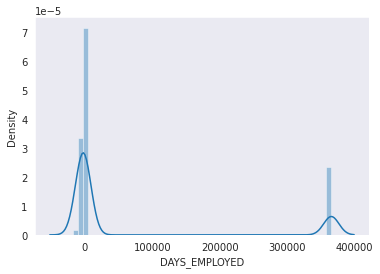

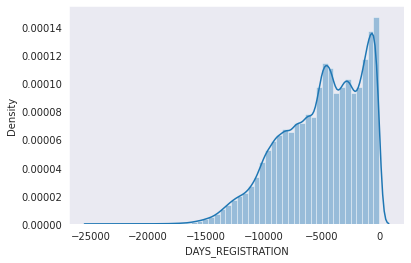

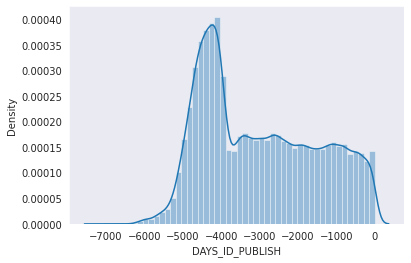

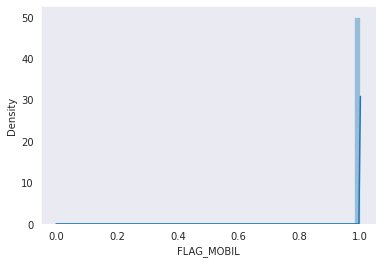

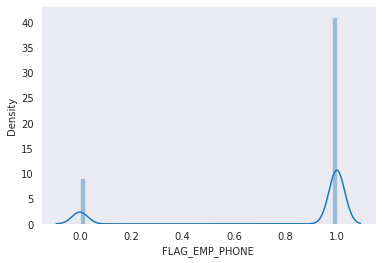

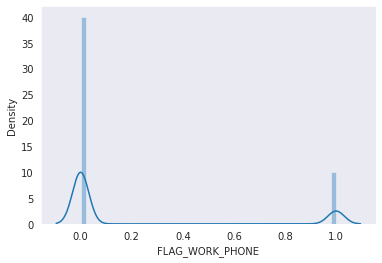

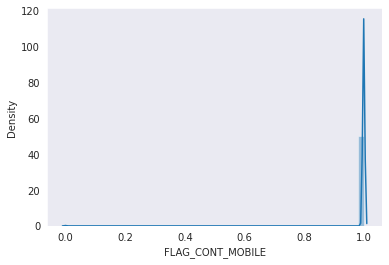

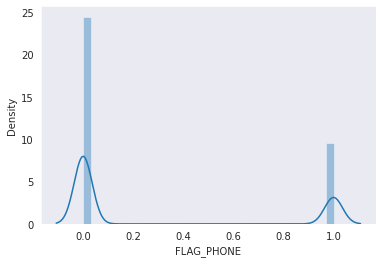

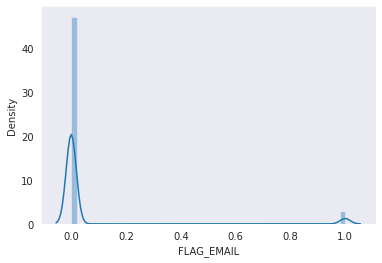

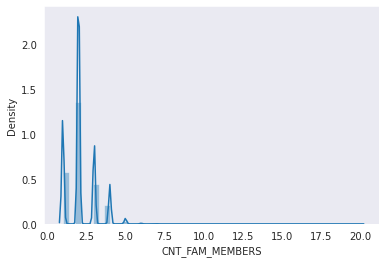

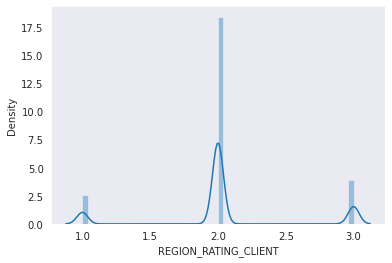

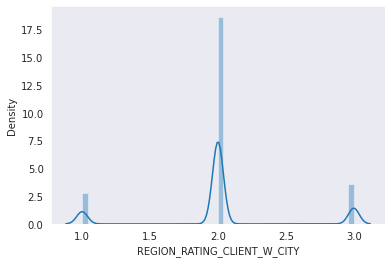

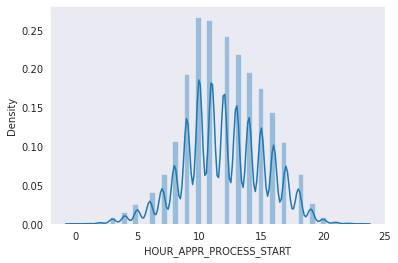

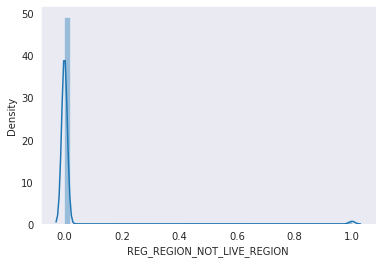

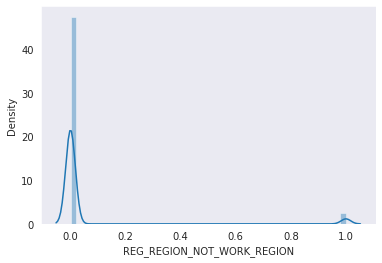

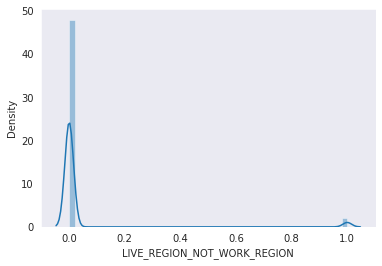

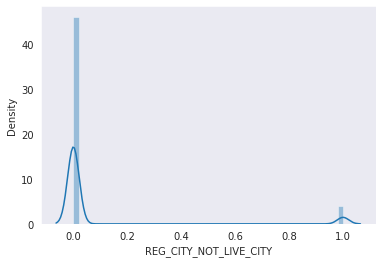

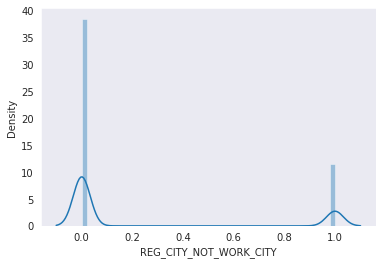

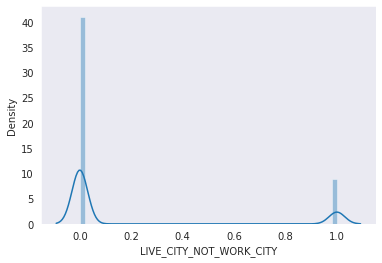

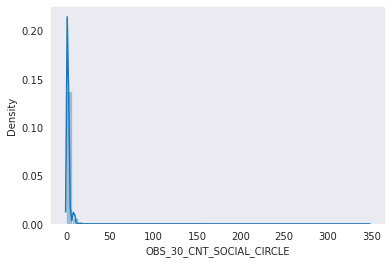

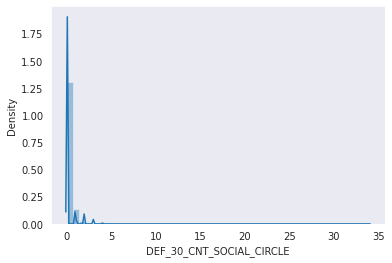

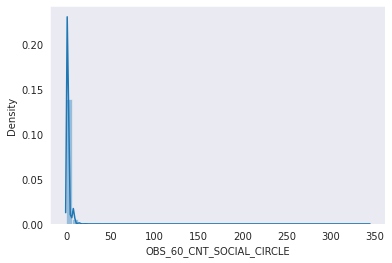

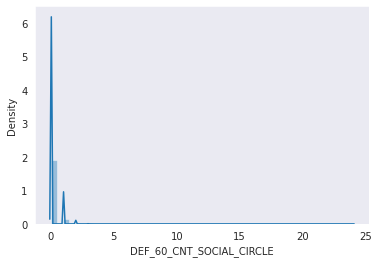

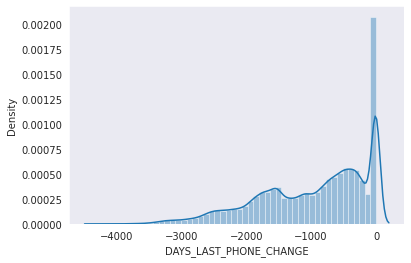

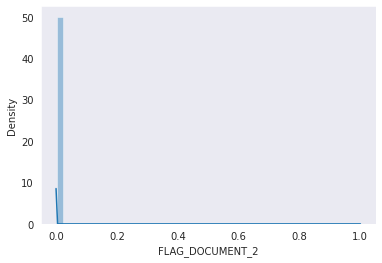

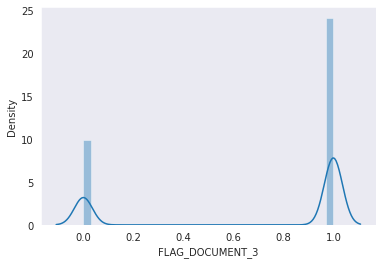

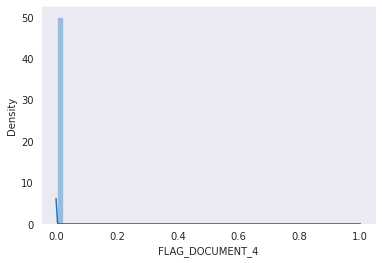

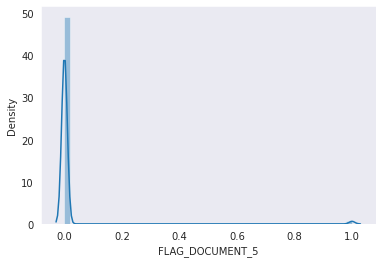

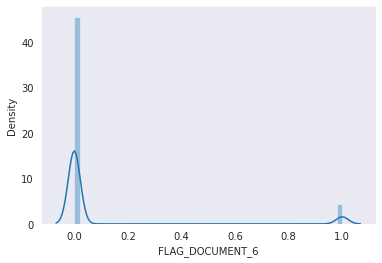

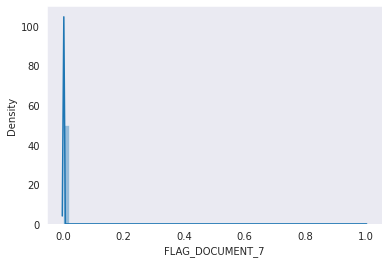

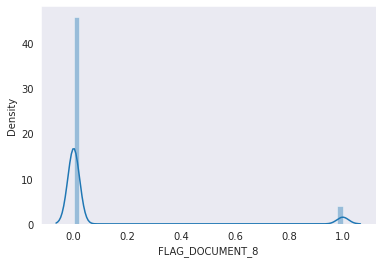

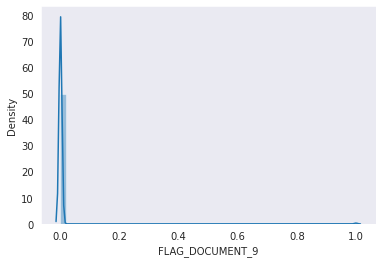

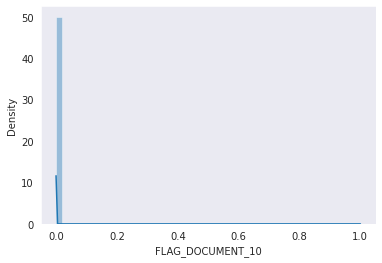

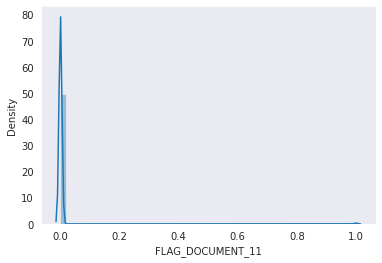

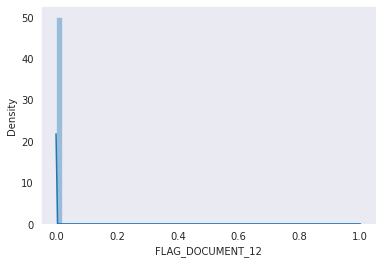

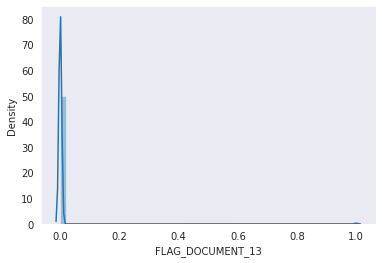

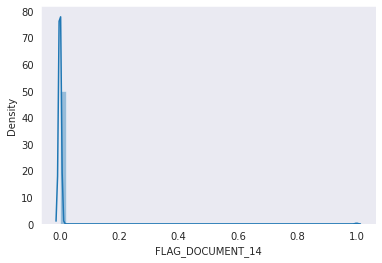

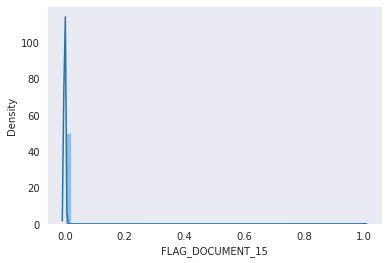

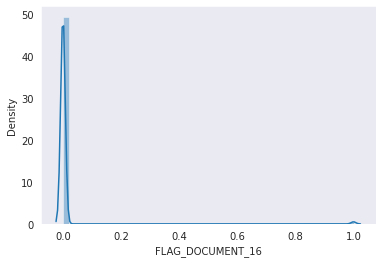

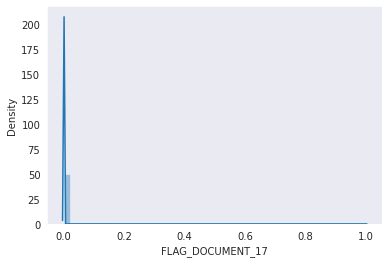

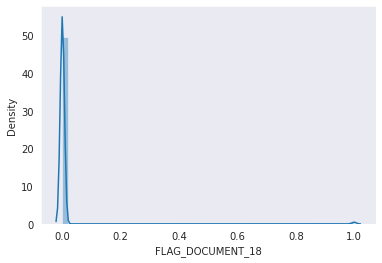

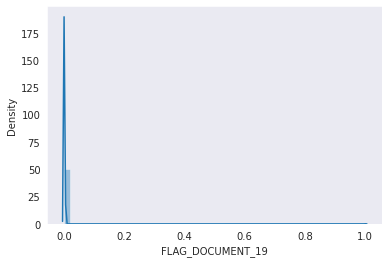

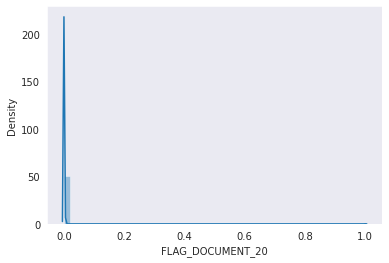

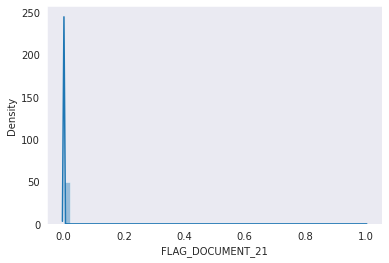

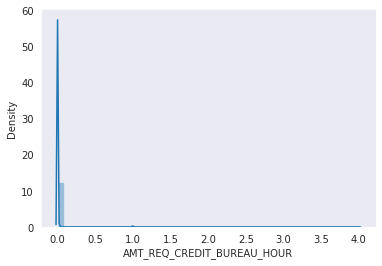

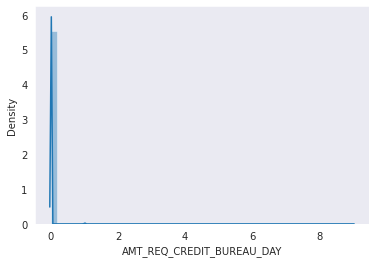

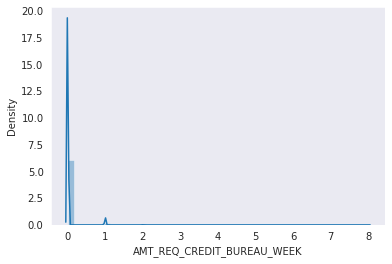

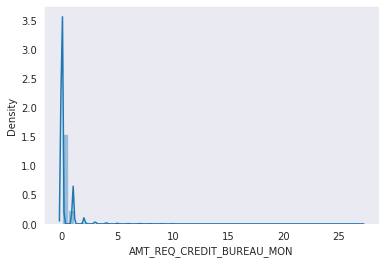

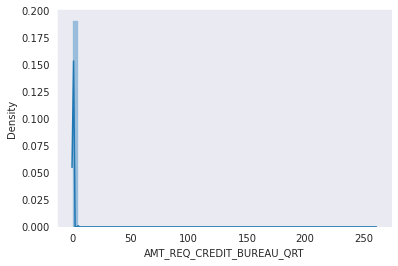

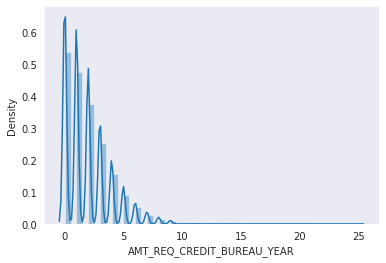

In [12]:
# Histograms for all Numeric features
for x in num_dtypes:#df_NaN.columns.values:
    sns.set_style('dark') 
    sns.distplot(df_NaN[x]) 
    plt.show()


In [13]:
df.size

37516342

In [14]:
# Histograms for all columns

df_NaN.describe(include = 'all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

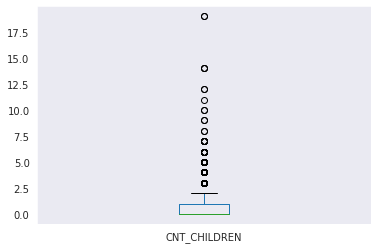

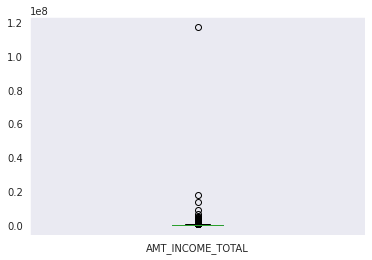

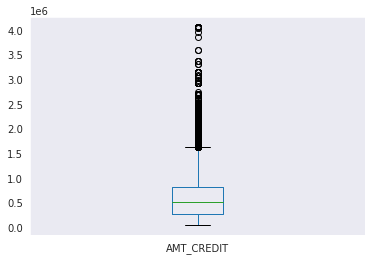

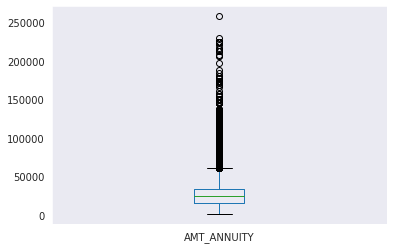

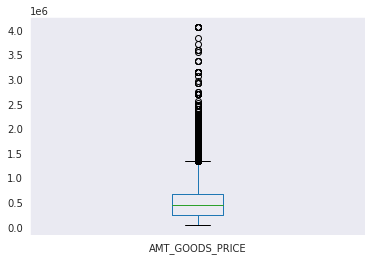

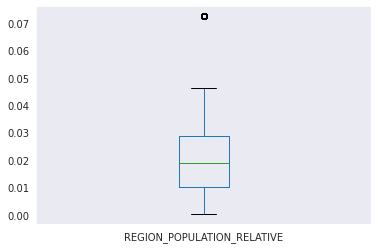

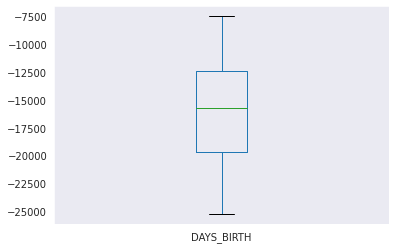

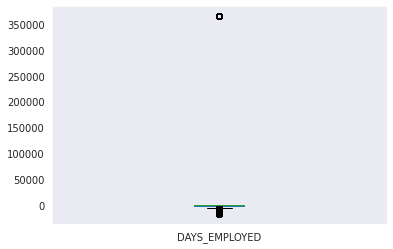

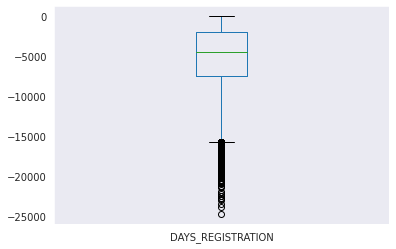

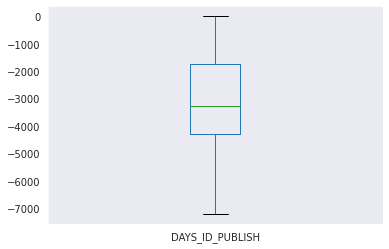

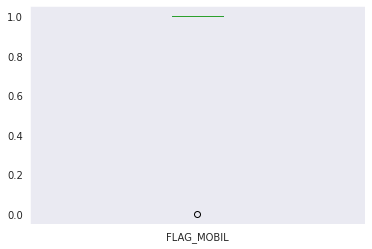

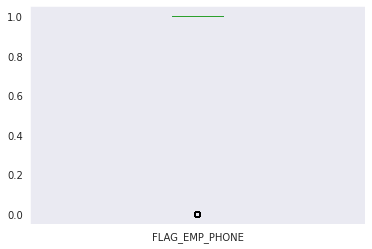

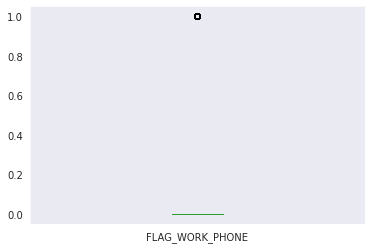

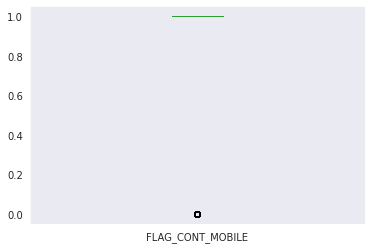

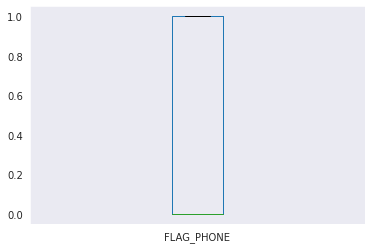

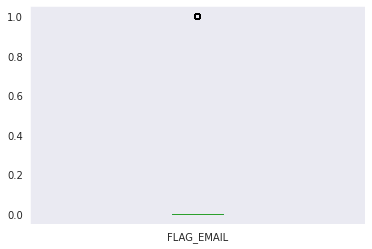

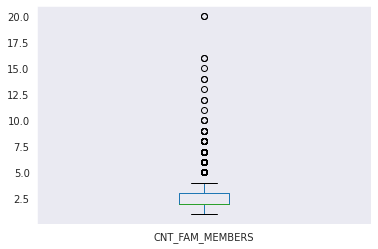

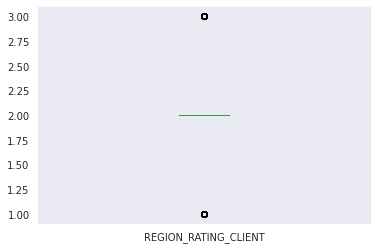

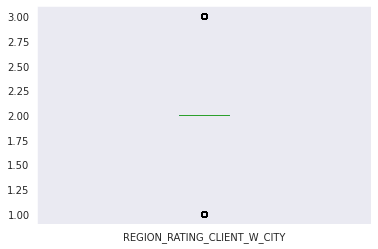

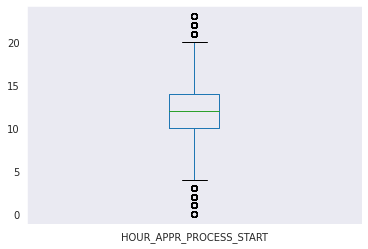

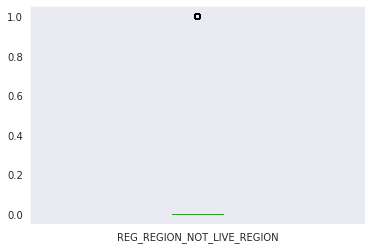

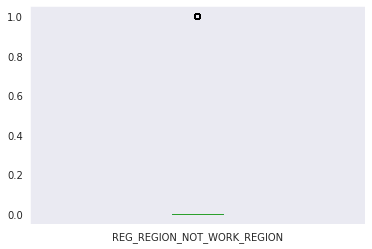

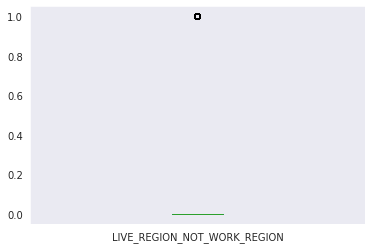

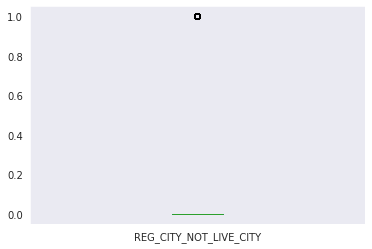

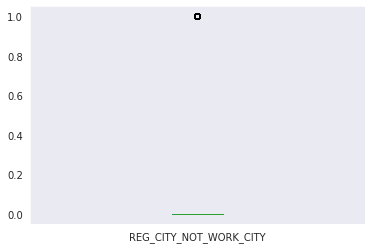

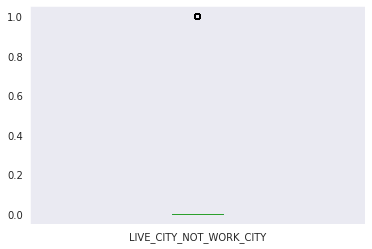

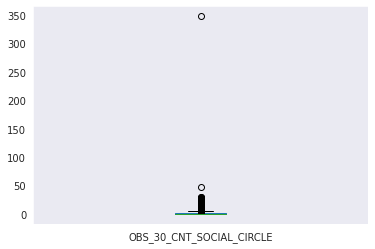

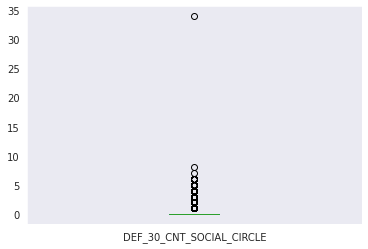

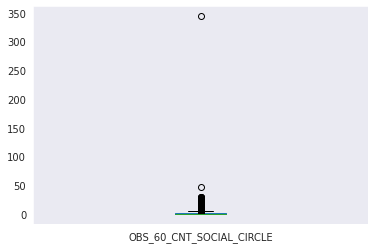

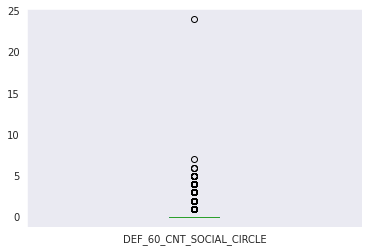

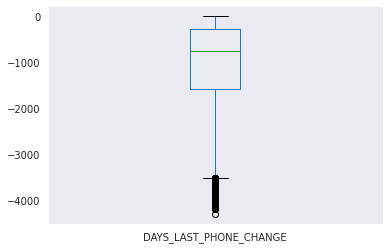

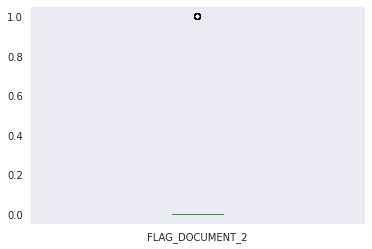

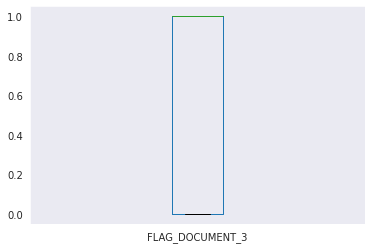

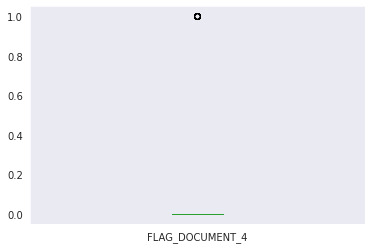

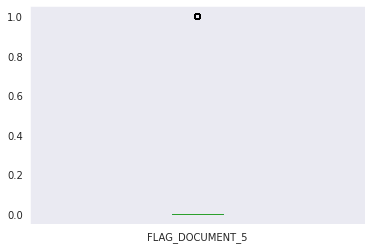

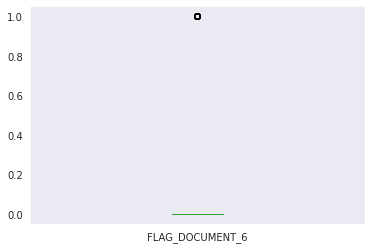

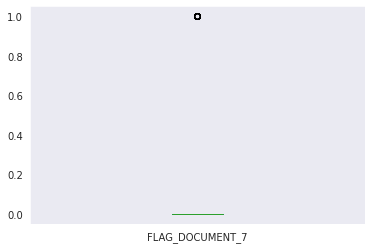

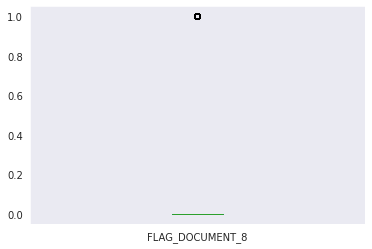

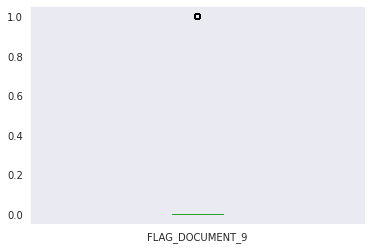

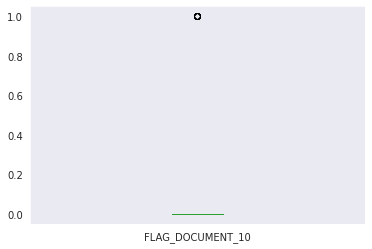

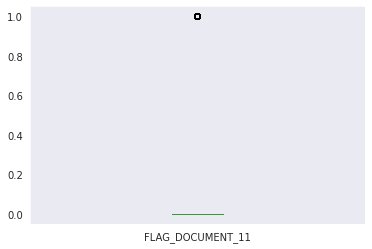

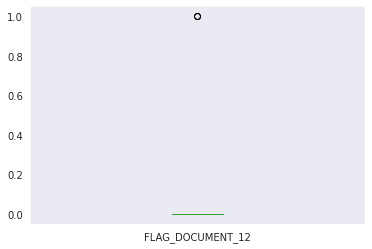

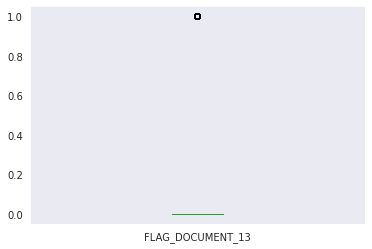

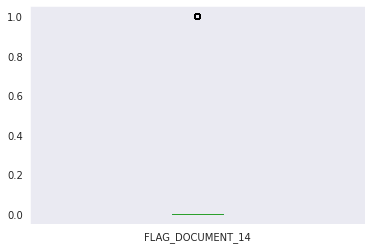

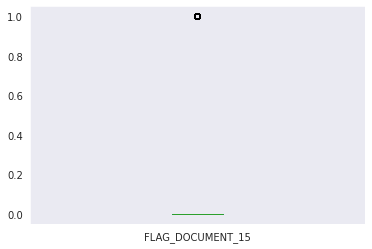

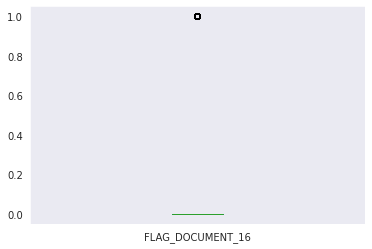

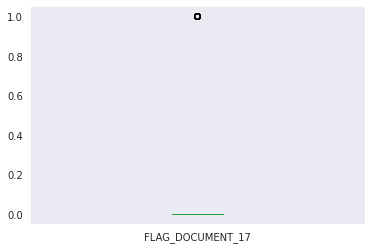

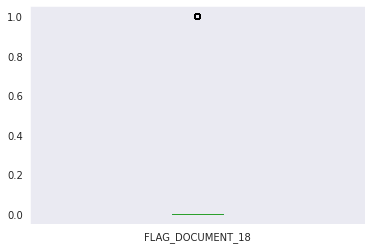

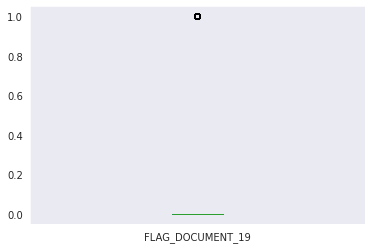

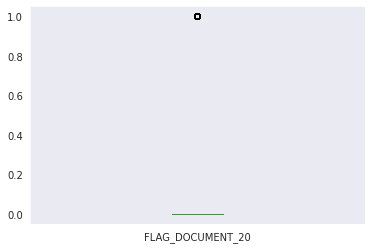

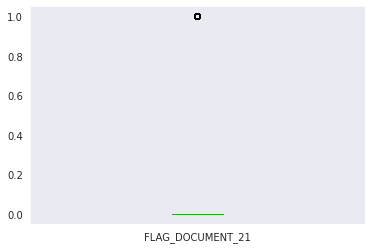

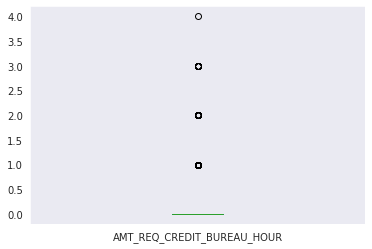

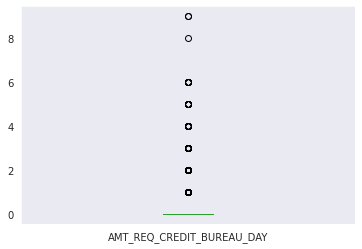

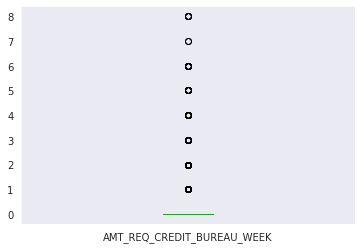

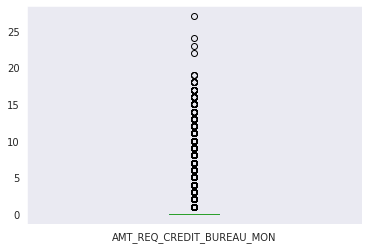

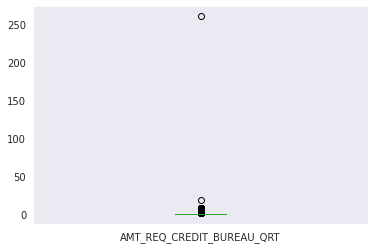

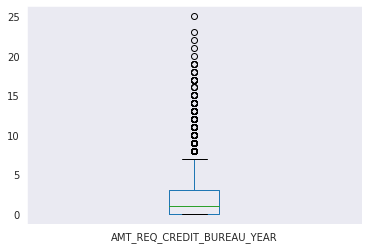

In [15]:

# Box Plots for all numeric features
for x in num_dtypes:#df_NaN.columns.values:
    df_NaN[x].plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
    plt.show()

In [16]:
# Plot scatter plots for features that may be correlated. To eliminate a feature.
##from pandas.plotting import scatter_matrix
##scatter_matrix(df_NaN[num_dtypes])

#for x in num_dtypes:#df_NaN.columns.values:
#    scatter_matrix(df_NaN[x])#.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
#    plt.show()


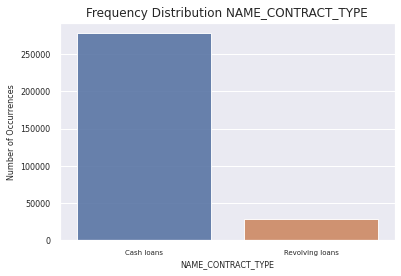

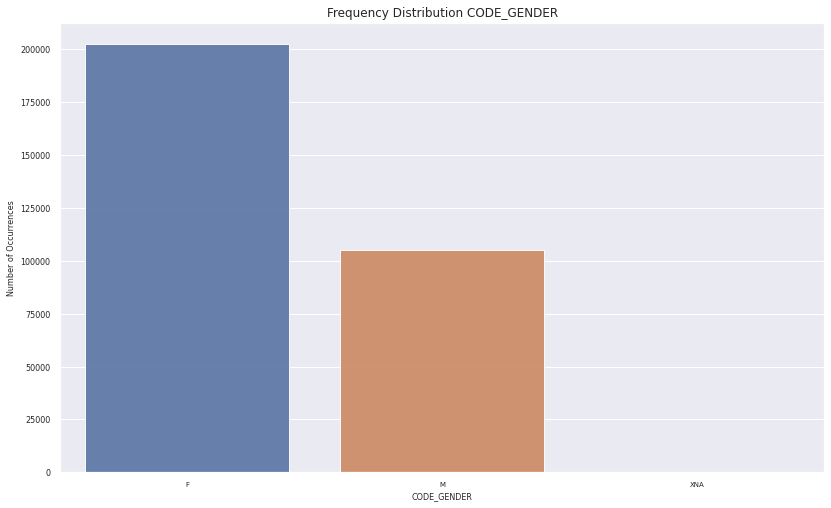

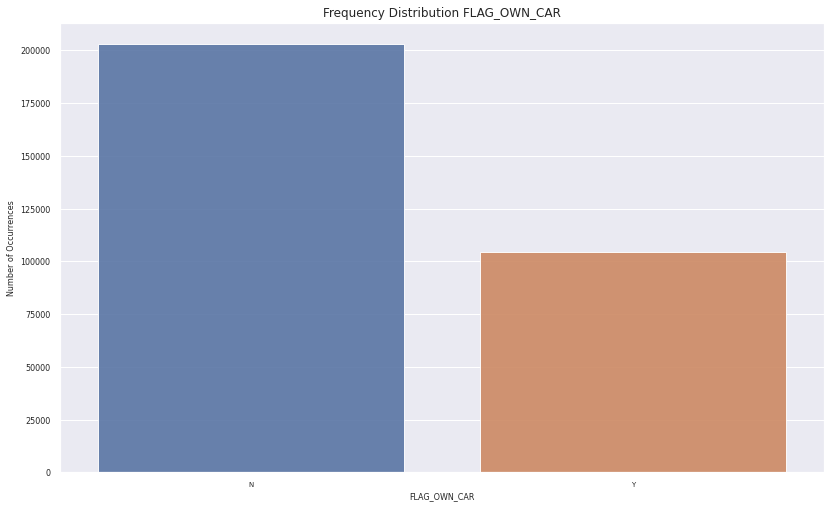

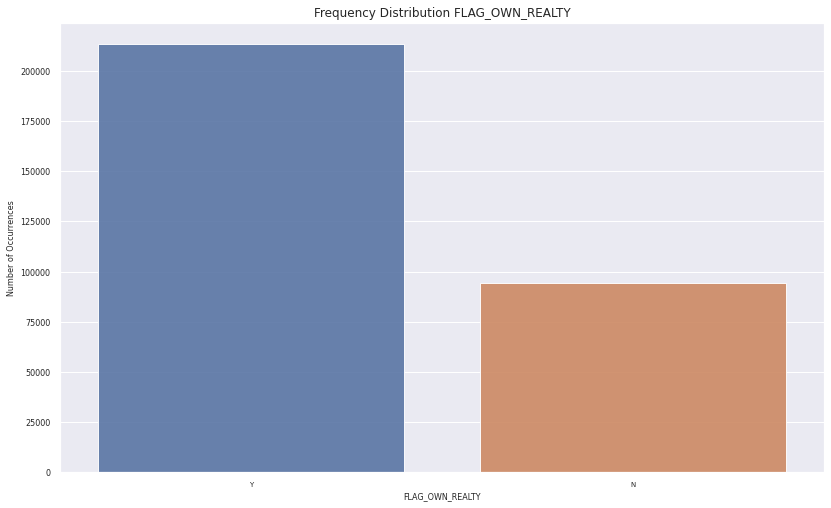

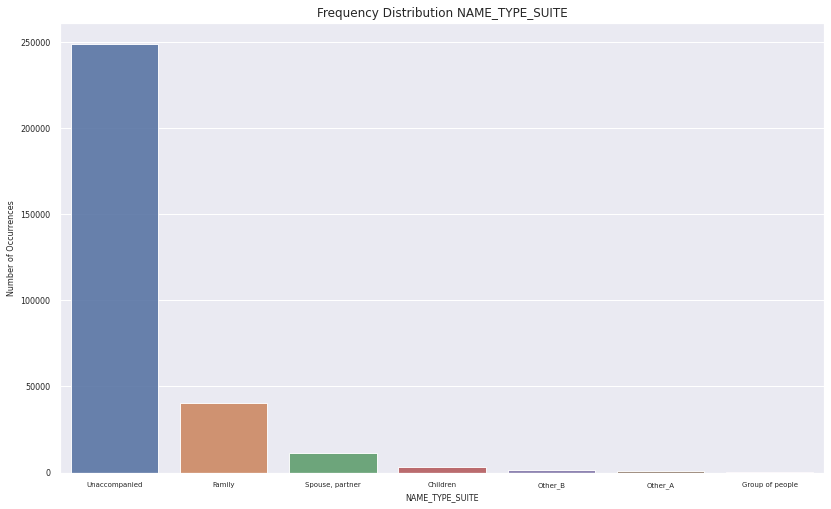

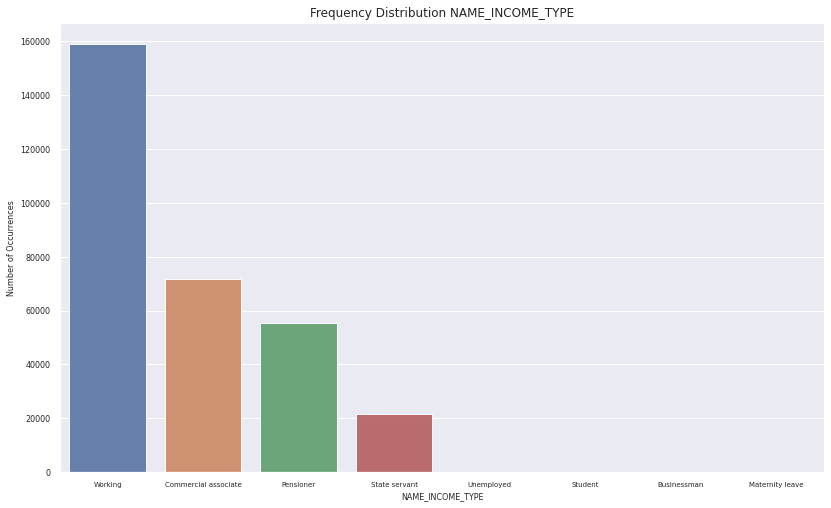

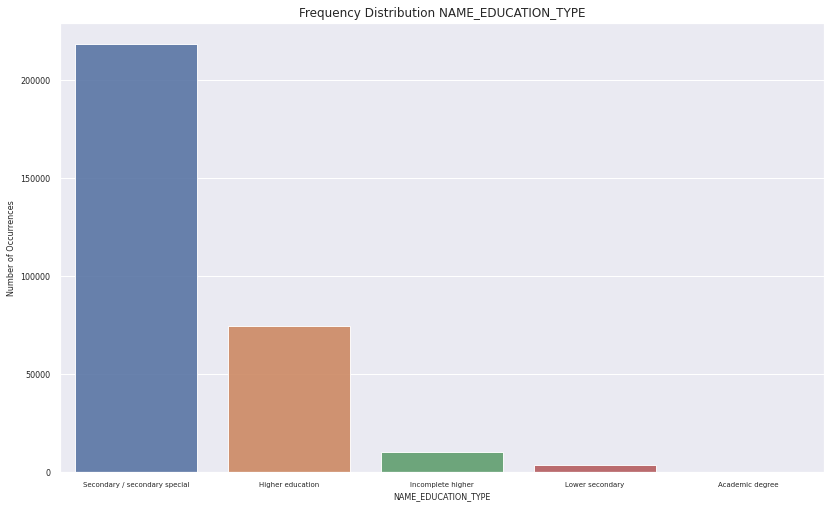

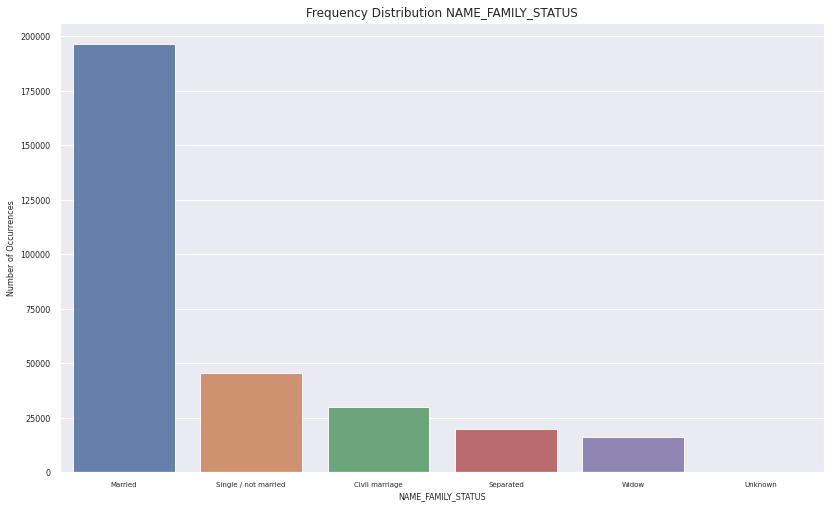

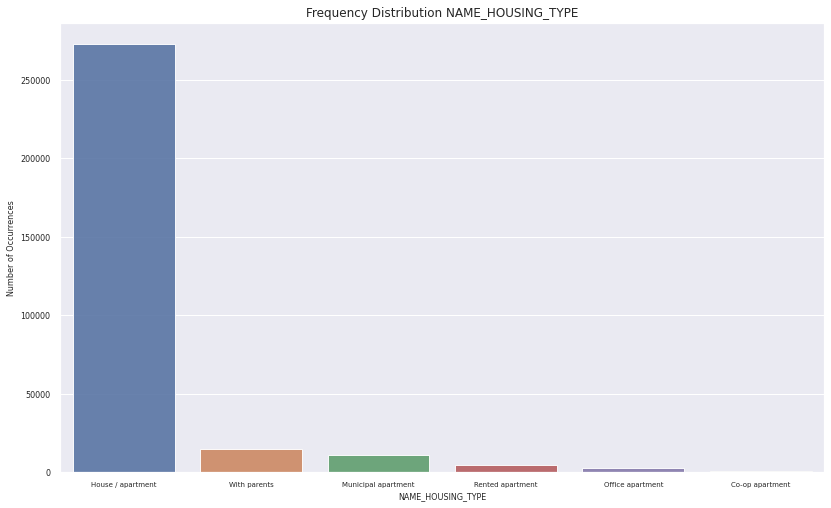

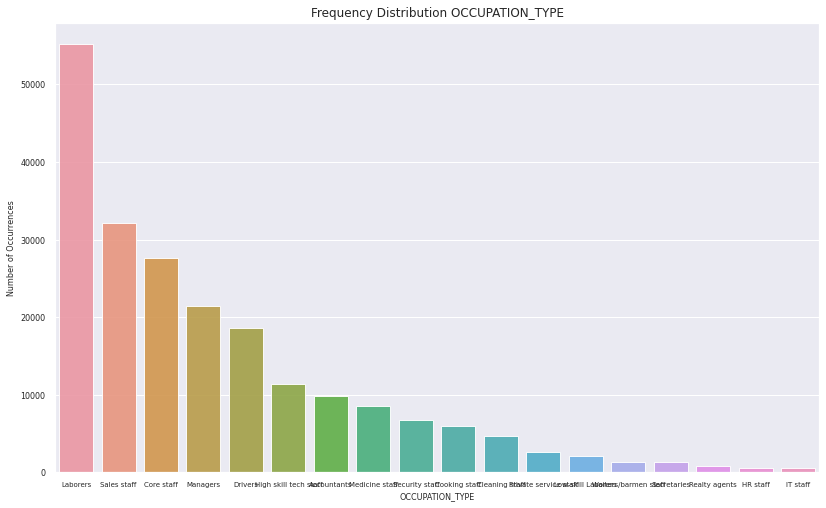

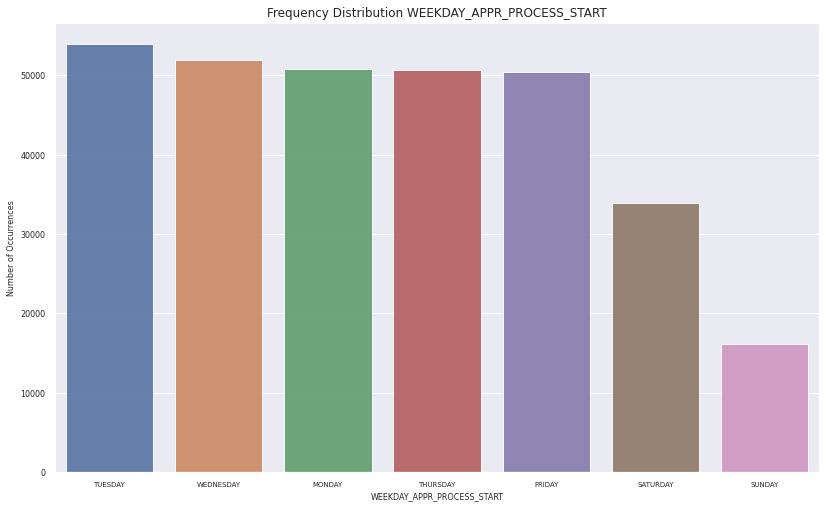

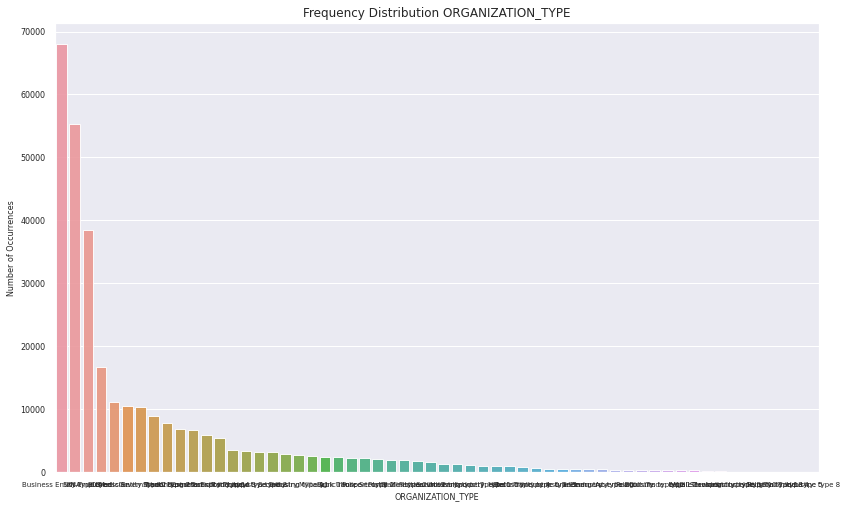

In [17]:
# Plot Distributions for all Categorical feature
%matplotlib inline
# Loop through all categorical features
for x in obj_dtypes:
  carrier_count = df_NaN[x].value_counts()
  sns.set(style="darkgrid")
  sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
  sns.set(rc={'figure.figsize':(13.7,8.27)})
  plt.title('Frequency Distribution %s' %x )
  # Adjust size of graph labesl and ticks
  plt.ylabel('Number of Occurrences', fontsize=8)
  plt.xlabel(x, fontsize=8)
  plt.xticks(size=7)
  plt.yticks(size=8)
  plt.show()

In [18]:
print(df_NaN[obj_dtypes].head(20))

   NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          Cash loans           M            N               Y   
1          Cash loans           F            N               N   
2     Revolving loans           M            Y               Y   
3          Cash loans           F            N               Y   
4          Cash loans           M            N               Y   
5          Cash loans           M            N               Y   
6          Cash loans           F            Y               Y   
7          Cash loans           M            Y               Y   
8          Cash loans           F            N               Y   
9     Revolving loans           M            N               Y   
10         Cash loans           F            N               Y   
11         Cash loans           F            N               Y   
12         Cash loans           F            N               Y   
13         Cash loans           M            Y               N   
14        

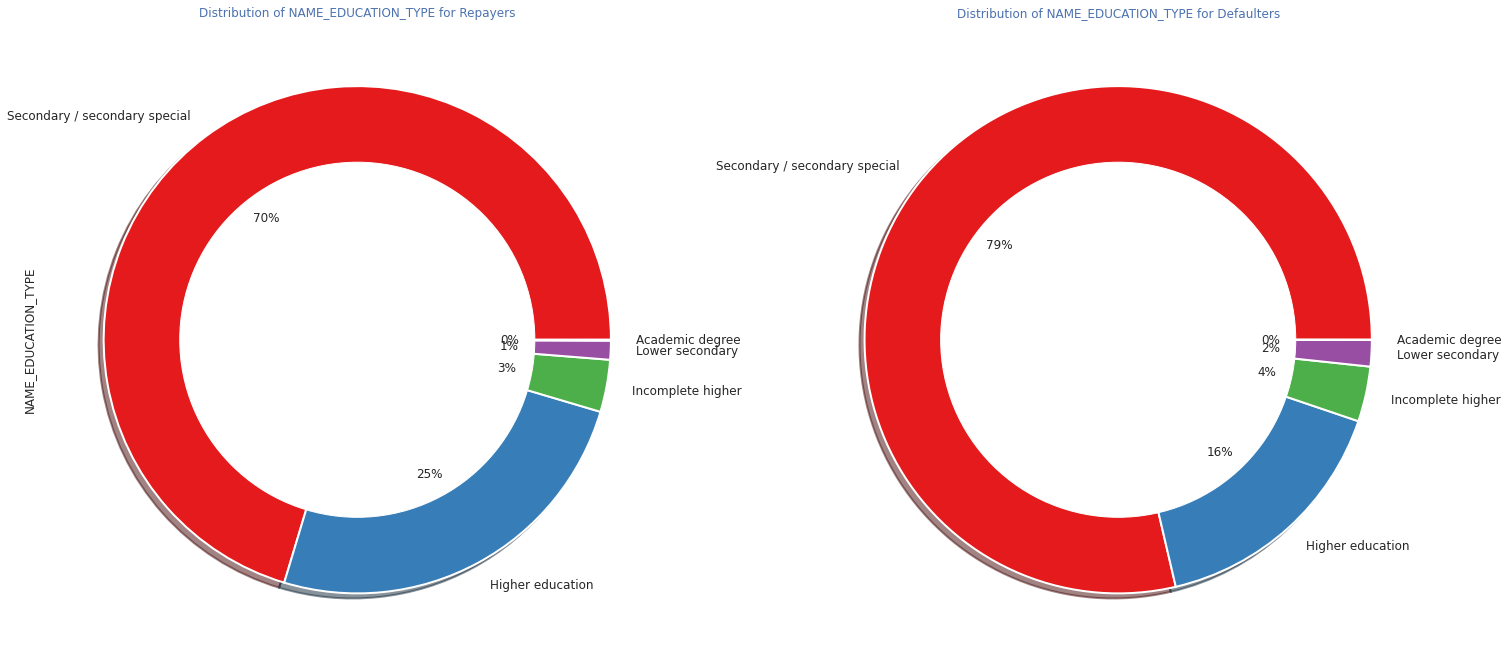

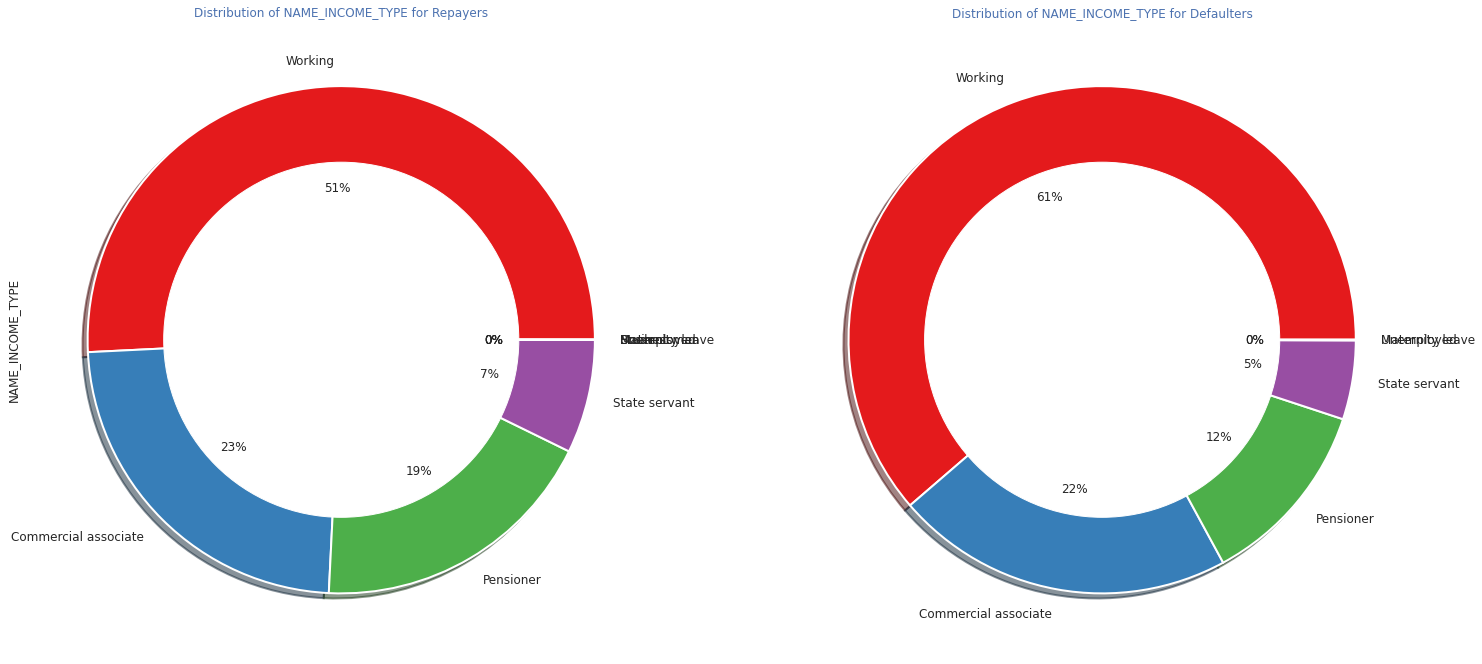

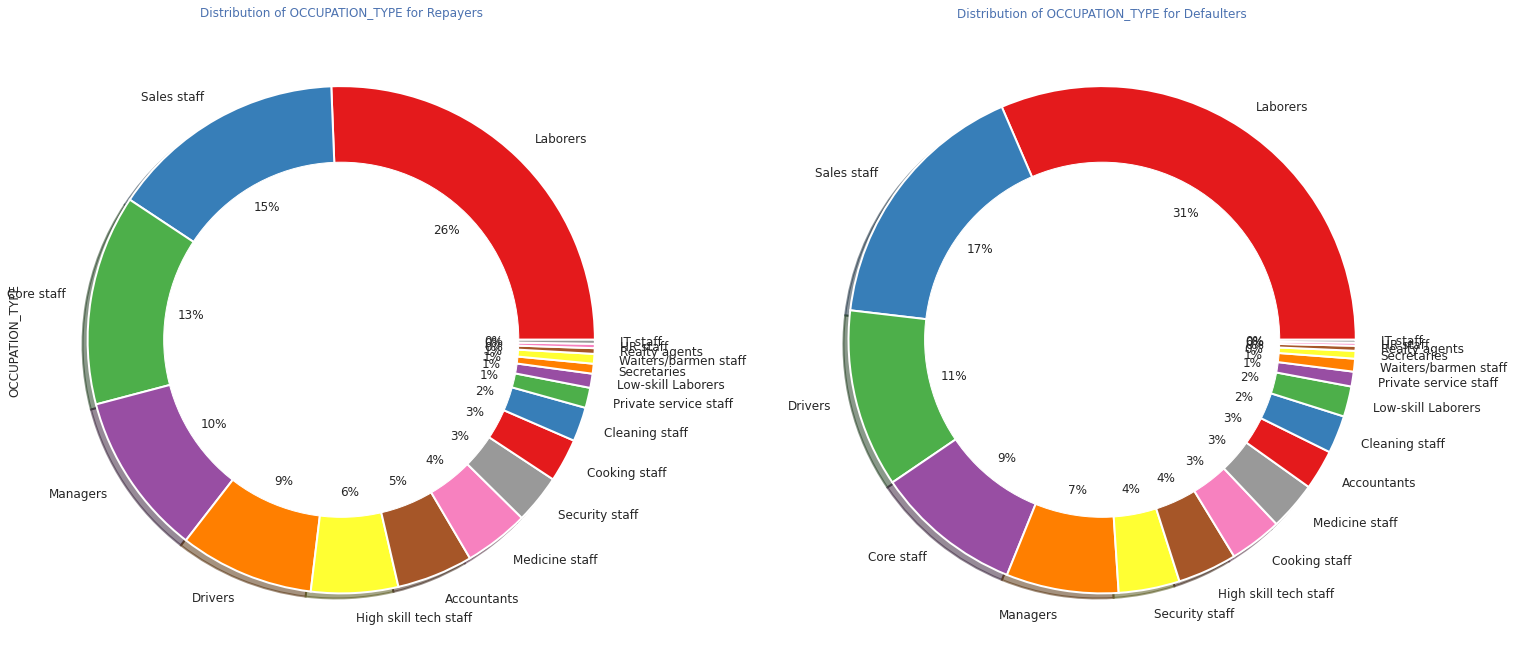

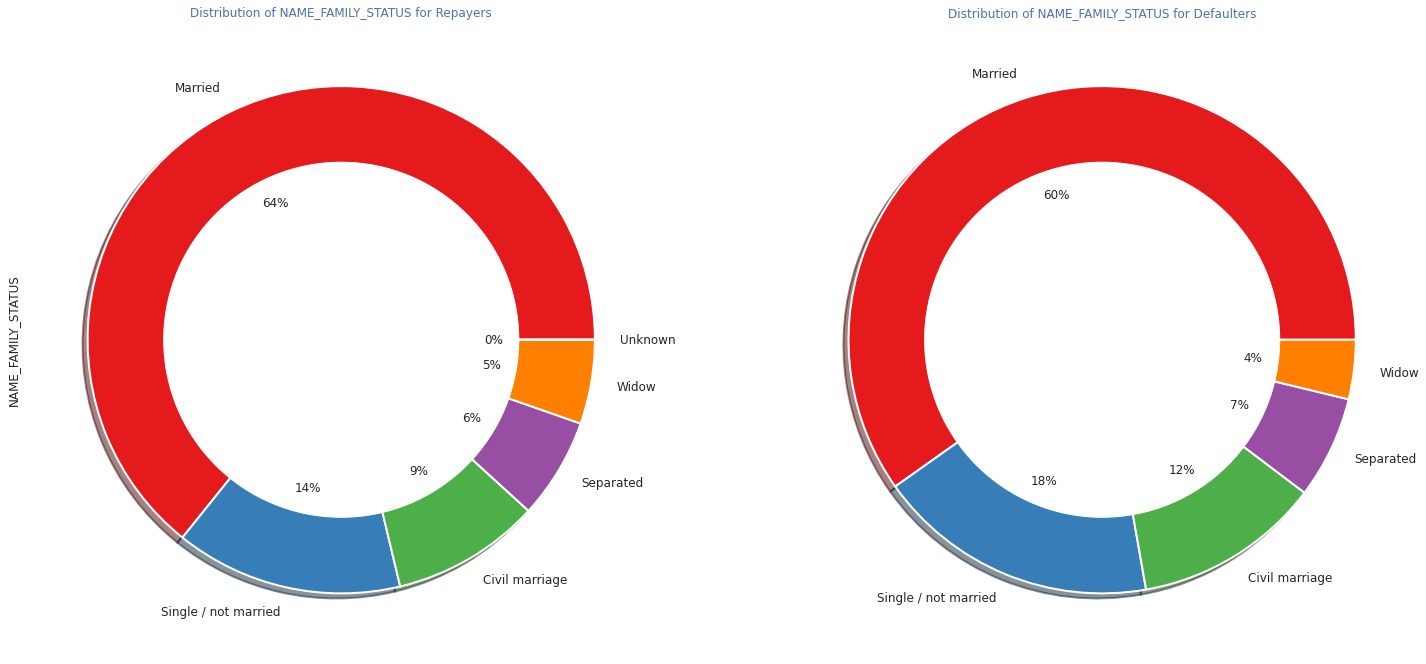

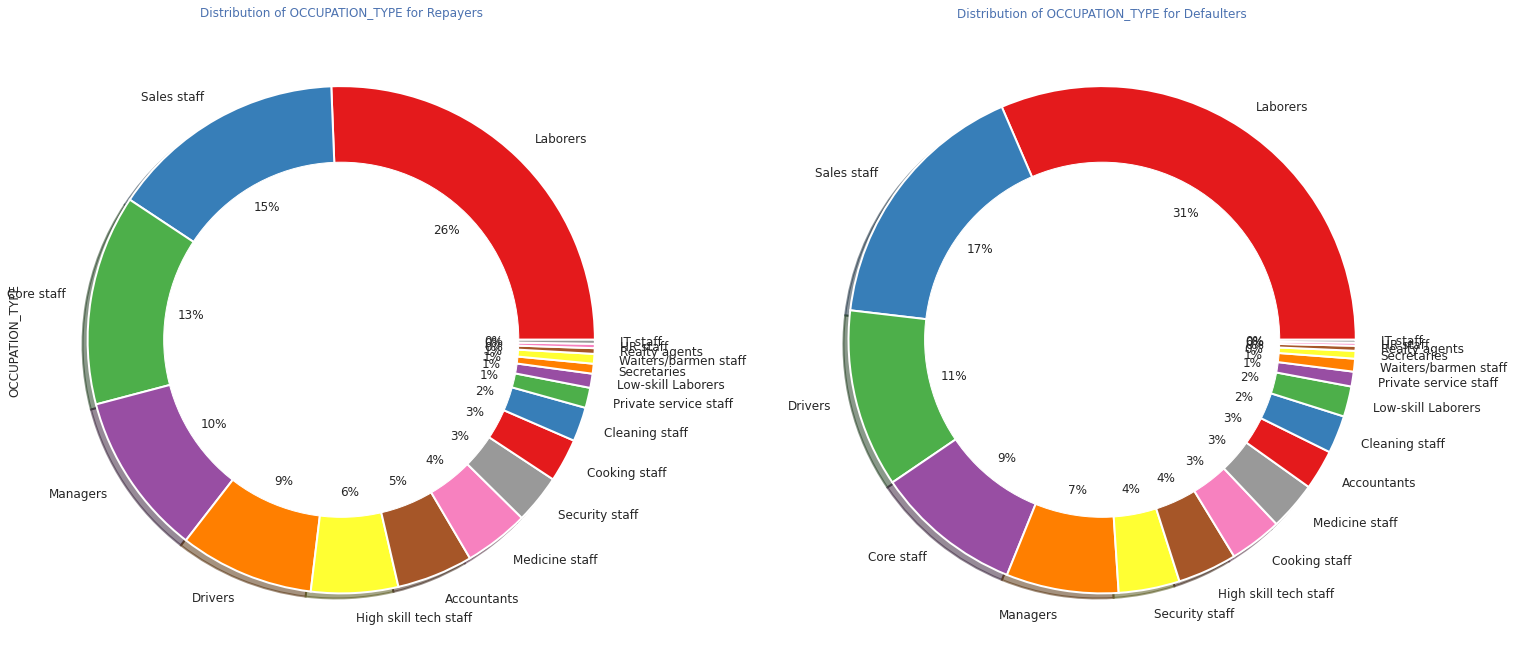

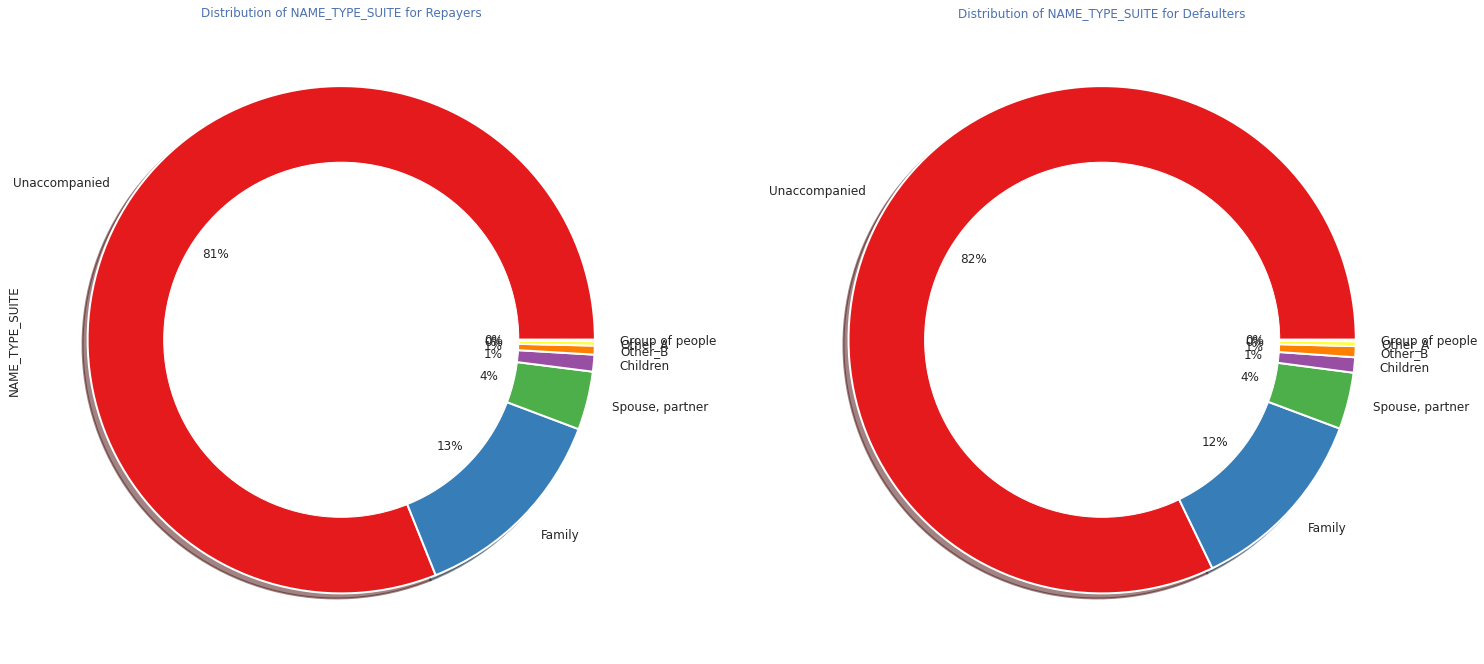

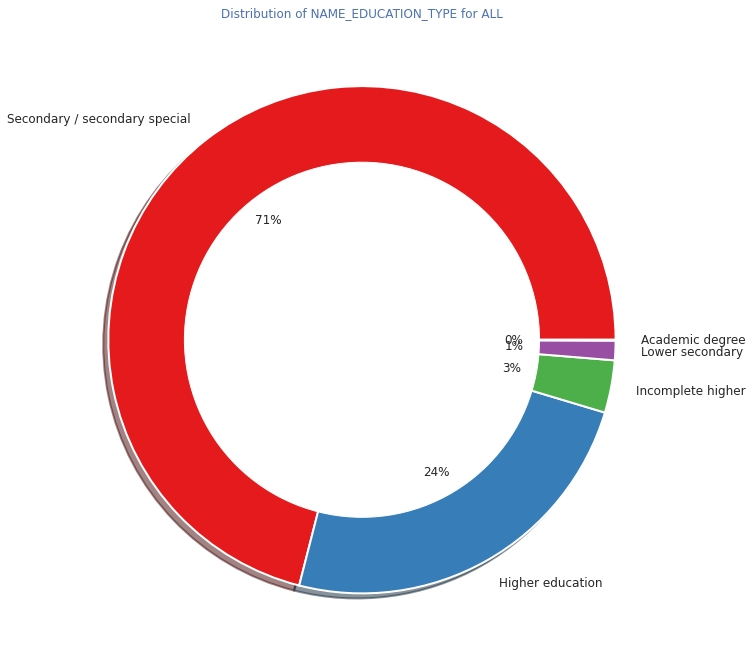

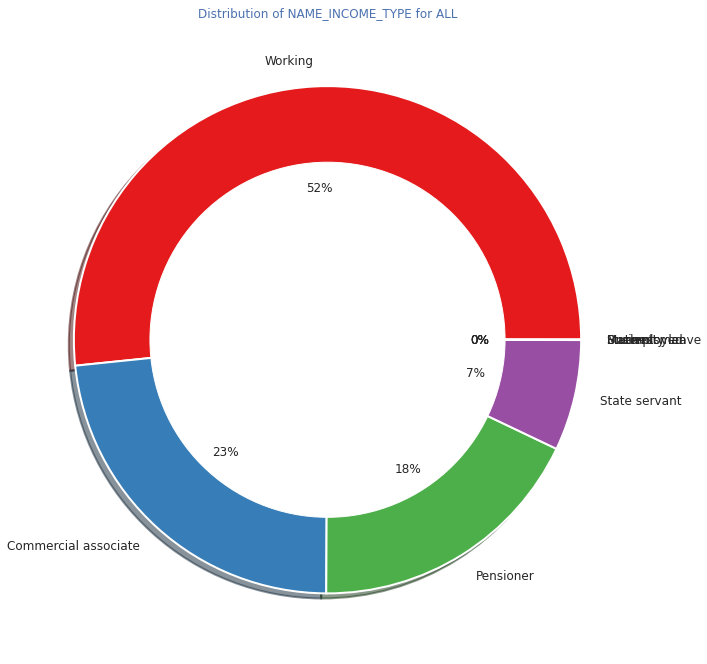

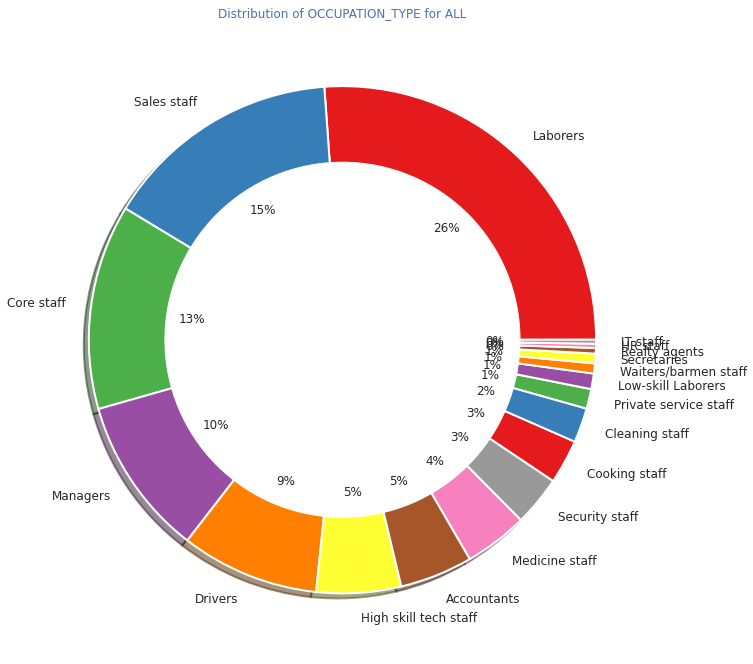

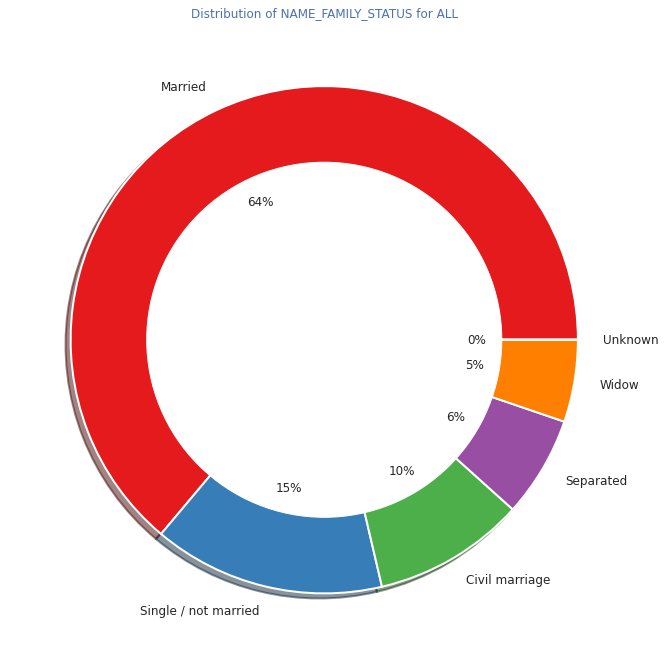

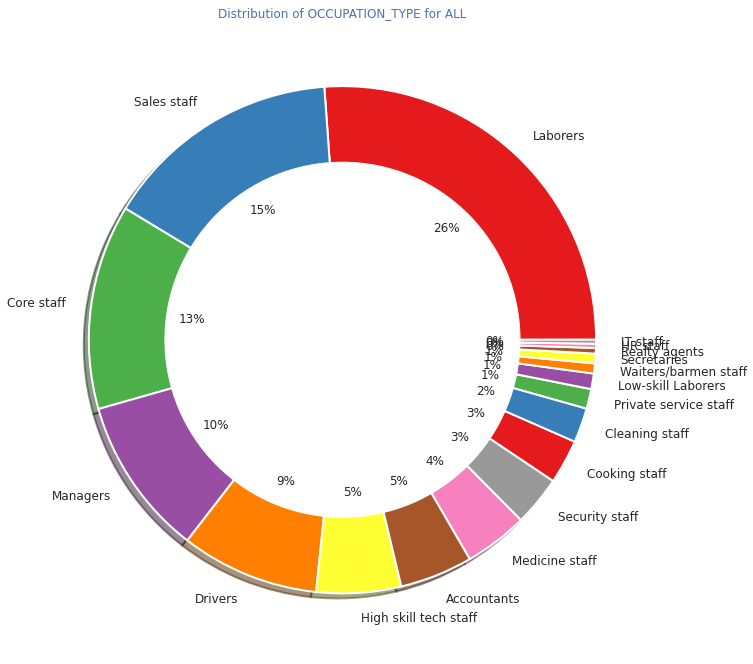

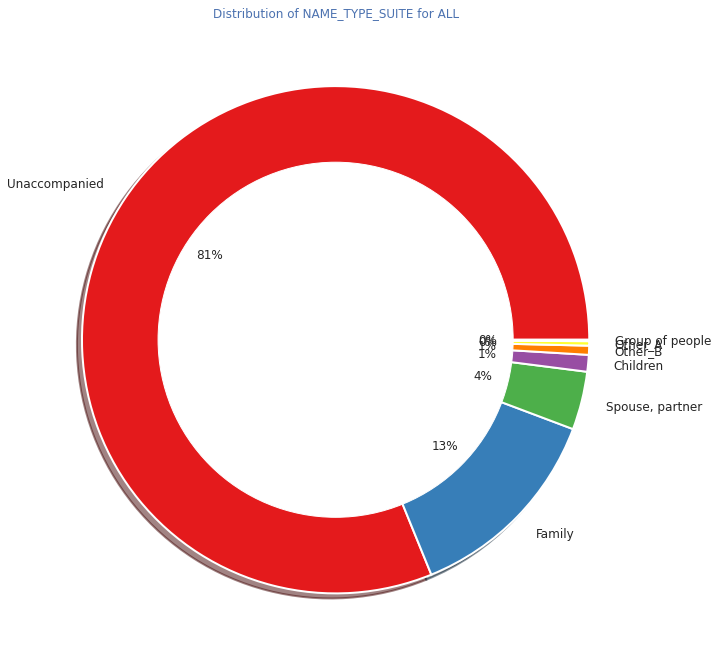

In [19]:

varlist =  ['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','NAME_TYPE_SUITE']

for x in varlist:
  plt.figure(figsize=(25,25))
  plt.subplot(121)
  df_NaN[df_NaN["TARGET"]==0][x].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
  circ = plt.Circle((0,0),.7,color="white")
  plt.gca().add_artist(circ)
  plt.title("Distribution of %s for Repayers" %x ,color="b")
  plt.subplot(122)
  df_NaN[df_NaN["TARGET"]==1][x].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
  circ = plt.Circle((0,0),.7,color="white")
  plt.gca().add_artist(circ)
  plt.title("Distribution of %s for Defaulters" %x, color="b")
  plt.ylabel("")
  plt.show()

for x in varlist:
    plt.figure(figsize=(25,25))
    plt.subplot(121)
    df_NaN[x].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)                                         
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.title("Distribution of %s for ALL" %x, color="b")
    plt.ylabel("")
    plt.show()

In [20]:
# Mean Encoding for NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS'

#meanEnc_varlist =  ['NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS']

#for x in meanEnc_varlist:
 #mean_encode= df_NaN.groupby(meanEnc_varlist)['TARGET'].mean() 
#print(mean_encode)


df_Prep = df_NaN.copy()


mean_encode= df_NaN.groupby('NAME_INCOME_TYPE')['TARGET'].mean()
print(mean_encode)

df_Prep.loc[:,'NAME_INCOME_TYPE_enc'] = df_Prep['NAME_INCOME_TYPE'].map(mean_encode)

#print(df_Prep.head(20))

mean_encode= df_NaN.groupby('OCCUPATION_TYPE')['TARGET'].mean()
print(mean_encode)

df_Prep.loc[:,'OCCUPATION_TYPE_enc'] = df_Prep['OCCUPATION_TYPE'].map(mean_encode)


##del df_Prep['NAME_FAMILY_STATUS_enc']
mean_encode= df_NaN.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()
print(mean_encode)

df_Prep.loc[:,'NAME_FAMILY_STATUS_enc'] = df_Prep['NAME_FAMILY_STATUS'].map(mean_encode)


print(df_Prep.head(100))

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64
OCCUPATION_TYPE
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105788
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067002
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64
NAME_FAMILY_STATUS
Civil marriage

In [21]:
# Mean Encoding for ORGANIZATION_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE'

mean_encode= df_Prep.groupby('ORGANIZATION_TYPE')['TARGET'].mean()
print(mean_encode)

df_Prep.loc[:,'ORGANIZATION_TYPE_enc'] = df_Prep['ORGANIZATION_TYPE'].map(mean_encode)

mean_encode= df_Prep.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()
print(mean_encode)

df_Prep.loc[:,'NAME_EDUCATION_TYPE_enc'] = df_Prep['NAME_EDUCATION_TYPE'].map(mean_encode)


mean_encode= df_Prep.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()
print(mean_encode)

#df_Prep.loc[:,'NAME_HOUSING_TYPE _enc'] = df_Prep['NAME_HOUSING_TYPE'].map(mean_encode)




ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085284
Business Entity Type 3    0.092996
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066805
Insurance                 0.056951
Ki

TARGET
0    282686
1     24825
dtype: int64


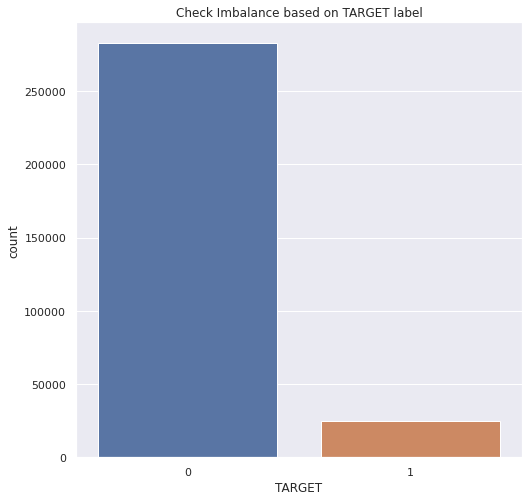

In [22]:
# Determine the distribution of target in the dataset. 0 indicates the number of people that were late on the first X installments and 1 indicates the number of people who were not late on the first X installments. 
import seaborn as sns
class_size = df_Prep.groupby('TARGET').size()
print(class_size)

#Plot the class distribution
plt.figure(figsize=(8, 8))
plt.title("Check Imbalance based on TARGET label")
sns.countplot('TARGET', data=df_Prep)

In [23]:
df_Prep.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [24]:
x= (df_Prep["AMT_ANNUITY"]).median()
print(x)

24903.0


In [25]:
#Remove Nulls Occupation Type and replace with Median
#Fill NA in OCCUPATION_TYPE_enc with Median value 
x= type(df_Prep["OCCUPATION_TYPE_enc"])
print(x)

 
#Remove Nulls AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_HOUR
# Replace with Mode

#df_Prep['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_WEEK'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_MON'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_HOUR'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_DAY'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_QRT'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_YEAR'].mode, inplace=True)
#df_Prep['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value =df_Prep['AMT_REQ_CREDIT_BUREAU_HOUR'].mode, inplace=True)

#Remove Nulls OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
#Replace with Mode

#df_Prep['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value =df_Prep['OBS_30_CNT_SOCIAL_CIRCLE'].mode, inplace=True)
#df_Prep['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value =df_Prep['DEF_30_CNT_SOCIAL_CIRCLE'].mode, inplace=True)
#df_Prep['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value =df_Prep['OBS_60_CNT_SOCIAL_CIRCLE'].mode, inplace=True)
#df_Prep['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value =df_Prep['DEF_60_CNT_SOCIAL_CIRCLE'].mode, inplace=True)


#Remove Nulls AMT_GOODS_PRICE, AMT_ANNUITY
#Replace with Median

median_OCCUPATION_TYPE_enc= (df_Prep["OCCUPATION_TYPE_enc"]).median()
median_AMT_GOODS_PRICE= (df_Prep["AMT_GOODS_PRICE"]).median()
median_AMT_ANNUITY= (df_Prep["AMT_ANNUITY"]).median()
median_CNT_FAM_MEMBERS= (df_Prep["CNT_FAM_MEMBERS"]).median()
median_DAYS_LAST_PHONE_CHANGE= (df_Prep["DAYS_LAST_PHONE_CHANGE"]).median()


print(median_OCCUPATION_TYPE_enc)

df_Prep['OCCUPATION_TYPE_enc'].fillna(value = median_OCCUPATION_TYPE_enc, inplace=True)
df_Prep['AMT_GOODS_PRICE'].fillna(value = median_AMT_GOODS_PRICE, inplace=True)
df_Prep['AMT_ANNUITY'].fillna(value =median_AMT_ANNUITY, inplace=True)
df_Prep['CNT_FAM_MEMBERS'].fillna(value =median_CNT_FAM_MEMBERS, inplace=True)
df_Prep['DAYS_LAST_PHONE_CHANGE'].fillna(value =median_DAYS_LAST_PHONE_CHANGE, inplace=True)


#df_Prep['OCCUPATION_TYPE_enc'].fillna(value = 0.0963179864182917, inplace=True)
#df_Prep['AMT_GOODS_PRICE'].fillna(value =450000.0, inplace=True)
#df_Prep['AMT_ANNUITY'].fillna(value =24903.0, inplace=True)




<class 'pandas.core.series.Series'>
0.0963179864182917


In [26]:
# Remove all XNA values for the following features
#df_Prep= df_Prep[df_Prep.CODE_GENDER != 'XNA']

In [27]:


#df_Prep= df_Prep[df_Prep.OBS_30_CNT_SOCIAL_CIRCLE != 'XNA']
#df_Prep= df_Prep[df_Prep.OBS_60_CNT_SOCIAL_CIRCLE != 'XNA']
#df_Prep= df_Prep[df_Prep.DEF_30_CNT_SOCIAL_CIRCLE != 'XNA']
#df_Prep= df_Prep[df_Prep.DEF_60_CNT_SOCIAL_CIRCLE != 'XNA']


# For feature CODE_GENDER perform "Binning". Split the feature into 2 columns with binary values indicating the Gender M or F

#import category_encoders as ce
# Encode the genders in two seperate columns for Male and Female
#encoder = ce.BinaryEncoder(cols= ['CODE_GENDER'])
#df_Genderbin = encoder.fit_transform(df_Prep['CODE_GENDER'])
#print(df_Genderbin)

# Concatenate the new transformed gender columns to the dataset.
#df_Prep = pd.concat([df_Genderbin,df_Prep], axis= 1)

# For feature NAME_CONTRACT_TYPE perform "Binning". Split the feature into 2 columns with binary values indicating the Cash Loans and Revolving Loans

import category_encoders as ce
# Encode the NAME_CONTRACT_TYPE in two seperate columns for Cash Loans and Revolving Loans
encoder = ce.BinaryEncoder(cols= ['NAME_CONTRACT_TYPE'])
df_ConTypebin = encoder.fit_transform(df_Prep['NAME_CONTRACT_TYPE'])
#print(df_ConTypebin)

# Concatenate the new transformed  NAME_CONTRACT_TYPE columns to the dataset.
df_Prep = pd.concat([df_ConTypebin,df_Prep], axis= 1)



In [28]:
#Replace with Mode 

cat_features_median = ['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']

#mode_cat_feature= (df_Prep[cat_feature]).mode()

for cat_feature in cat_features_median:
  median_cat_feature= (df_Prep[cat_feature]).median()
  df_Prep[cat_feature].fillna(value = median_cat_feature, inplace=True)
  print(median_cat_feature)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


In [29]:
x= (df_Prep['AMT_REQ_CREDIT_BUREAU_YEAR']).mode()
print(x)

0    1.0
dtype: float64


In [30]:
#Converting negative values to positive
df_Prep['DAYS_BIRTH'] = abs(df_Prep['DAYS_BIRTH'])
df_Prep['DAYS_ID_PUBLISH'] = abs(df_Prep['DAYS_ID_PUBLISH'])
df_Prep['DAYS_REGISTRATION'] = abs(df_Prep['DAYS_REGISTRATION'])
df_Prep['DAYS_EMPLOYED'] = abs(df_Prep['DAYS_EMPLOYED'])
df_Prep['DAYS_LAST_PHONE_CHANGE'] = abs(df_Prep['DAYS_LAST_PHONE_CHANGE'])

In [31]:
df_Prep.head(10)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                     0                     1      100002       1   
1                     0                     1      100003       0   
2                     1                     0      100004       0   
3                     0                     1      100006       0   
4                     0                     1      100007       0   
5                     0                     1      100008       0   
6                     0                     1      100009       0   
7                     0                     1      100010       0   
8                     0                     1      100011       0   
9                     1                     0      100012       0   

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            N               Y             0   
1         Cash loans           F            N               N             0   
2    Revolving loans           M            Y               Y             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           M            N               Y             0   
5         Cash loans           M            N               Y             0   
6         Cash loans           F            Y               Y             1   
7         Cash loans           M            Y               Y             0   
8         Cash loans           F            N               Y             0   
9    Revolving loans           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   
6          171000.0   1560726.0      41301.0        1395000.0   
7          360000.0   1530000.0      42075.0        1530000.0   
8          112500.0   1019610.0      33826.5         913500.0   
9          135000.0    405000.0      20250.0         405000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secondary special   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working  Secondary / secondary special   
5  Spouse, partner         State servant  Secondary / secondary special   
6    Unaccompanied  Commercial associate               Higher education   
7    Unaccompanied         State servant               Higher education   
8         Children             Pensioner  Secondary / secondary special   
9    Unaccompanied               Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
6               Married  House / apartment                    0.035792   
7               Married  House / apartment                    0.003122   
8               Married  House / apartment                    0.018634   
9  Single / not married  House / apartment                    0.019689   

   DAYS_BIRTH  D

In [32]:
df_Prep= df_Prep[df_Prep.CODE_GENDER != 'XNA']

Make Flag binary

In [33]:
# Convert the 'FLAG_OWN_CAR','FLAG_OWN_REALTY' to binary values based on the Y or N flag. Important: We are not Binning or splitting into 2 columns.
#df_Prep = df_Prep1.copy()
list_Flag =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY']

# Function to convert flags to binary values
def make_binary(df):
    return df.map({'Y': 1, "N": 0})

df_Prep[list_Flag] = df_Prep[list_Flag].apply(make_binary)
#df_Prep.head(1)



Make gender binary

In [34]:
list_feat =  ['CODE_GENDER']
def make_binary_gender(df):
    return df.map({'M': 1, "F": 0})

df_Prep[list_feat] = df_Prep[list_feat].apply(make_binary_gender)
df_Prep.head(1)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                     0                     1      100002       1   

  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0         Cash loans            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   

   NAME_INCOME_TYPE_enc  OCCUPATION_TYPE_enc  NAME_FAMILY_STATUS_enc  \
0              0.095885             0.105788                0.098077   

   ORGANIZATION_TYPE_enc  NAME_EDUCATION_TYPE_enc  
0               0.092996                 0.089399

In [35]:
df_Prep.head(10)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                     0                     1      100002       1   
1                     0                     1      100003       0   
2                     1                     0      100004       0   
3                     0                     1      100006       0   
4                     0                     1      100007       0   
5                     0                     1      100008       0   
6                     0                     1      100009       0   
7                     0                     1      100010       0   
8                     0                     1      100011       0   
9                     1                     0      100012       0   

  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0         Cash loans            1             0                1   
1         Cash loans            0             0                0   
2    Revolving loans            1             1                1   
3         Cash loans            0             0                1   
4         Cash loans            1             0                1   
5         Cash loans            1             0                1   
6         Cash loans            0             1                1   
7         Cash loans            1             1                1   
8         Cash loans            0             0                1   
9    Revolving loans            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   
8             0          112500.0   1019610.0      33826.5         913500.0   
9             0          135000.0    405000.0      20250.0         405000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secondary special   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working  Secondary / secondary special   
5  Spouse, partner         State servant  Secondary / secondary special   
6    Unaccompanied  Commercial associate               Higher education   
7    Unaccompanied         State servant               Higher education   
8         Children             Pensioner  Secondary / secondary special   
9    Unaccompanied               Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
6               Married  House / apartment                    0.035792   
7               Married  House / apartment                    0.003122   
8               Married  House / apartment                    0.018634   
9  Single / not married  House / apartment                

In [36]:
# Remove the categorical columns that now have new encoded columns added to the data set
df_Prep.drop([
'OCCUPATION_TYPE',
'WEEKDAY_APPR_PROCESS_START',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'ORGANIZATION_TYPE',
'NAME_CONTRACT_TYPE']#,
#'AMT_REQ_CREDIT_BUREAU_DAY',       
#'AMT_REQ_CREDIT_BUREAU_WEEK',      
#'AMT_REQ_CREDIT_BUREAU_MON' ,      
#'AMT_REQ_CREDIT_BUREAU_QRT',       
#'AMT_REQ_CREDIT_BUREAU_YEAR',
#'OBS_30_CNT_SOCIAL_CIRCLE',    
#'DEF_30_CNT_SOCIAL_CIRCLE',       
#'OBS_60_CNT_SOCIAL_CIRCLE',      
#'DEF_60_CNT_SOCIAL_CIRCLE' 
 ,axis = 1,
inplace=True)

#df_Prep.drop(['OCCUPATION_TYPE' ], axis = 1,inplace=True)

In [37]:
df_Prep.head(1)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                     0                     1      100002       1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             0                1             0          202500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    406597.5      24700.5         351000.0                    0.018801   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   

   NAME_INCOME_TYPE_enc  OCCUPATION_TYPE_enc  NAME_FAMILY_STATUS_enc  \
0              0.095885             0.105788                0.098077   

   ORGANIZATION_TYPE_enc  NAME_EDUCATION_TYPE_enc  
0               0.092996                 0.089399

In [38]:
print(df_Prep.dtypes)
df_Prep.isnull().sum()
#df_Prep['AMT_CREDIT']=pd.to_numeric(df_Prep['AMT_CREDIT'], errors='coerce').fillna(0)#df_Prep['AMT_CREDIT'].convert_objects(convert_numeric=True)
#df_Prep['AMT_ANNUITY']=pd.to_numeric(df_Prep['AMT_ANNUITY'], errors='coerce').fillna(0)
#pd.to_numeric(df_Prep['AMT_CREDIT'], errors='coerce')

#df_Prep['AMT_CREDIT'] = np.where(df_Prep['AMT_CREDIT'].isinstance(x, float), ,"Remove" )

NAME_CONTRACT_TYPE_0             int64
NAME_CONTRACT_TYPE_1             int64
SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                      int64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CI

NAME_CONTRACT_TYPE_0           0
NAME_CONTRACT_TYPE_1           0
SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

In [39]:
df_Prep.describe()

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1     SK_ID_CURR  \
count         307507.000000         307507.000000  307507.000000   
mean               0.095201              0.904799  278181.527256   
std                0.293493              0.293493  102790.132982   
min                0.000000              0.000000  100002.000000   
25%                0.000000              1.000000  189146.500000   
50%                0.000000              1.000000  278203.000000   
75%                0.000000              1.000000  367143.500000   
max                1.000000              1.000000  456255.000000   

             TARGET    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307507.00000  307507.000000  307507.000000    307507.000000   
mean        0.08073       0.341648       0.340106         0.693669   
std         0.27242       0.474263       0.473745         0.460970   
min         0.00000       0.000000       0.000000         0.000000   
25%         0.00000       0.000000       0.000000         0.000000   
50%         0.00000       0.000000       0.000000         1.000000   
75%         0.00000       1.000000       1.000000         1.000000   
max         1.00000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307507.000000      3.075070e+05  3.075070e+05  307507.000000   
mean        0.417047      1.687977e+05  5.990286e+05   27108.580714   
std         0.722119      2.371246e+05  4.024926e+05   14493.522125   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075070e+05               307507.000000  307507.000000   
mean      5.383178e+05                    0.020868   16037.027271   
std       3.692898e+05                    0.013831    4363.982424   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12413.000000   
50%       4.500000e+05                    0.018850   15750.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307507.000000      307507.000000    307507.000000  307507.000000   
mean    67725.569893        4986.131376      2994.201670       0.999997   
std    139444.469301        3522.883030      1509.454566       0.001803   
min         0.000000           0.000000         0.000000       0.000000   
25%       933.000000        2010.000000      1720.000000       1.000000   
50%      2219.000000        4504.000000      3254.000000       1.000000   
75%      5707.000000        7479.500000      4299.000000       1.000000   
max    365243.000000       24672.000000      7197.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307507.000000    307507.000000     307507.000000  307507.000000   
mean         0.819887         0.199358          0.998133       0.281057   
std          0.384282         0.399518          0.043164       0.449516   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307507.000000    307507.000000         307507.000000   
mean        0.056721   

# Skew Removal

In [40]:
# Determine skew for numeric features and sort descending
numeric_fields_skew = df_Prep.skew(axis=None, skipna=True, level=None, numeric_only=True).sort_values(ascending= False)
print(numeric_fields_skew)


FLAG_DOCUMENT_12               392.112229
AMT_INCOME_TOTAL               391.557413
FLAG_DOCUMENT_10               209.587690
FLAG_DOCUMENT_2                153.790817
AMT_REQ_CREDIT_BUREAU_QRT      141.400929
FLAG_DOCUMENT_4                110.893643
FLAG_DOCUMENT_7                 72.173638
FLAG_DOCUMENT_17                61.213742
FLAG_DOCUMENT_21                54.612584
FLAG_DOCUMENT_20                44.364608
FLAG_DOCUMENT_19                40.955867
AMT_REQ_CREDIT_BUREAU_DAY       29.081388
FLAG_DOCUMENT_15                28.699146
FLAG_DOCUMENT_14                18.372413
FLAG_DOCUMENT_13                16.753636
FLAG_DOCUMENT_9                 15.927650
FLAG_DOCUMENT_11                15.894124
AMT_REQ_CREDIT_BUREAU_HOUR      15.641887
OBS_30_CNT_SOCIAL_CIRCLE        12.144696
OBS_60_CNT_SOCIAL_CIRCLE        12.076064
FLAG_DOCUMENT_18                10.955006
AMT_REQ_CREDIT_BUREAU_WEEK      10.007966
FLAG_DOCUMENT_16                 9.886045
AMT_REQ_CREDIT_BUREAU_MON        8

In [41]:
# Features whose skew is greater that 0.75 and do not start with FLAG (Multiple FLAG_DOCUMENT needs to be dropped)
m = 0
skew_features = []
#for line in (line for line in x if not line.startswith('?')):

for x in numeric_fields_skew:
  #for i in numeric_fields_skew.index:
  if ((x > 0.75) and ((numeric_fields_skew.index[m].startswith('FLAG')) == False) ):
    print(numeric_fields_skew.index[m])
    skew_features.append(numeric_fields_skew.index[m])
  m= m+1 
skew_features.remove('TARGET')
# Features that have skew greater than 0/75
print("\n Features that have skew > 0.75:  \n \n %s" %skew_features)

AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
REG_REGION_NOT_LIVE_REGION
DEF_60_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
LIVE_REGION_NOT_WORK_REGION
REG_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
TARGET
NAME_CONTRACT_TYPE_0
CNT_CHILDREN
LIVE_CITY_NOT_WORK_CITY
DAYS_EMPLOYED
AMT_ANNUITY
REGION_POPULATION_RELATIVE
AMT_REQ_CREDIT_BUREAU_YEAR
AMT_GOODS_PRICE
REG_CITY_NOT_WORK_CITY
AMT_CREDIT
CNT_FAM_MEMBERS

 Features that have skew > 0.75:  
 
 ['AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'REG_REGION_NOT_LIVE_REGION', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',

In [42]:
df_Prep.describe()

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1     SK_ID_CURR  \
count         307507.000000         307507.000000  307507.000000   
mean               0.095201              0.904799  278181.527256   
std                0.293493              0.293493  102790.132982   
min                0.000000              0.000000  100002.000000   
25%                0.000000              1.000000  189146.500000   
50%                0.000000              1.000000  278203.000000   
75%                0.000000              1.000000  367143.500000   
max                1.000000              1.000000  456255.000000   

             TARGET    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307507.00000  307507.000000  307507.000000    307507.000000   
mean        0.08073       0.341648       0.340106         0.693669   
std         0.27242       0.474263       0.473745         0.460970   
min         0.00000       0.000000       0.000000         0.000000   
25%         0.00000       0.000000       0.000000         0.000000   
50%         0.00000       0.000000       0.000000         1.000000   
75%         0.00000       1.000000       1.000000         1.000000   
max         1.00000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307507.000000      3.075070e+05  3.075070e+05  307507.000000   
mean        0.417047      1.687977e+05  5.990286e+05   27108.580714   
std         0.722119      2.371246e+05  4.024926e+05   14493.522125   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075070e+05               307507.000000  307507.000000   
mean      5.383178e+05                    0.020868   16037.027271   
std       3.692898e+05                    0.013831    4363.982424   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12413.000000   
50%       4.500000e+05                    0.018850   15750.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307507.000000      307507.000000    307507.000000  307507.000000   
mean    67725.569893        4986.131376      2994.201670       0.999997   
std    139444.469301        3522.883030      1509.454566       0.001803   
min         0.000000           0.000000         0.000000       0.000000   
25%       933.000000        2010.000000      1720.000000       1.000000   
50%      2219.000000        4504.000000      3254.000000       1.000000   
75%      5707.000000        7479.500000      4299.000000       1.000000   
max    365243.000000       24672.000000      7197.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307507.000000    307507.000000     307507.000000  307507.000000   
mean         0.819887         0.199358          0.998133       0.281057   
std          0.384282         0.399518          0.043164       0.449516   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307507.000000    307507.000000         307507.000000   
mean        0.056721   

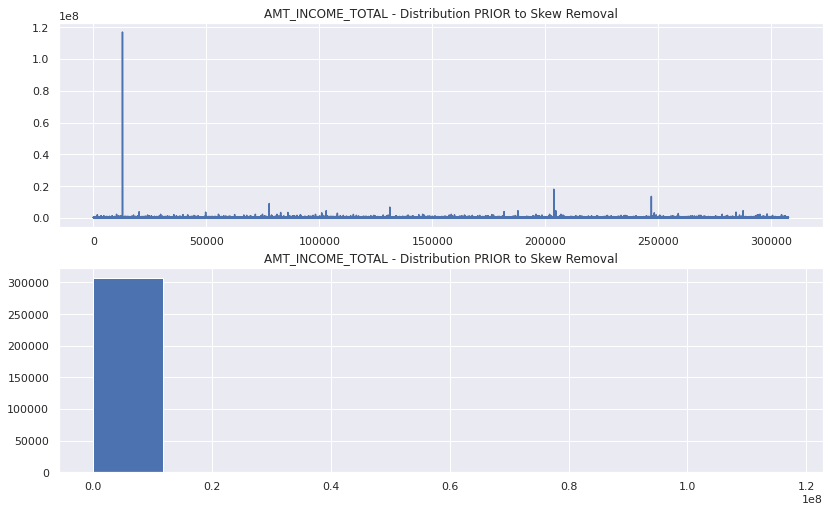

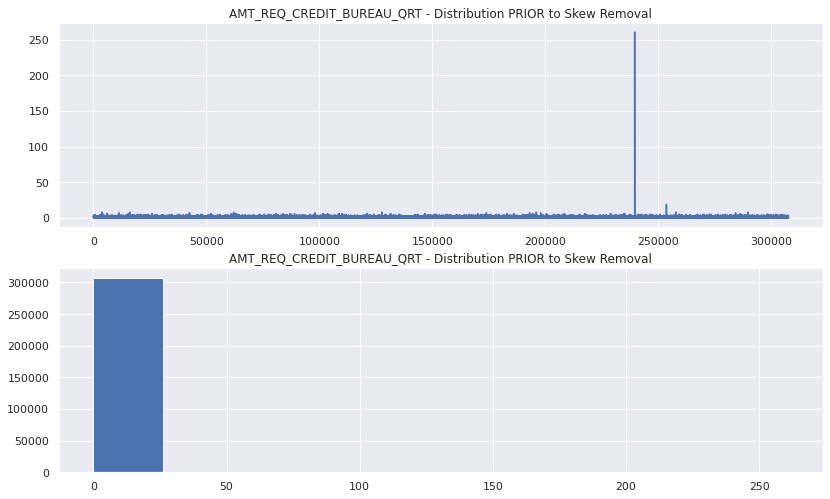

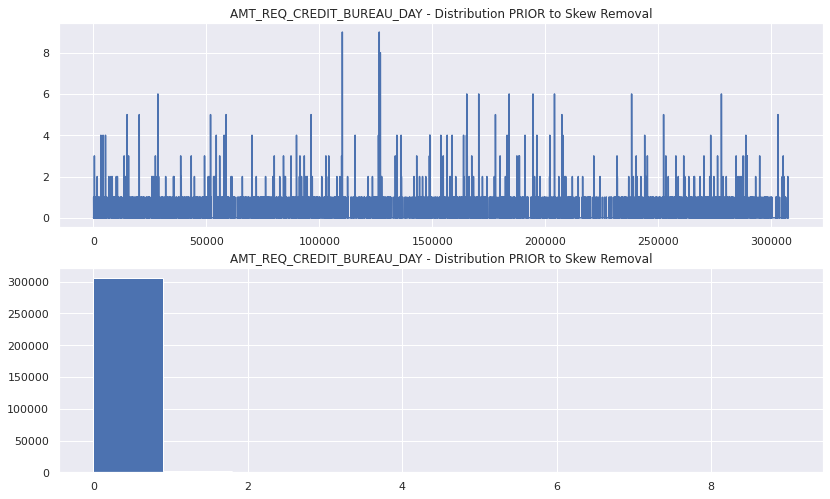

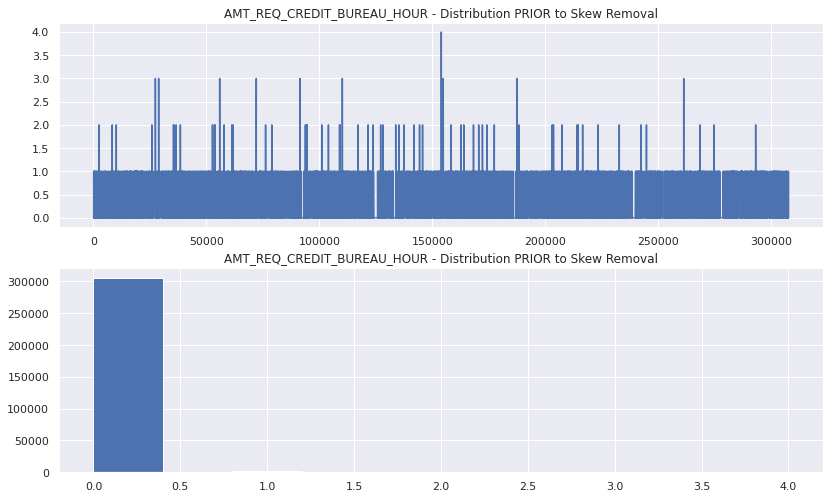

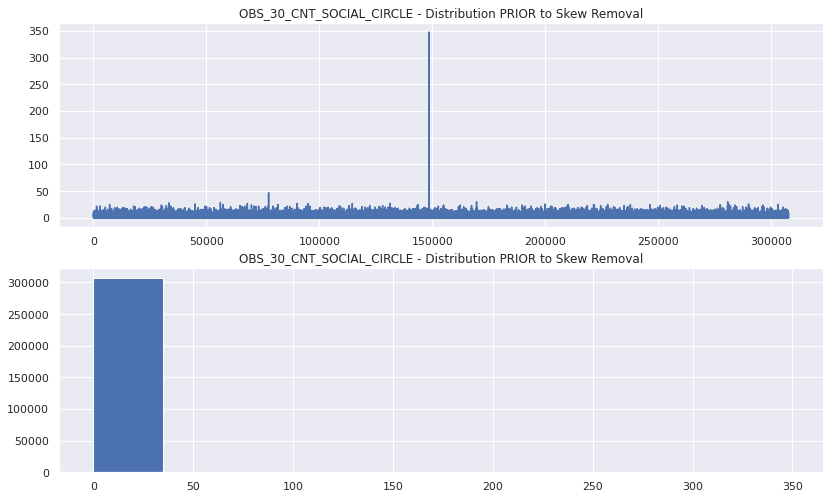

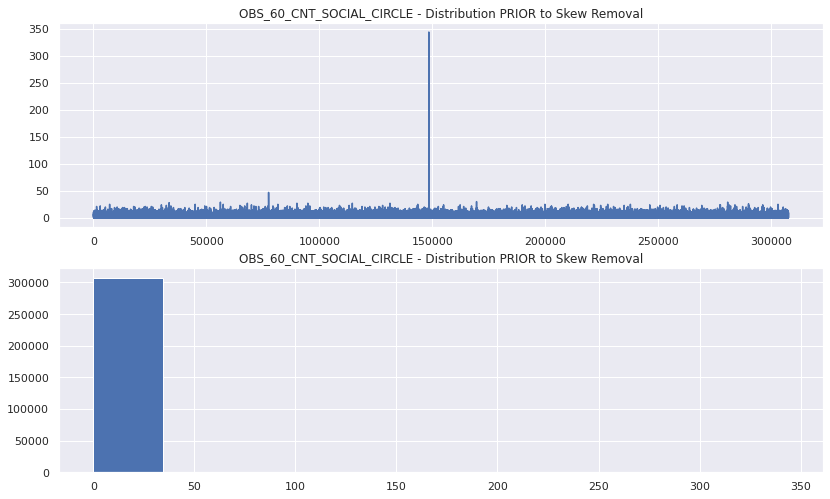

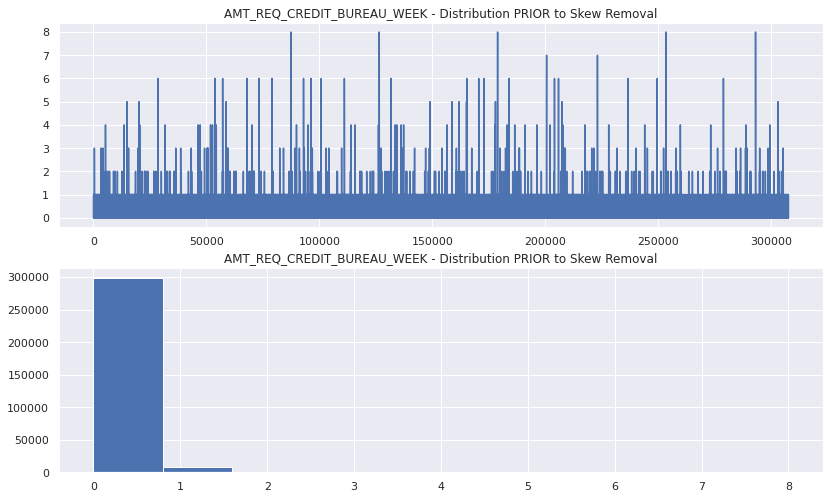

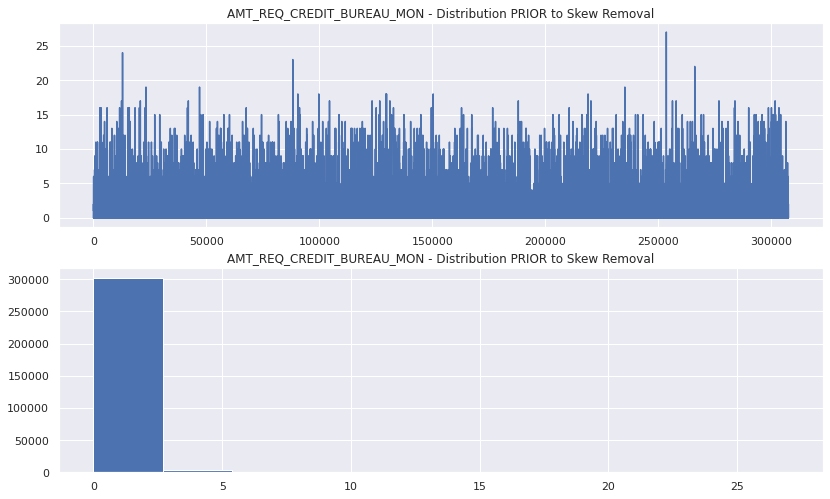

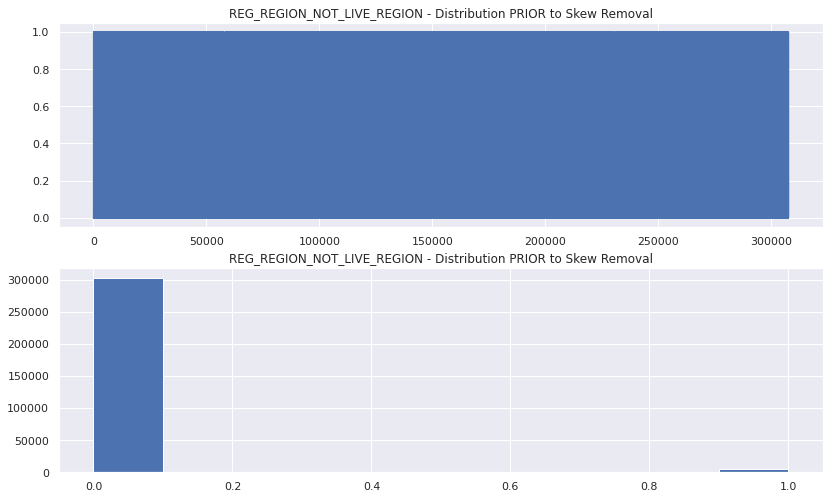

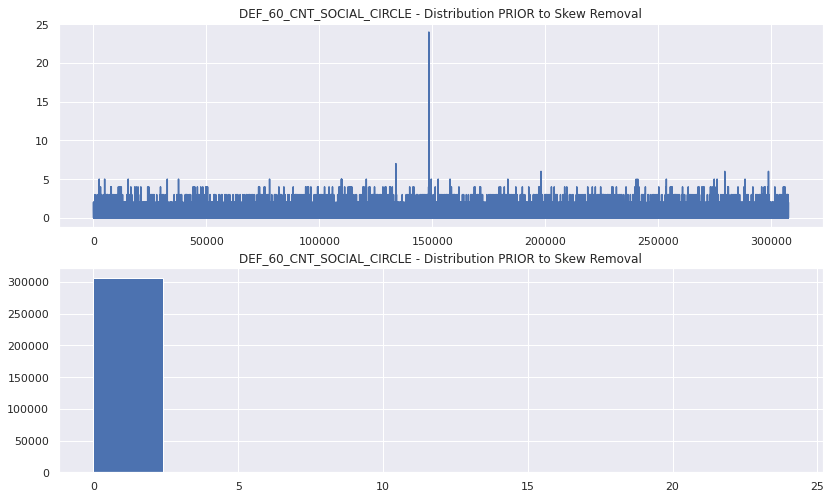

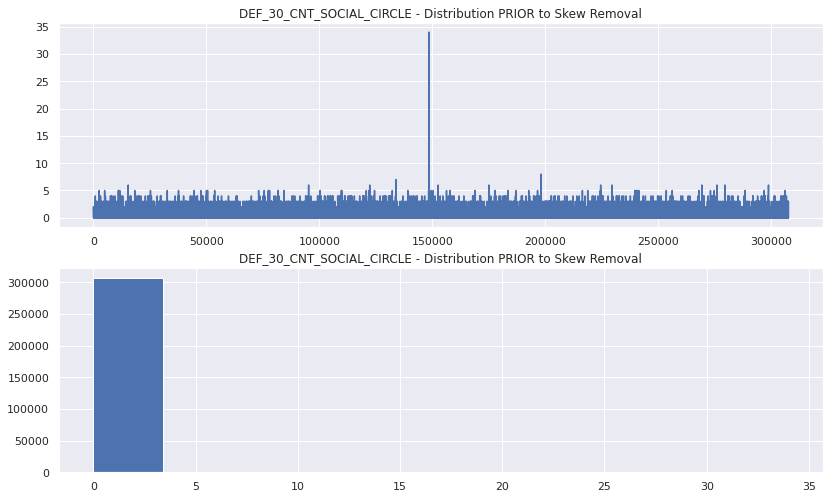

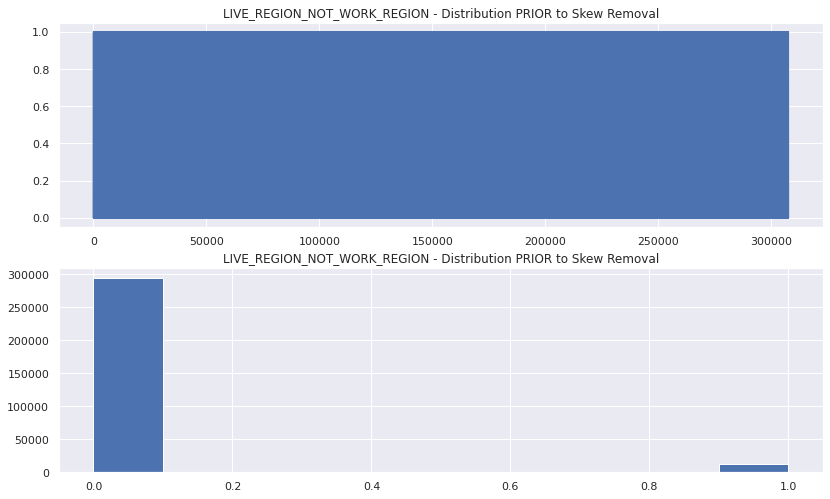

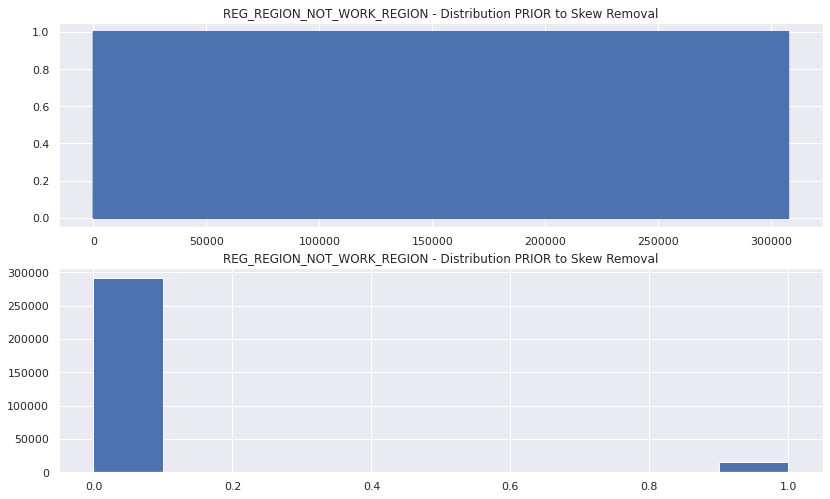

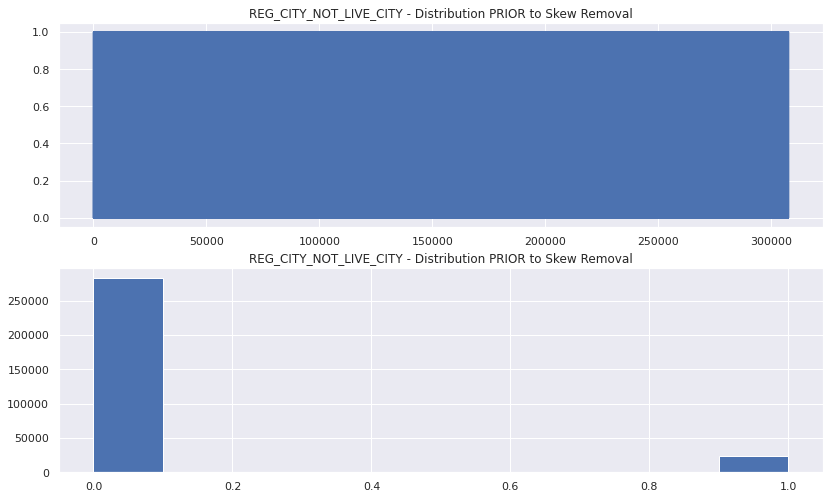

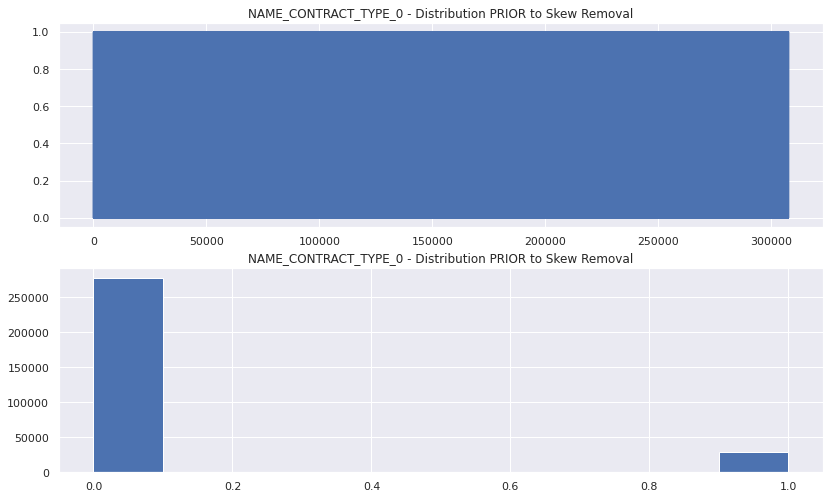

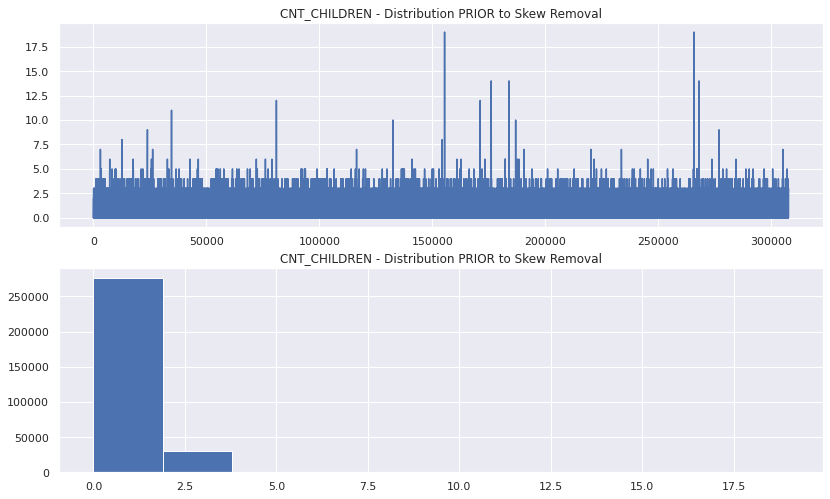

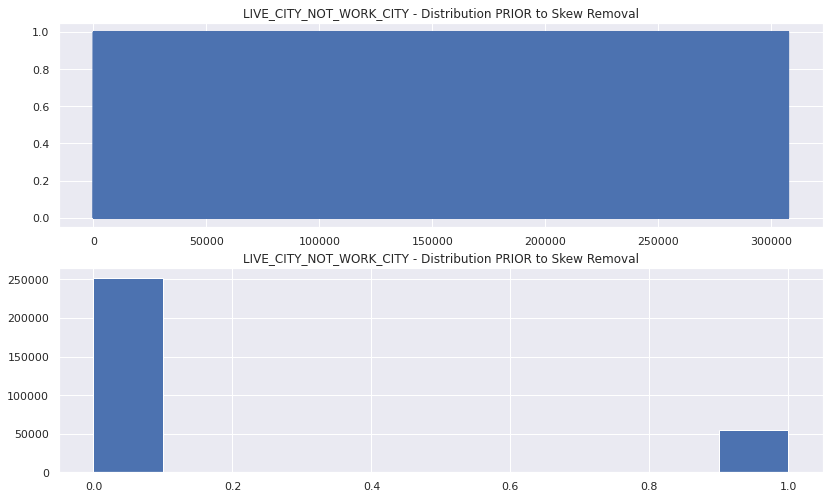

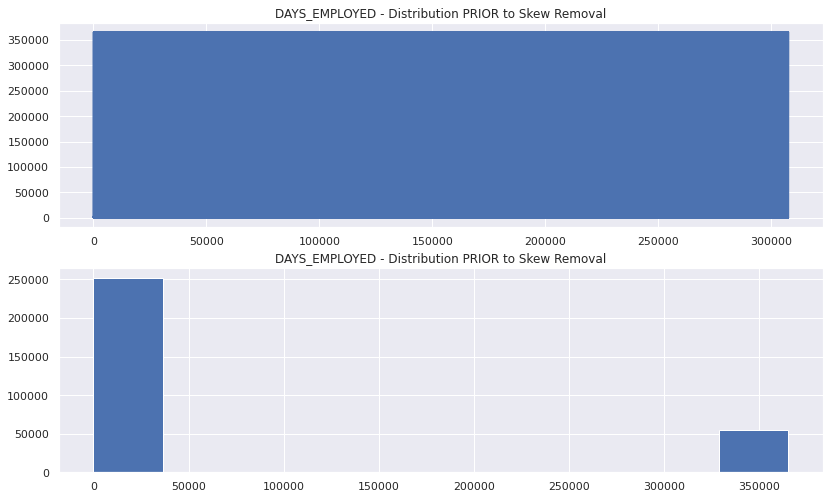

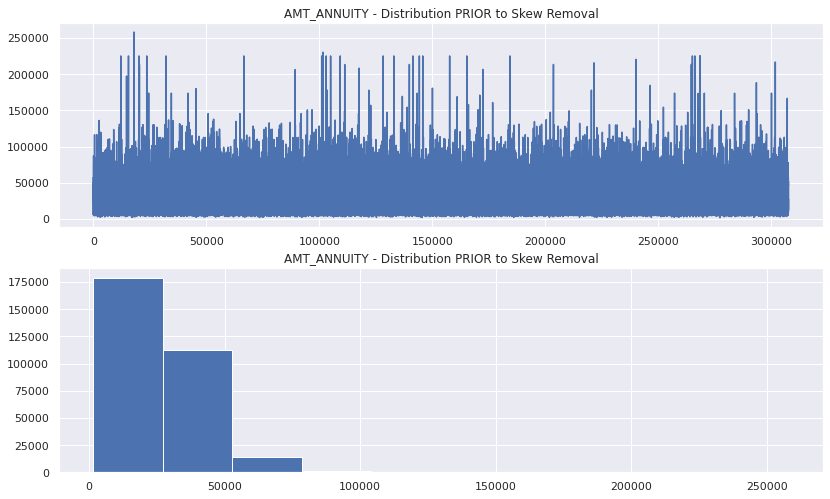

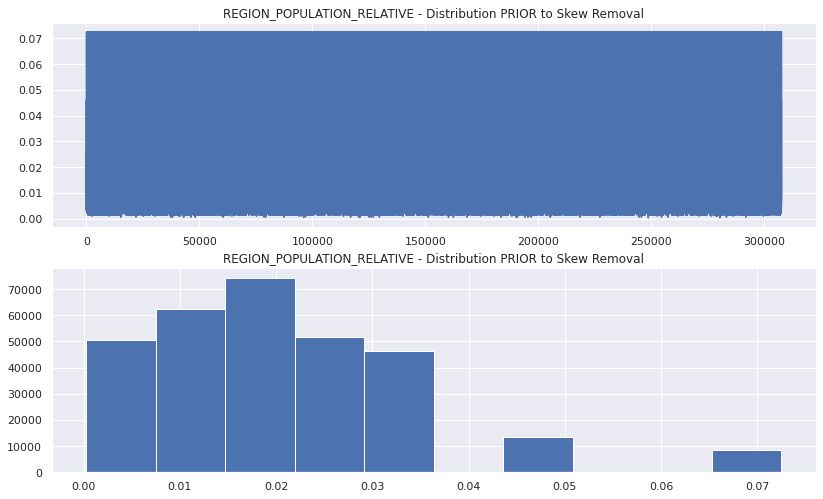

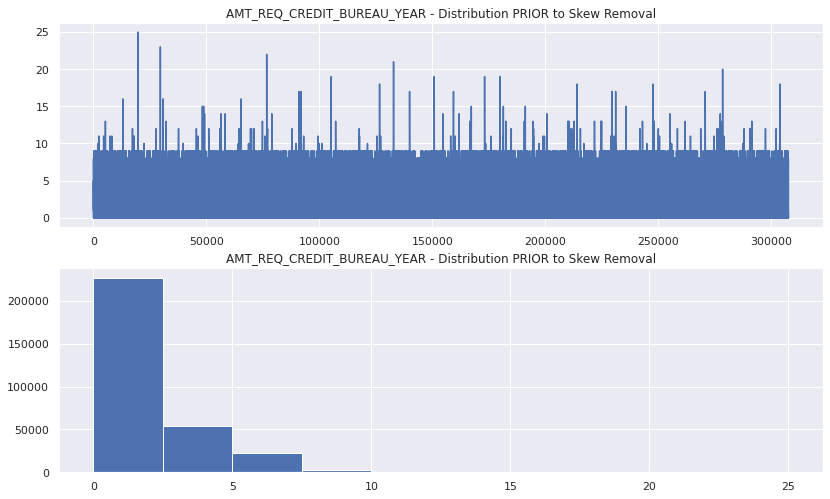

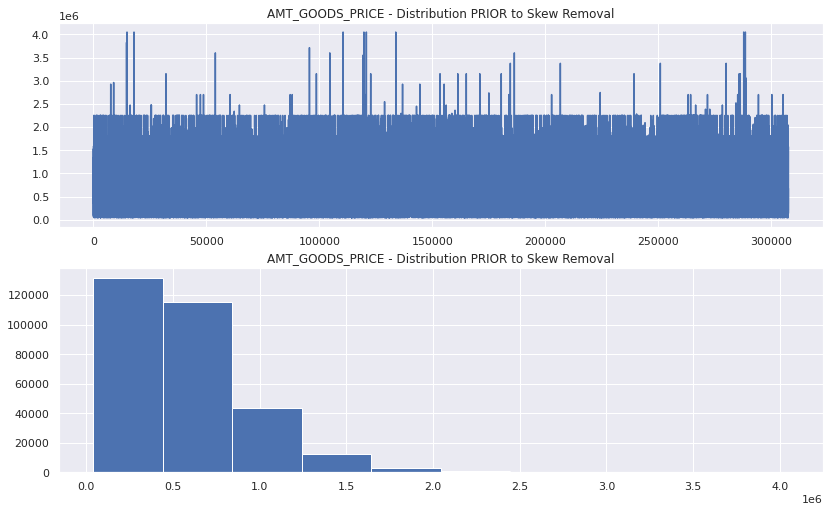

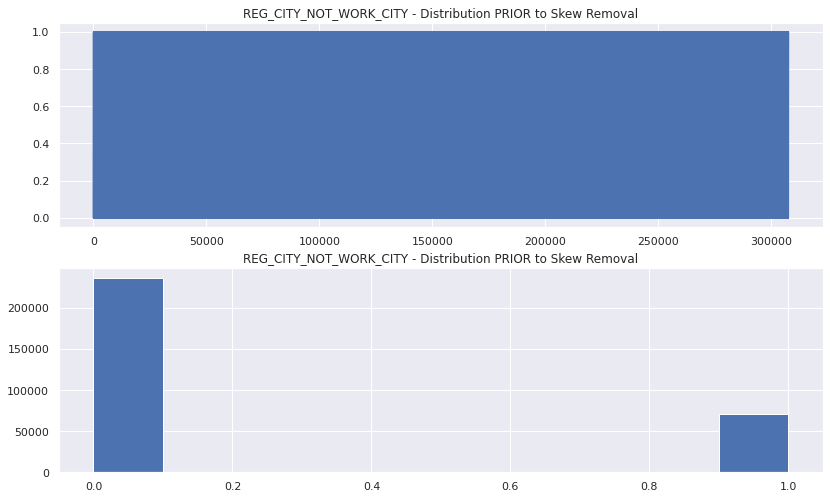

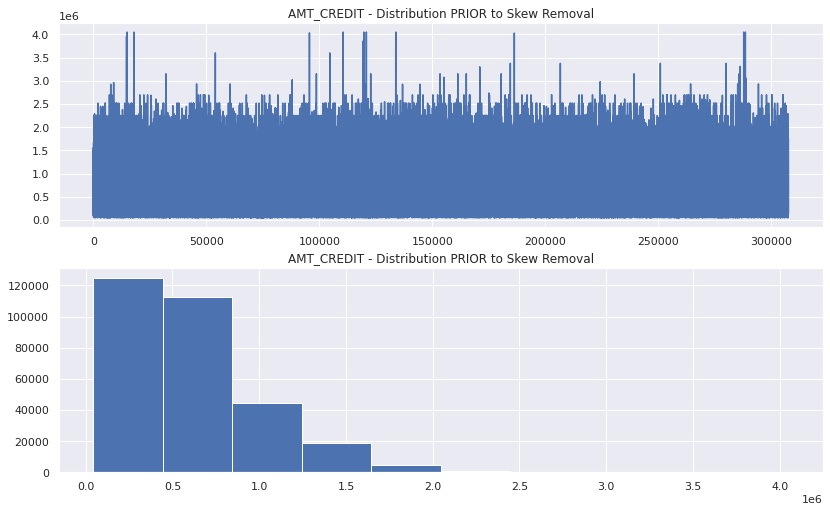

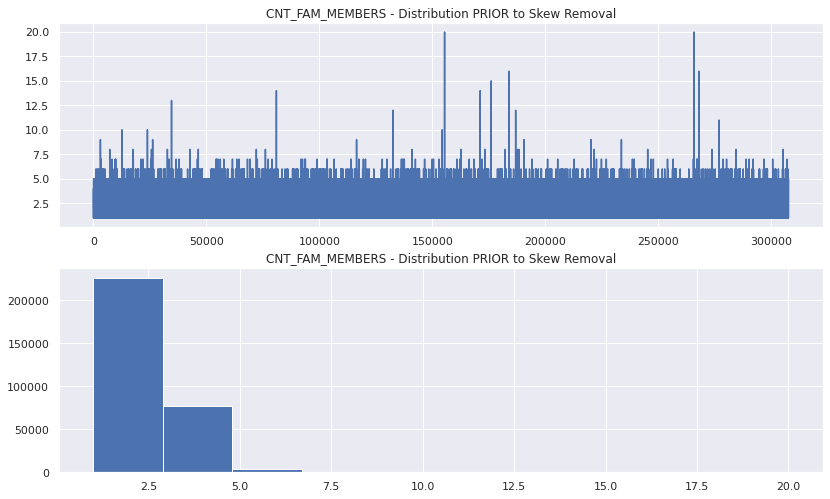

In [43]:
# Plot the fetures taht have skew > 0.75
for x in skew_features:
  plt.figure(1)
  # line plot
  plt.subplot(211)
  plt.title("%s - Distribution PRIOR to Skew Removal" %x)
  plt.plot(df_Prep[x])
  # histogram
  plt.subplot(212)
  plt.title("%s - Distribution PRIOR to Skew Removal" %x)
  plt.hist(df_Prep[x])
  plt.show()



Remove skew

AMT_INCOME_TOTAL
0.1759930976590144


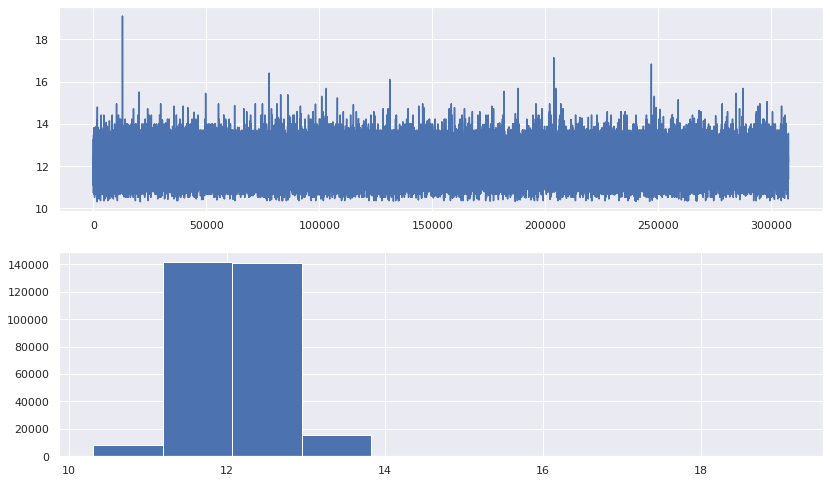

AMT_REQ_CREDIT_BUREAU_QRT
2.1993460503453393


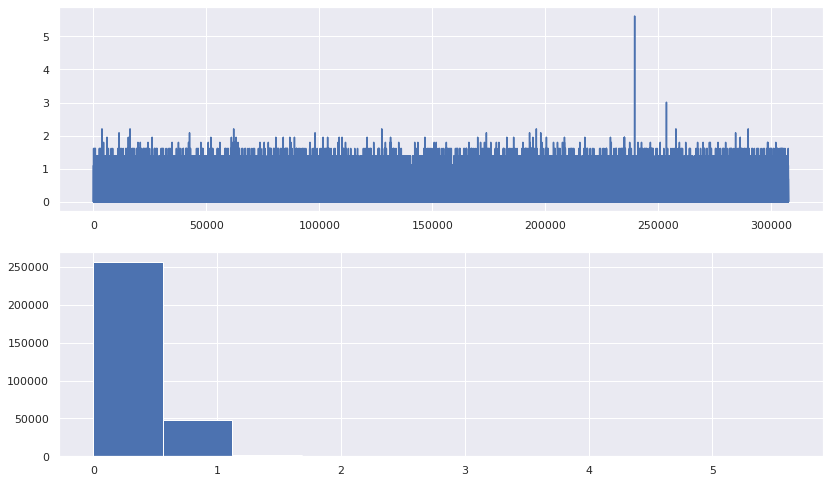

AMT_REQ_CREDIT_BUREAU_DAY
17.081799701797483


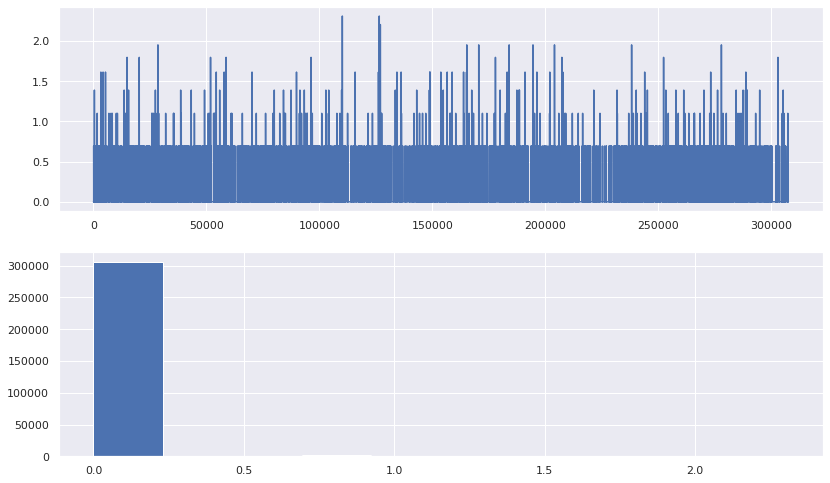

AMT_REQ_CREDIT_BUREAU_HOUR
14.13917071060904


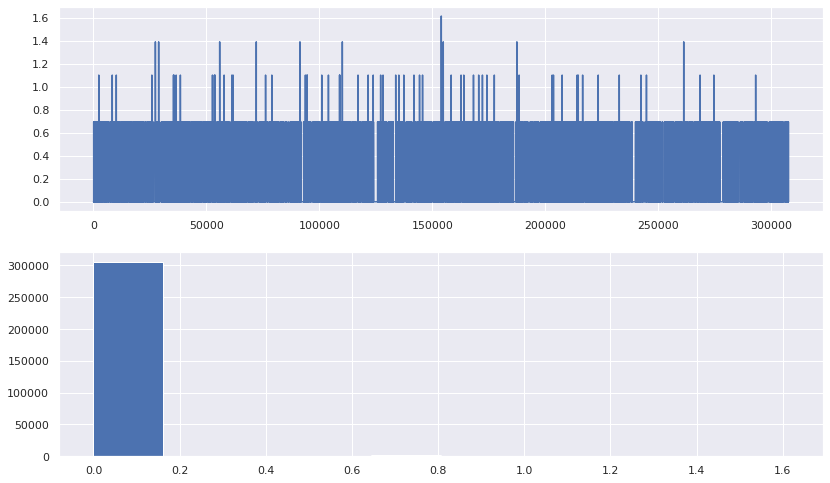

OBS_30_CNT_SOCIAL_CIRCLE
0.9074804044316169


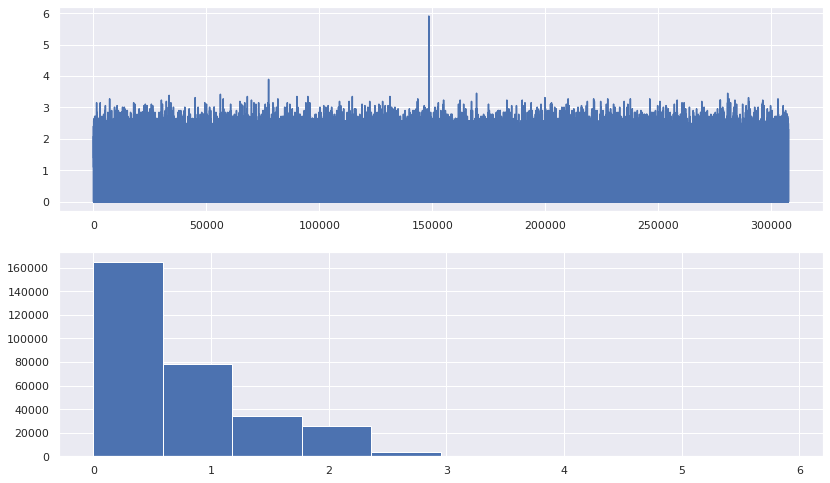

OBS_60_CNT_SOCIAL_CIRCLE
0.9163303129617142


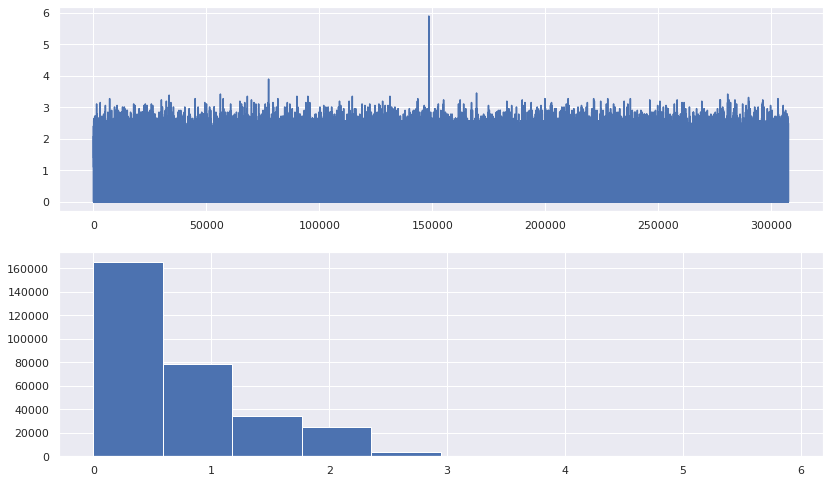

AMT_REQ_CREDIT_BUREAU_WEEK
6.2765597022258675


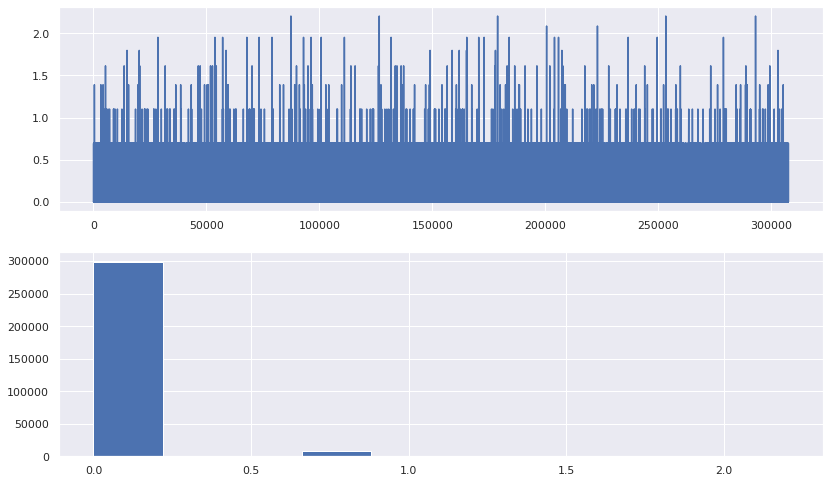

AMT_REQ_CREDIT_BUREAU_MON
3.217506997090558


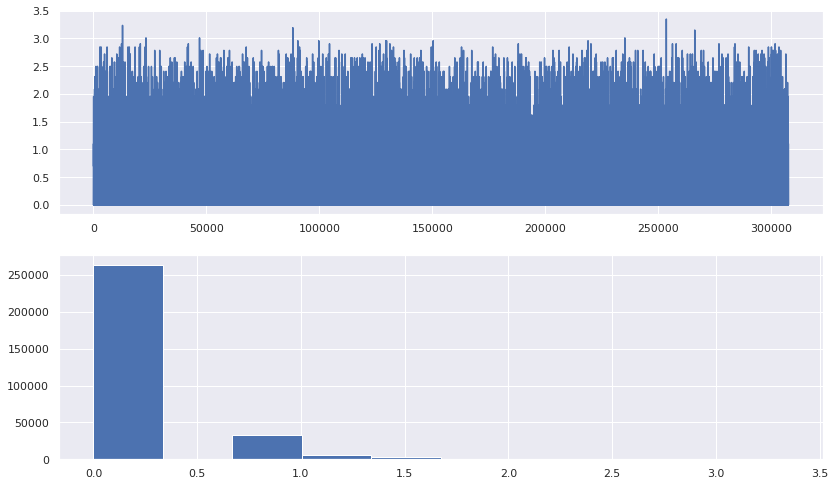

REG_REGION_NOT_LIVE_REGION
7.940222179079371


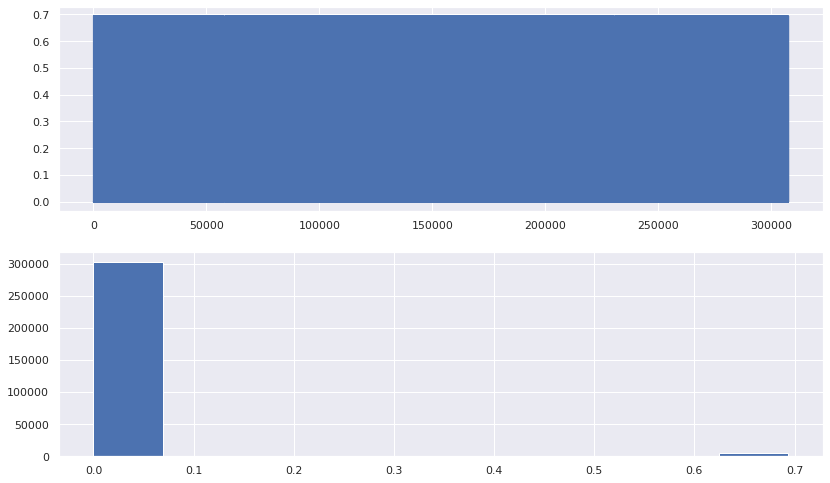

DEF_60_CNT_SOCIAL_CIRCLE
3.4166360510506375


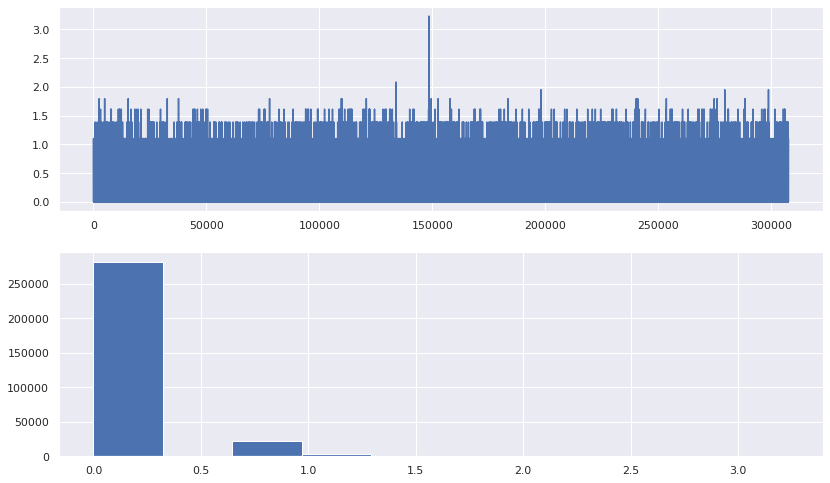

DEF_30_CNT_SOCIAL_CIRCLE
2.8561624378233255


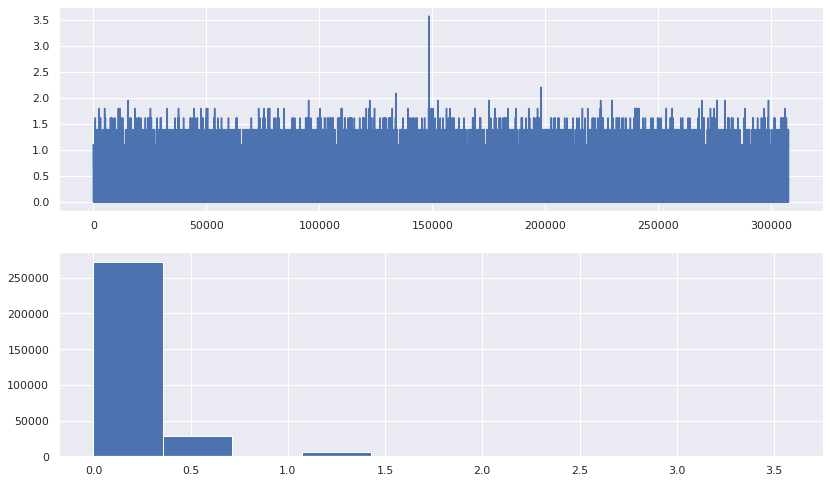

LIVE_REGION_NOT_WORK_REGION
4.651585842324983


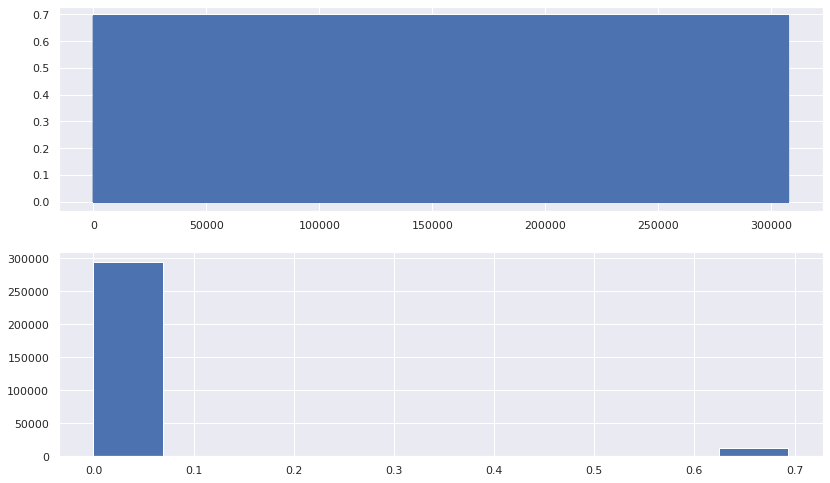

REG_REGION_NOT_WORK_REGION
4.092735536149205


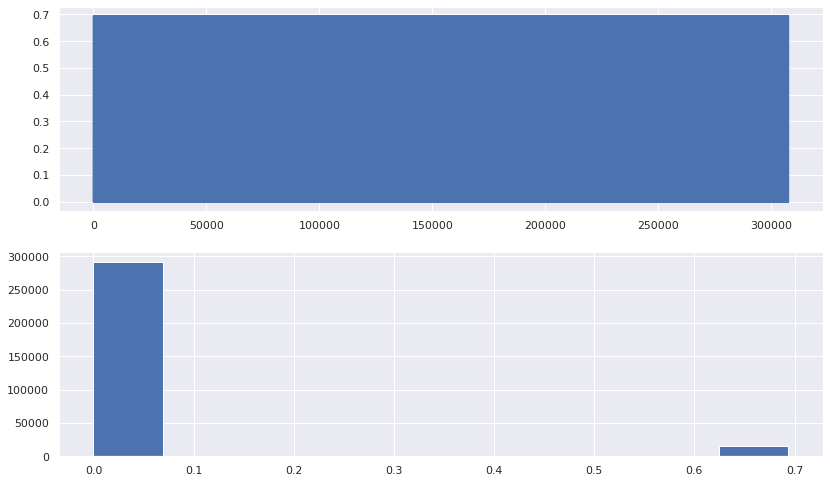

REG_CITY_NOT_LIVE_CITY
3.1427542442541987


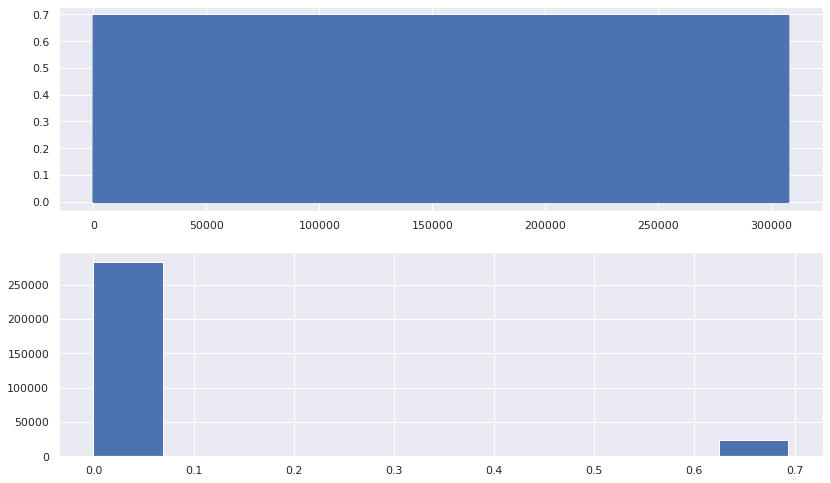

NAME_CONTRACT_TYPE_0
2.758509409962388


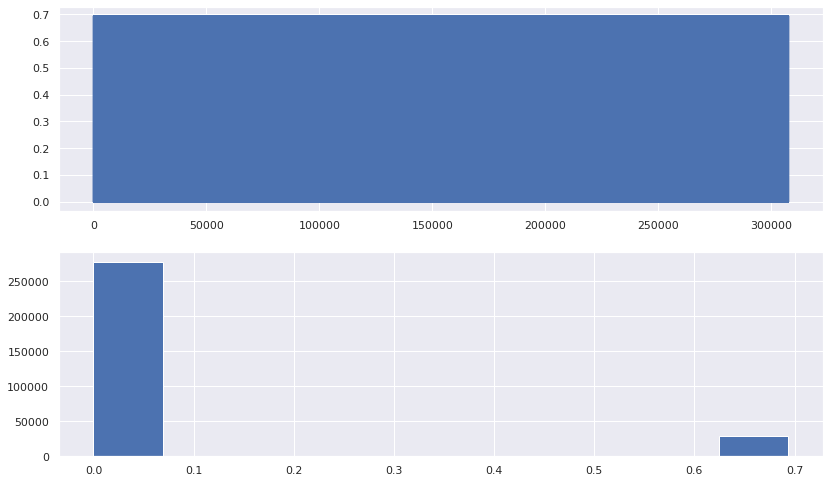

CNT_CHILDREN
1.2157232495855406


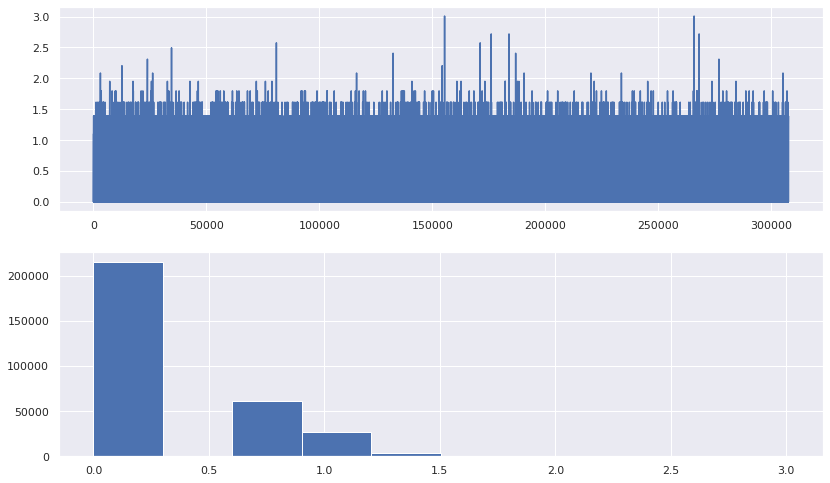

LIVE_CITY_NOT_WORK_CITY
1.6697743409045505


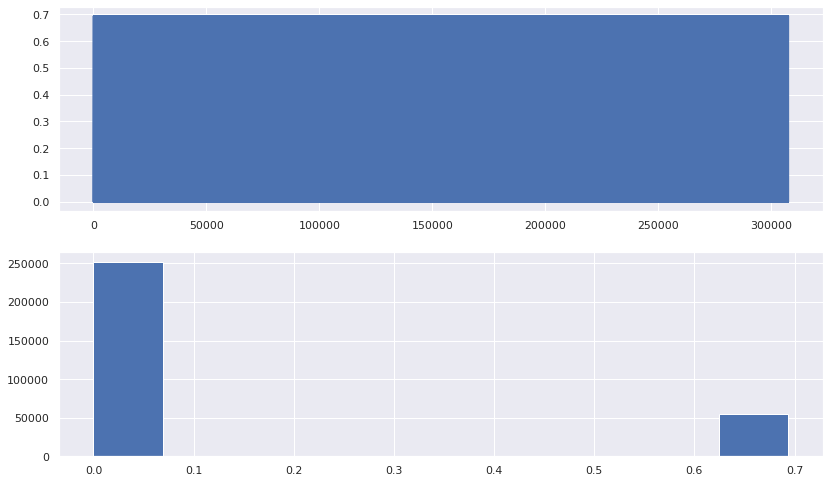

DAYS_EMPLOYED
1.0173309507273969


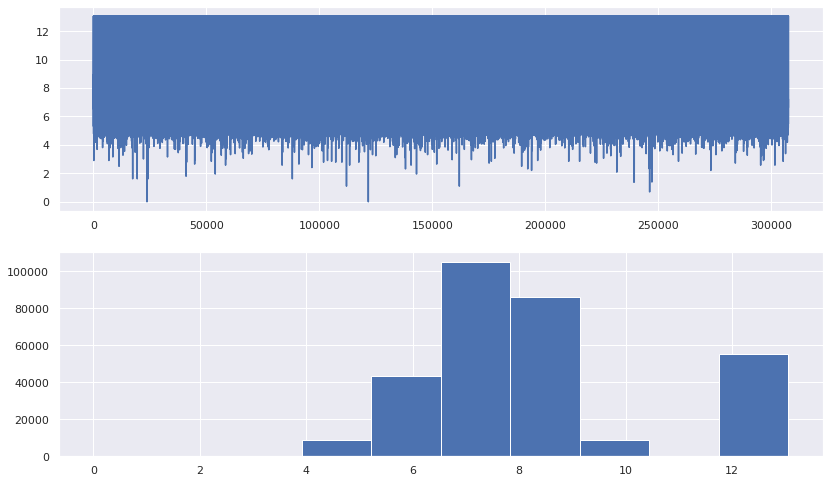

AMT_ANNUITY
-0.34108378346528273


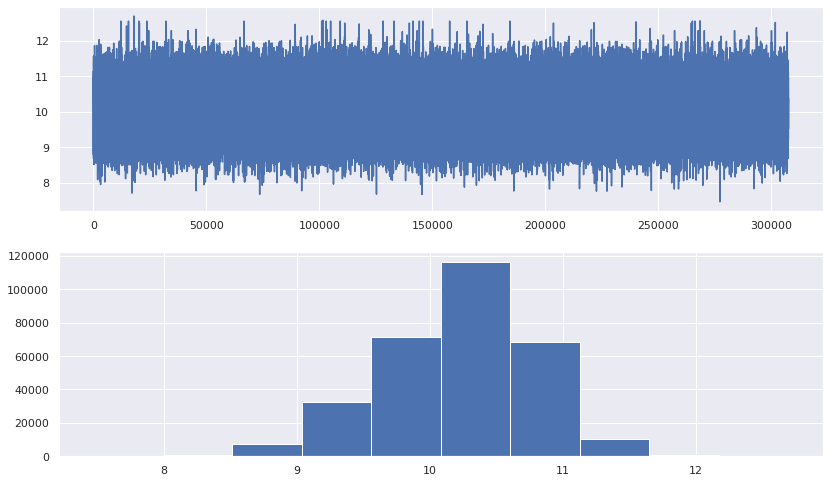

REGION_POPULATION_RELATIVE
1.427810942109706


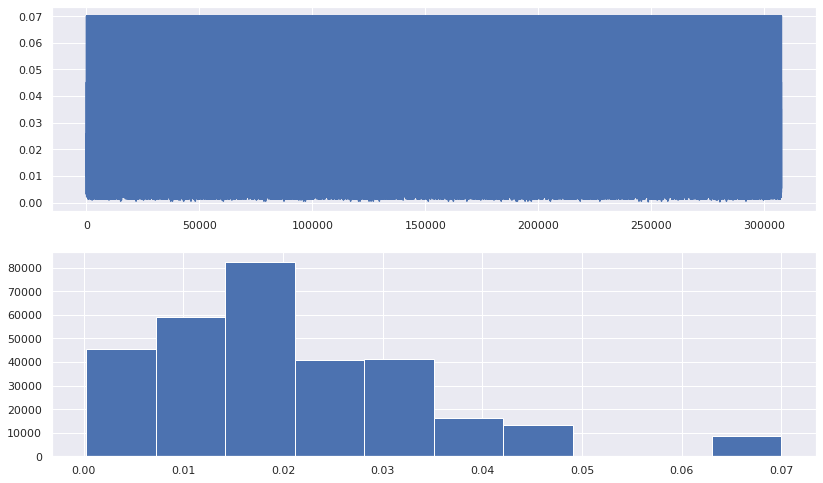

AMT_REQ_CREDIT_BUREAU_YEAR
0.14399955543088883


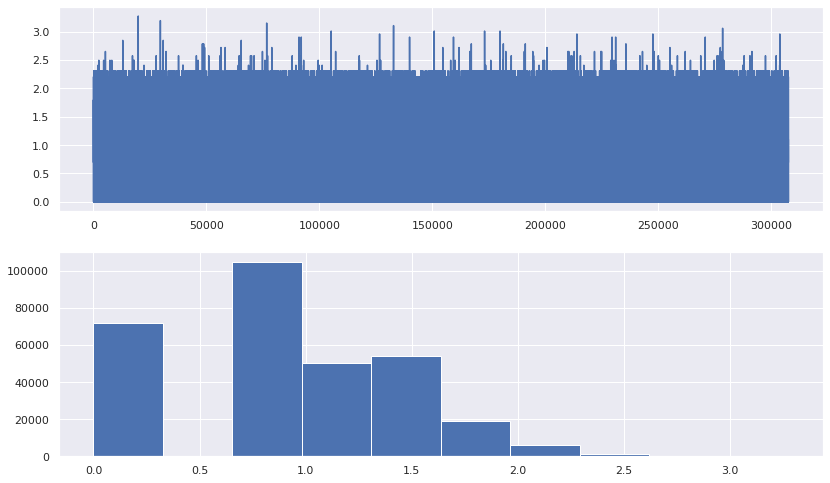

AMT_GOODS_PRICE
-0.2880086752956831


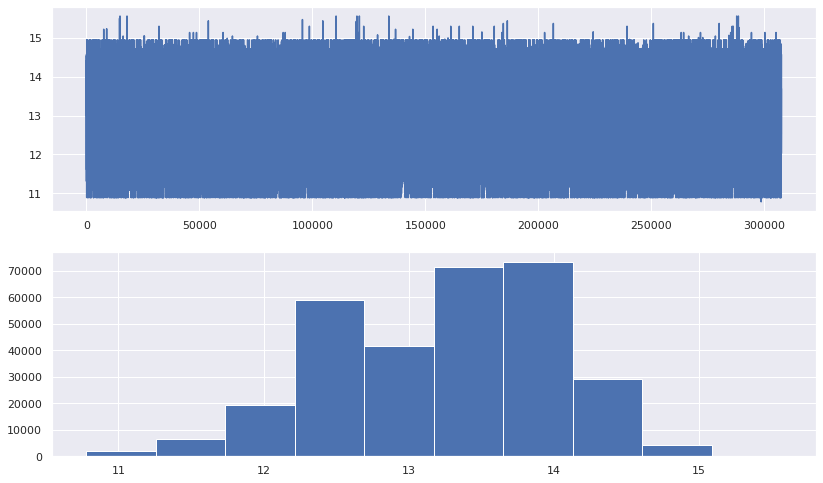

REG_CITY_NOT_WORK_CITY
1.280117436083245


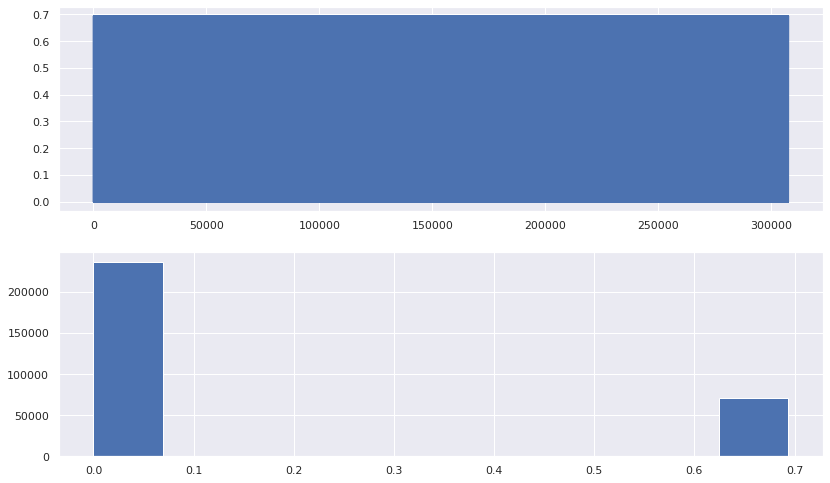

AMT_CREDIT
-0.33368681547604057


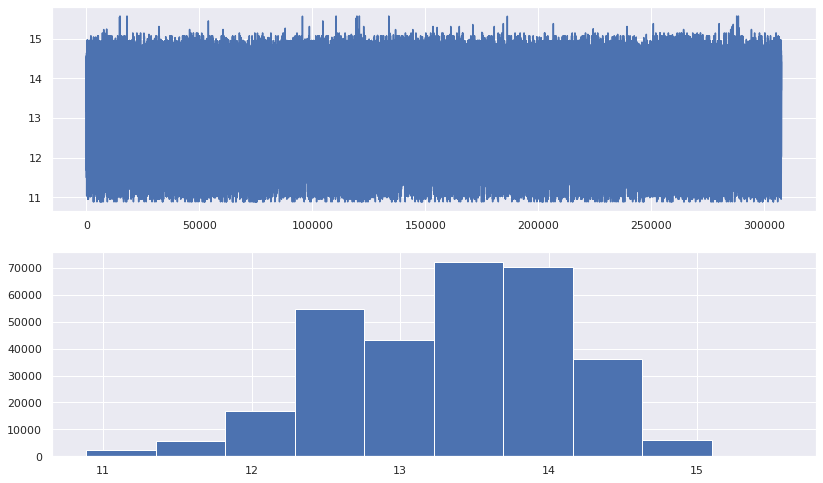

CNT_FAM_MEMBERS
0.13101989401904238


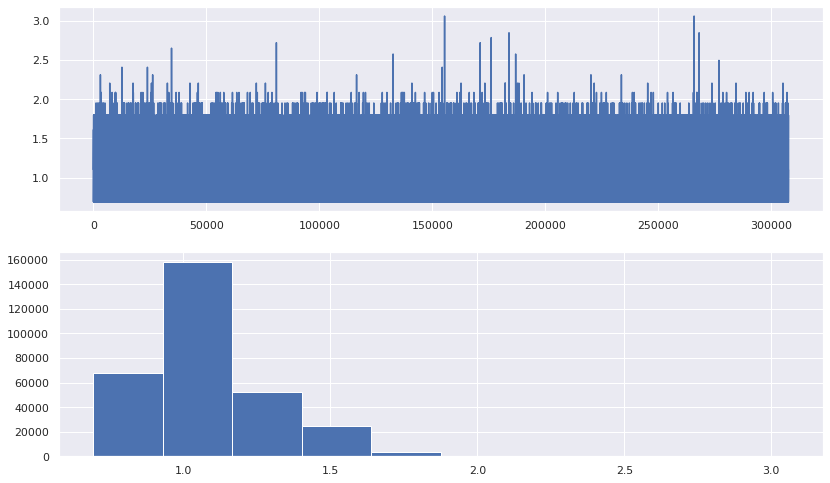

In [44]:
# Remove skew for fetures using Box Cox 1. (Box Cox can only be used if the features do not have the value zero, ance Box Cox 1)
from scipy.stats import boxcox
from scipy.special import boxcox1p

# Set lamda value
lam = 0.003

df_Skew = df_Prep.copy()

# Remove skew using box cox 1
for x in skew_features:
  df_Skew.loc[:, x] = boxcox1p(df_Skew[x], lam)
  print (x)
  print(df_Skew[x].skew())
  plt.figure(1)
  # line plot
  plt.title("%s - Distribution AFTER Skew Removal" %x)
  plt.subplot(211)
  plt.plot(df_Skew[x])
  #histogram
  # histogram
  plt.subplot(212)
  plt.hist(df_Skew[x])
  plt.show()



In [45]:
after_removal_skew = df_Skew[skew_features].skew(axis=None, skipna=True, level=None, numeric_only=True).sort_values(ascending= False)
print(after_removal_skew)

AMT_REQ_CREDIT_BUREAU_DAY      17.081800
AMT_REQ_CREDIT_BUREAU_HOUR     14.139171
REG_REGION_NOT_LIVE_REGION      7.940222
AMT_REQ_CREDIT_BUREAU_WEEK      6.276560
LIVE_REGION_NOT_WORK_REGION     4.651586
REG_REGION_NOT_WORK_REGION      4.092736
DEF_60_CNT_SOCIAL_CIRCLE        3.416636
AMT_REQ_CREDIT_BUREAU_MON       3.217507
REG_CITY_NOT_LIVE_CITY          3.142754
DEF_30_CNT_SOCIAL_CIRCLE        2.856162
NAME_CONTRACT_TYPE_0            2.758509
AMT_REQ_CREDIT_BUREAU_QRT       2.199346
LIVE_CITY_NOT_WORK_CITY         1.669774
REGION_POPULATION_RELATIVE      1.427811
REG_CITY_NOT_WORK_CITY          1.280117
CNT_CHILDREN                    1.215723
DAYS_EMPLOYED                   1.017331
OBS_60_CNT_SOCIAL_CIRCLE        0.916330
OBS_30_CNT_SOCIAL_CIRCLE        0.907480
AMT_INCOME_TOTAL                0.175993
AMT_REQ_CREDIT_BUREAU_YEAR      0.144000
CNT_FAM_MEMBERS                 0.131020
AMT_GOODS_PRICE                -0.288009
AMT_CREDIT                     -0.333687
AMT_ANNUITY     

# Outlier removal

In [46]:
# Outlier Handling: Find Inter Quartile Ranges outliers and REPLACE the outlier with Upper Boundary (75 percentile value)

# Ouliter Handling for Skewed features. Consider higher extreemes IQR *3 

outlier_skew_features= ['CNT_CHILDREN', 
'REGION_POPULATION_RELATIVE' ,
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE' ,
'OBS_60_CNT_SOCIAL_CIRCLE' ,
'DEF_60_CNT_SOCIAL_CIRCLE' ]

df_Outlier = df_Skew.copy()

for x in outlier_skew_features:
  IQR_skew = df_Outlier[x].quantile(0.75) - df_Outlier[x].quantile(0.25)
  # Using extreeme outliers for skewed data set. (For non skewed features or Gaussian distribution use 1.5 * IQR)
  lower_boundary = df_Outlier[x].quantile(0.25) - IQR_skew*3
  upper_boundary = df_Outlier[x].quantile(0.75) + IQR_skew*3
  
  #Handling: If the value is greater than the upper boundary, assign the calculated value of the upper boundary.  
  df_Outlier.loc[df_Outlier[x] > upper_boundary,x] = round(upper_boundary)
  
  print( " Outliers for SKEWED features: %s- %s, %s" %(x,lower_boundary,upper_boundary)) 

# Ouliter removal for non-skewed features. Consider IQR*1.5
print("\n")
outlier_nonskew_features = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT', 
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'DAYS_LAST_PHONE_CHANGE' ]

for x in outlier_nonskew_features:
  IQR_non_skew = df_Outlier[x].quantile(0.75) - df_Outlier[x].quantile(0.25)
  # Using extreeme outliers for skewed data set. (For non skewed features or Gaussian distribution use 1.5 * IQR)
  lower_boundary = df_Outlier[x].quantile(0.25) - IQR_non_skew*1.5
  upper_boundary = df_Outlier[x].quantile(0.75) + IQR_non_skew*1.5
  
  #Handling: If the value is greater than the upper boundary, assign the calculated value of the upper boundary.  
  df_Outlier.loc[df_Outlier[x] > upper_boundary,x] = round(upper_boundary)
  
  print("Outliers for Non-SKEWED features:%s- %s, %s" %(x,lower_boundary,upper_boundary)) 


 Outliers for SKEWED features: CNT_CHILDREN- -2.081605079632795, 2.7754734395103933
 Outliers for SKEWED features: REGION_POPULATION_RELATIVE- -0.04495761575744224, 0.08317513462809523
 Outliers for SKEWED features: OBS_30_CNT_SOCIAL_CIRCLE- -3.3012741081079993, 4.401698810810665
 Outliers for SKEWED features: DEF_30_CNT_SOCIAL_CIRCLE- 0.0, 0.0
 Outliers for SKEWED features: OBS_60_CNT_SOCIAL_CIRCLE- -3.3012741081079993, 4.401698810810665
 Outliers for SKEWED features: DEF_60_CNT_SOCIAL_CIRCLE- 0.0, 0.0


Outliers for Non-SKEWED features:AMT_INCOME_TOTAL- 10.922222492556278, 13.358985163256014
Outliers for Non-SKEWED features:AMT_CREDIT- 11.032616745817165, 15.595637551390737
Outliers for Non-SKEWED features:AMT_ANNUITY- 8.713142552567444, 11.759474042515432
Outliers for Non-SKEWED features:AMT_GOODS_PRICE- 10.982503823848692, 15.335770113295236
Outliers for Non-SKEWED features:DAYS_LAST_PHONE_CHANGE- -1670.0, 3514.0


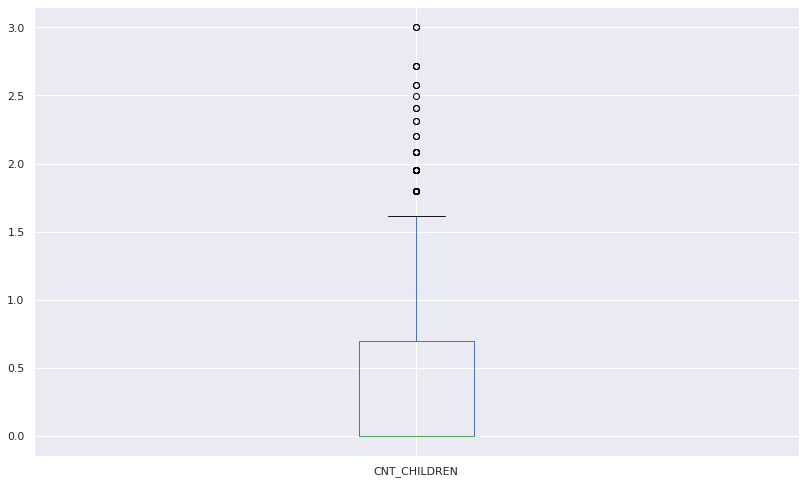

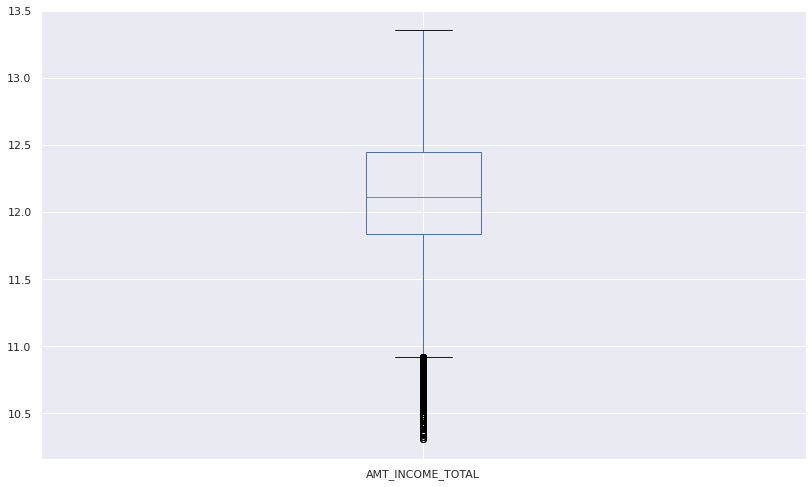

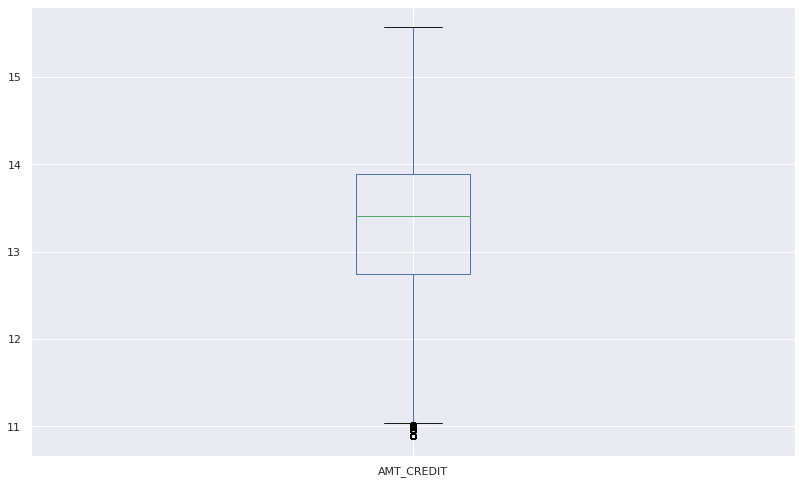

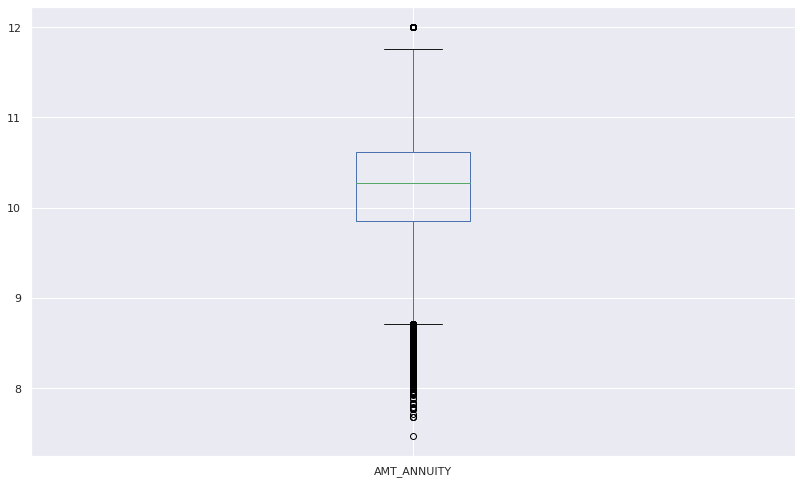

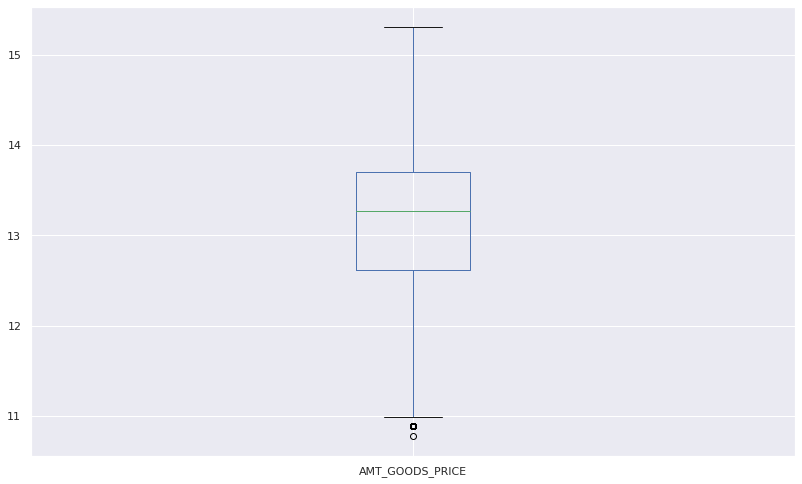

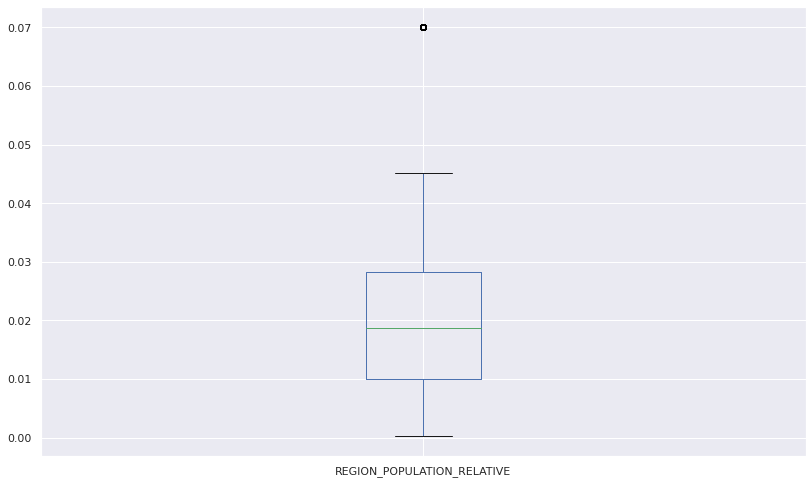

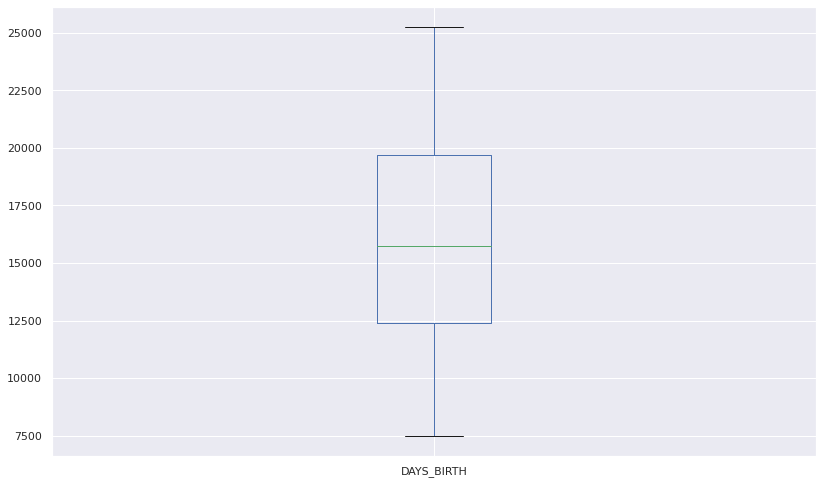

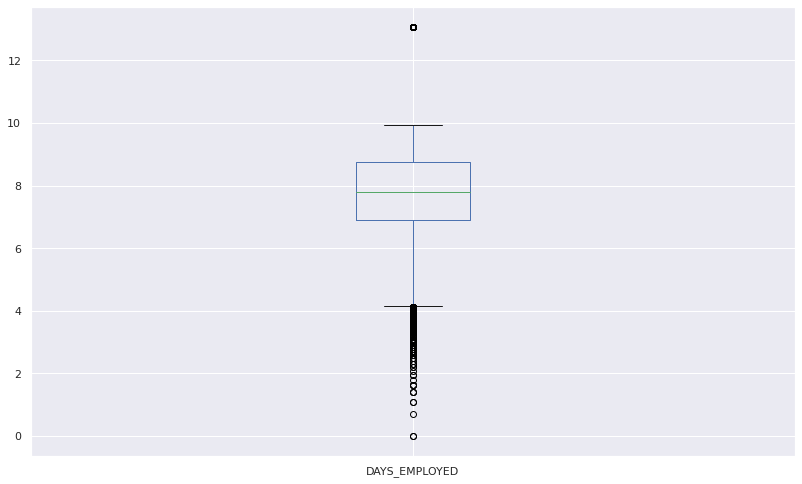

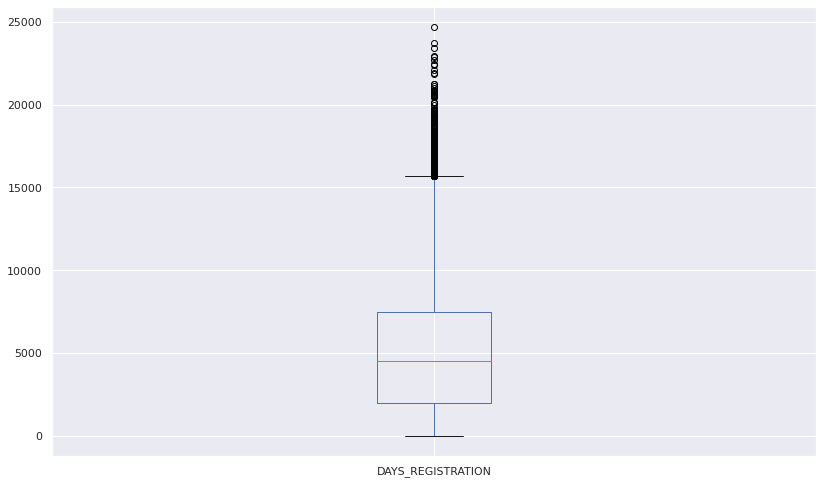

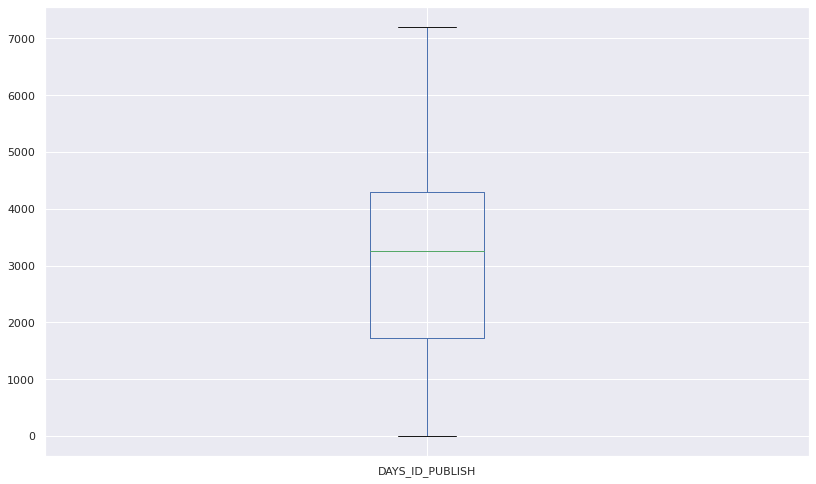

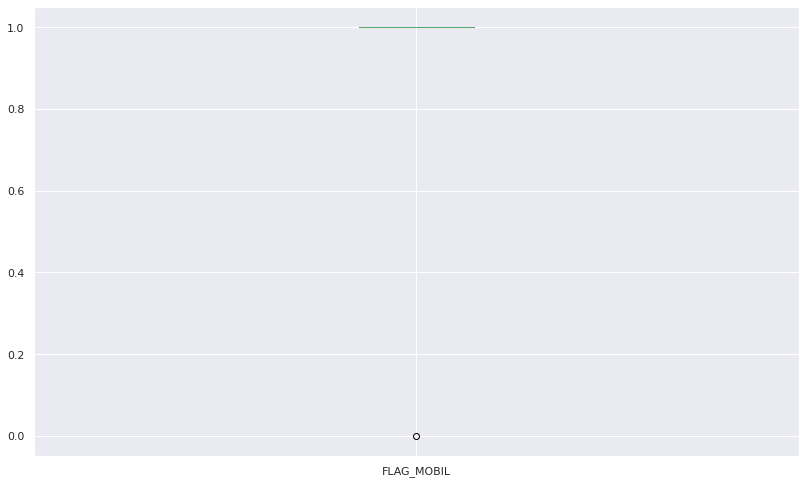

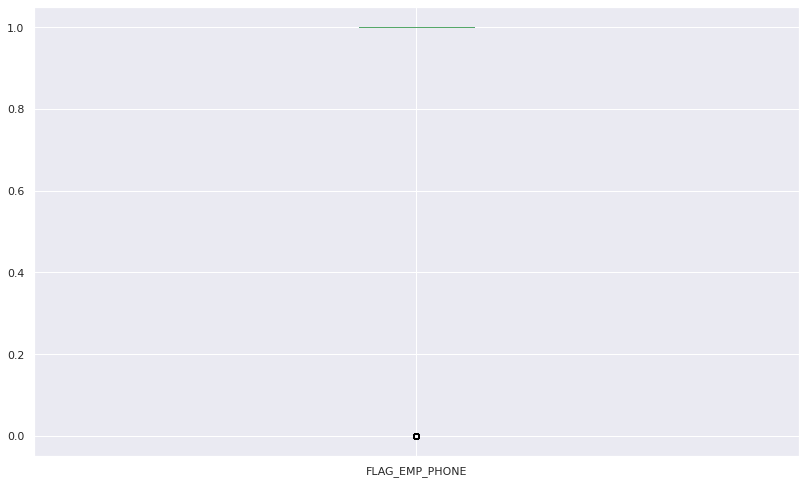

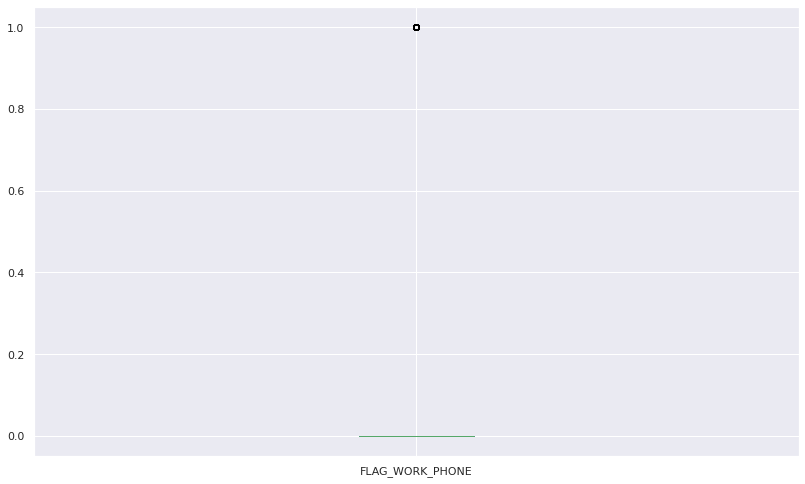

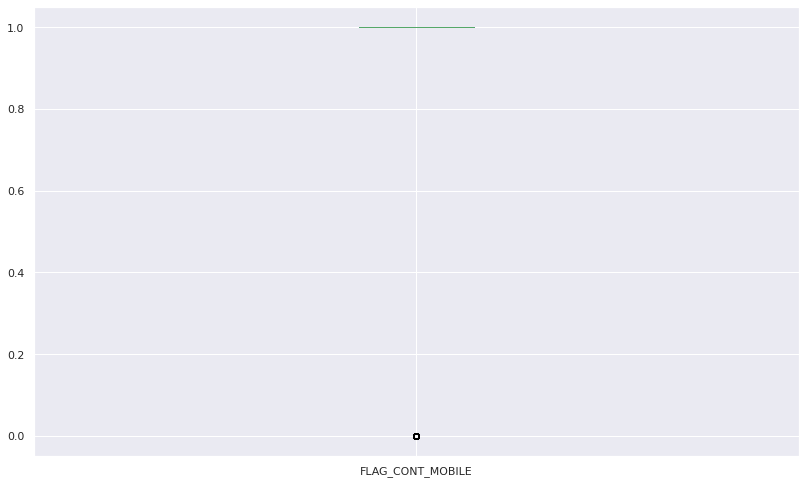

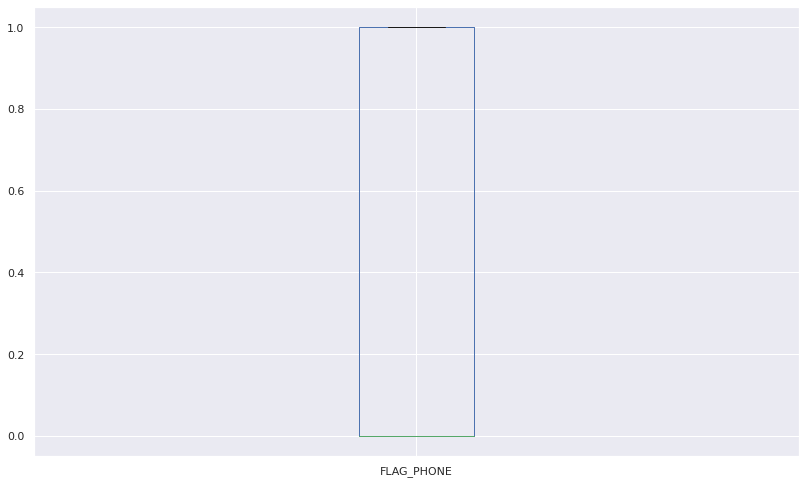

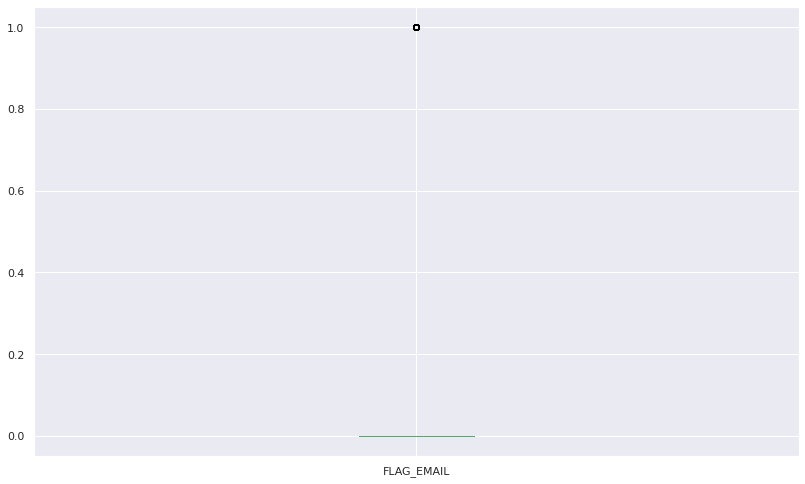

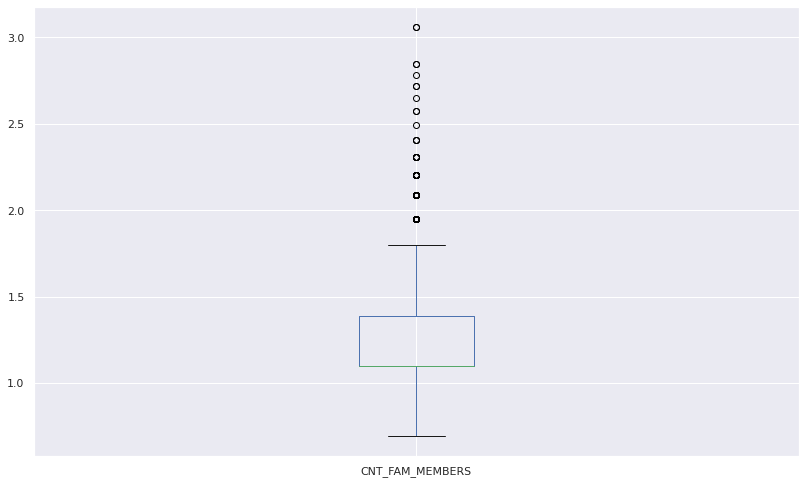

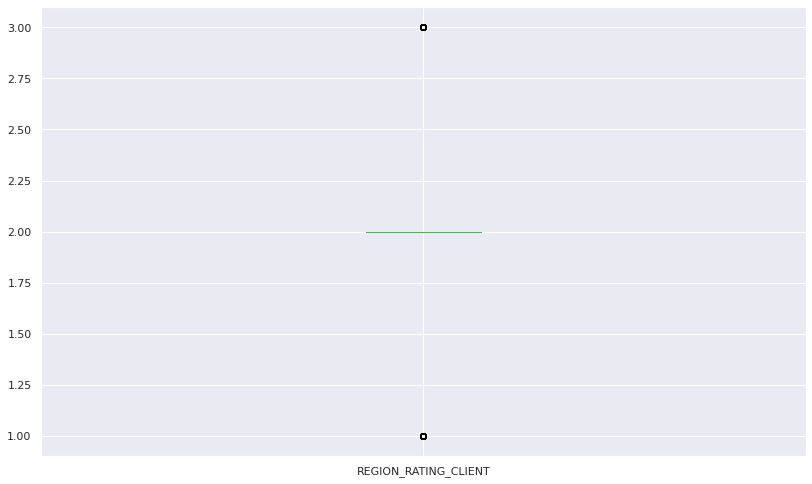

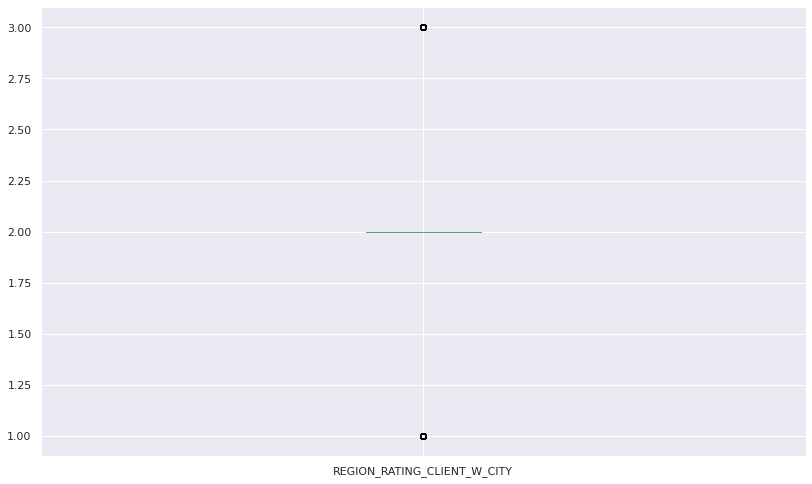

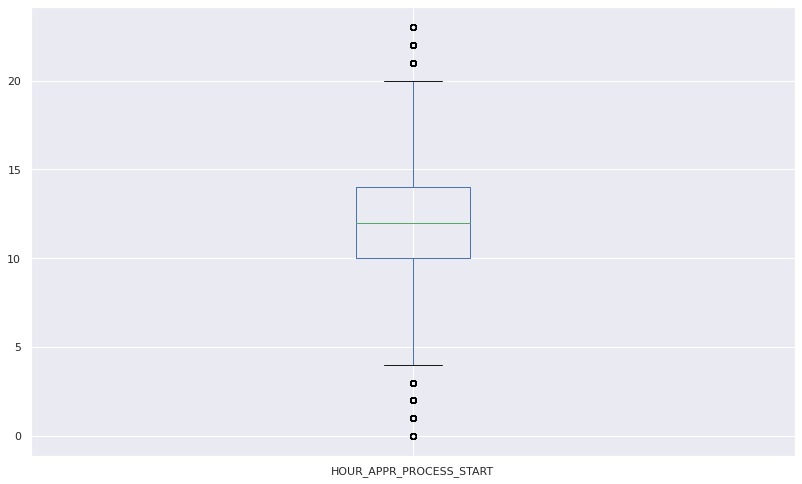

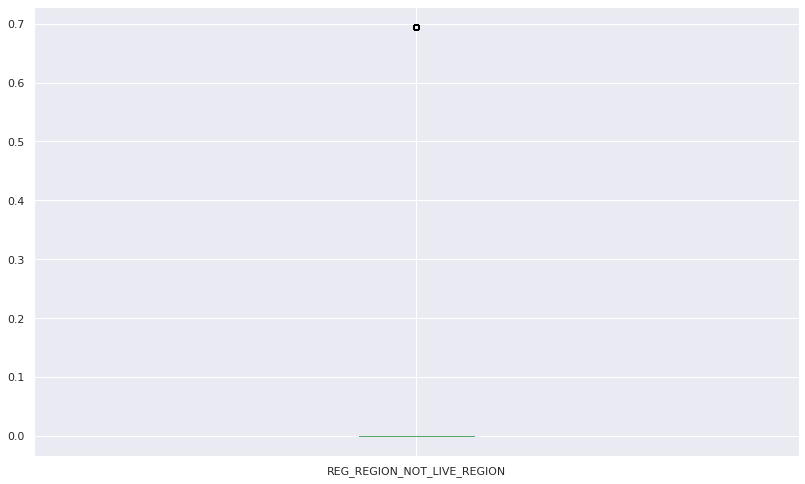

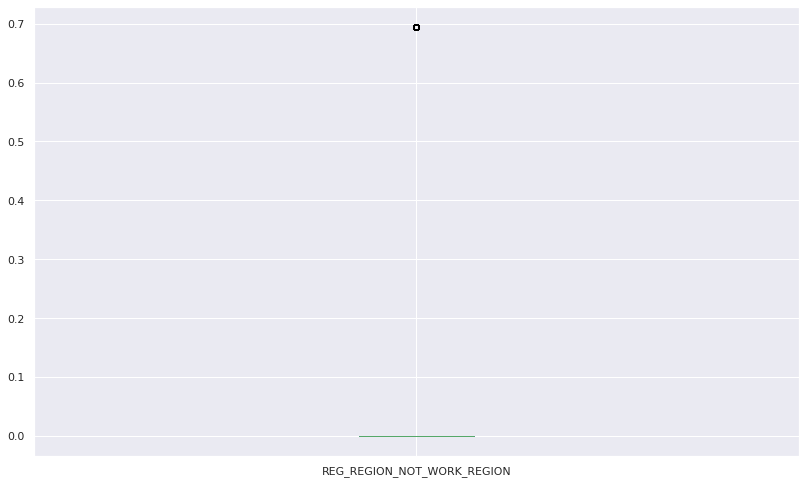

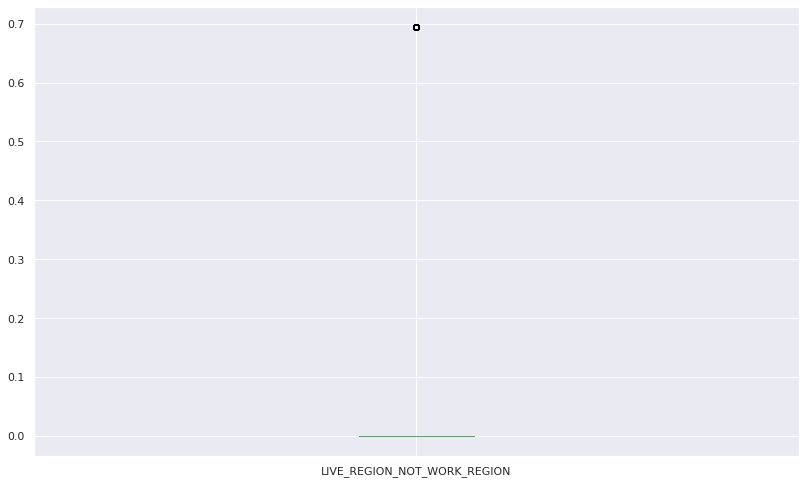

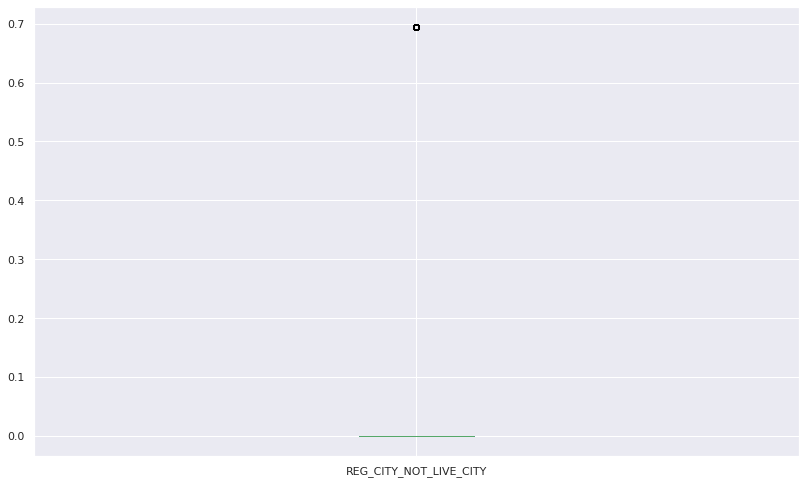

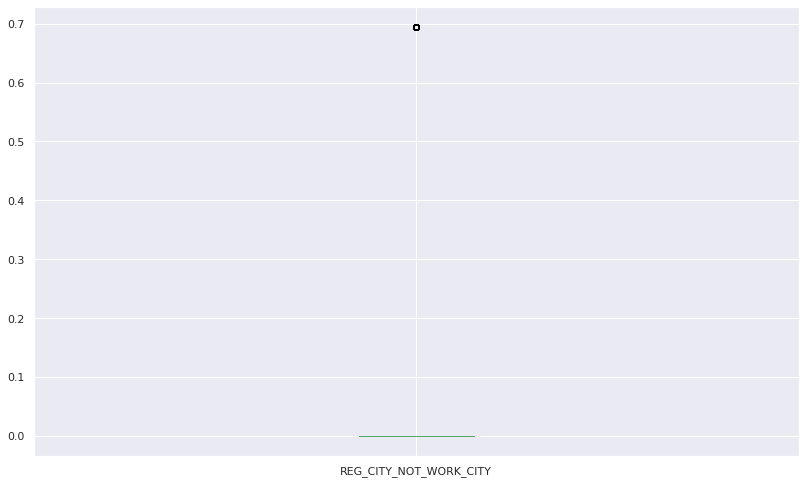

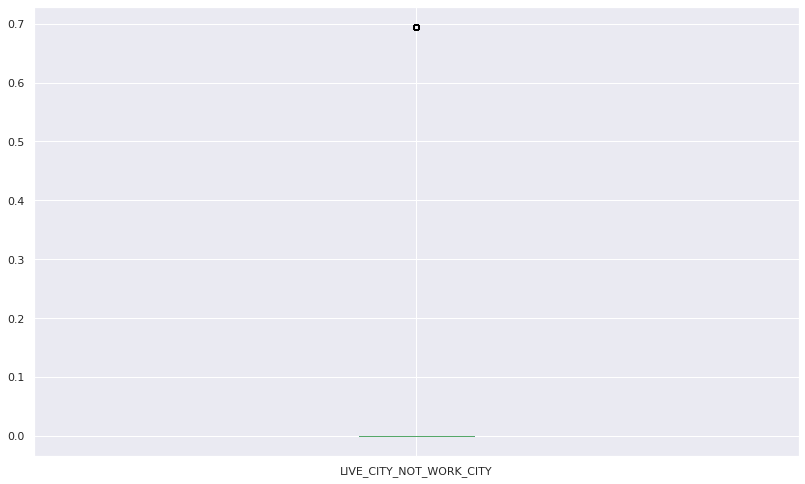

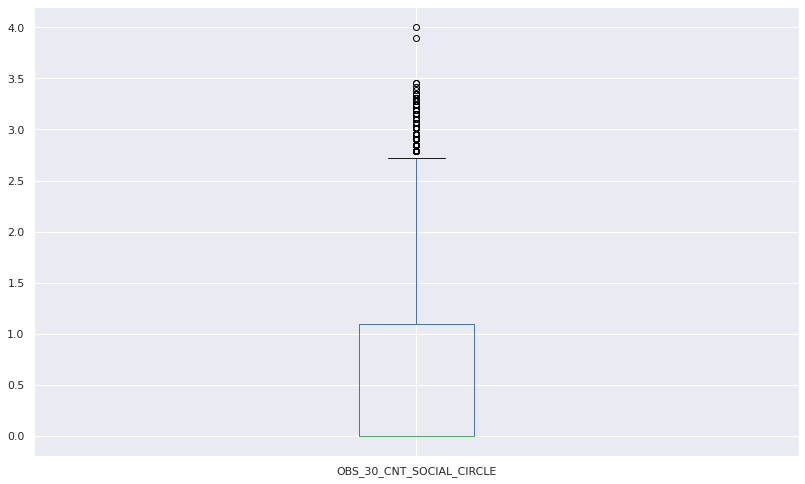

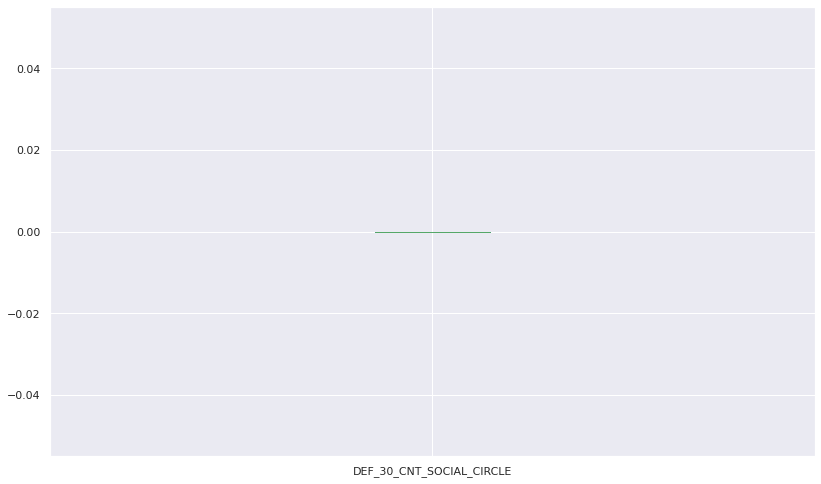

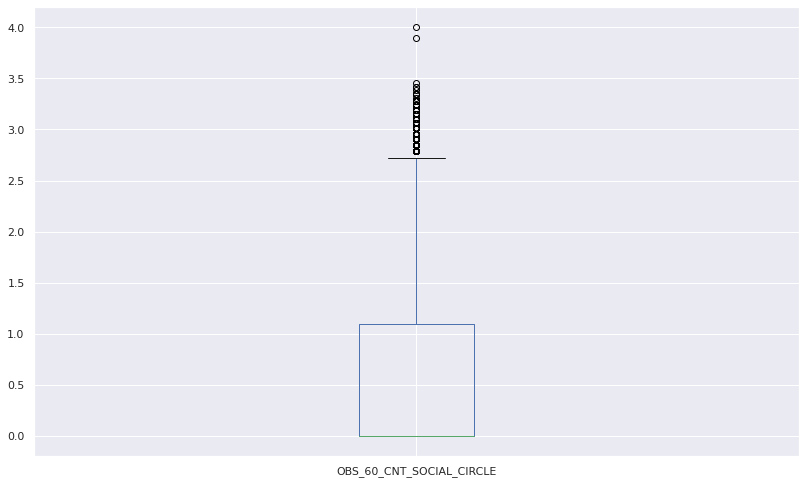

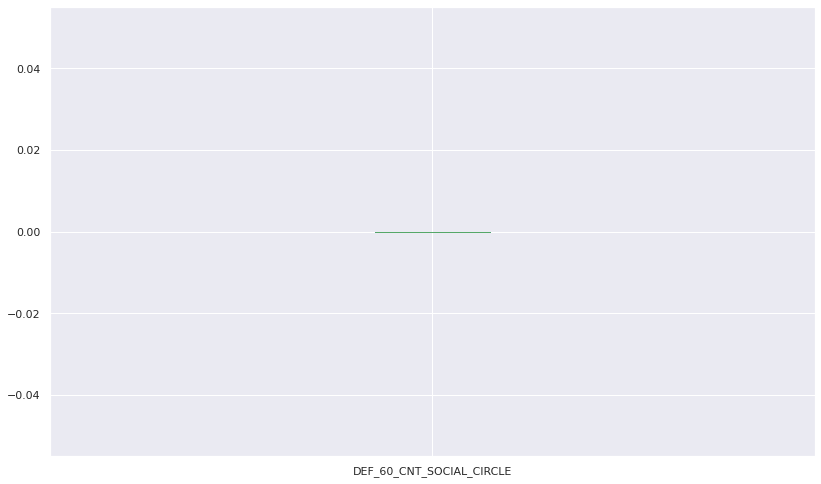

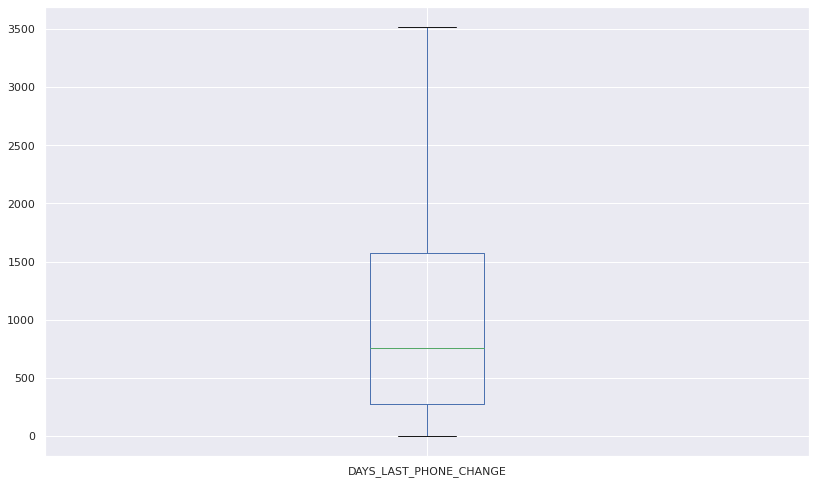

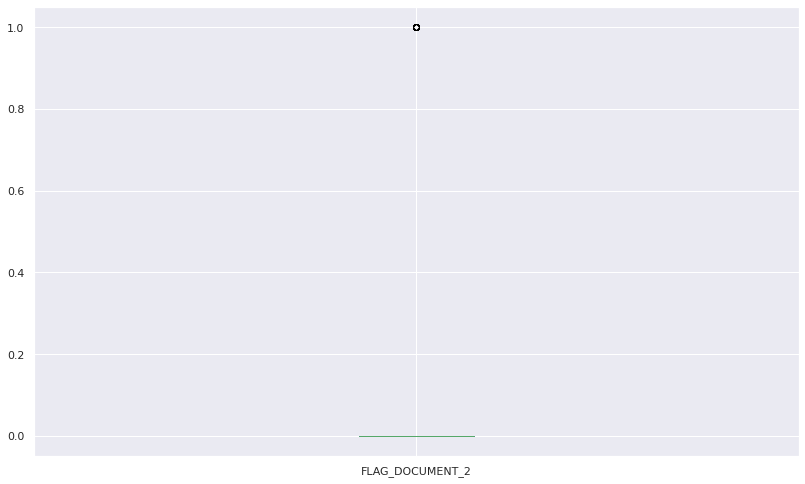

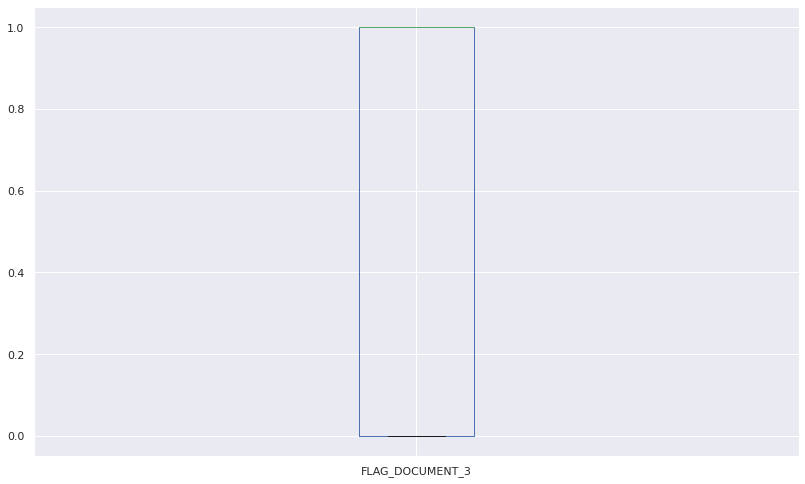

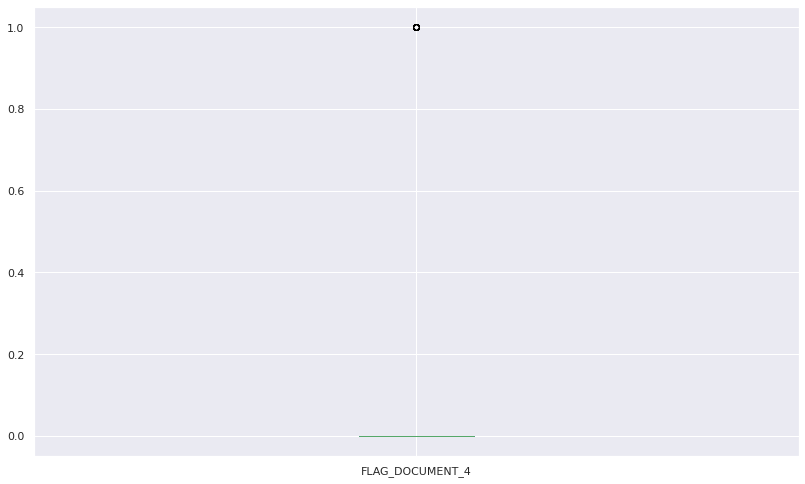

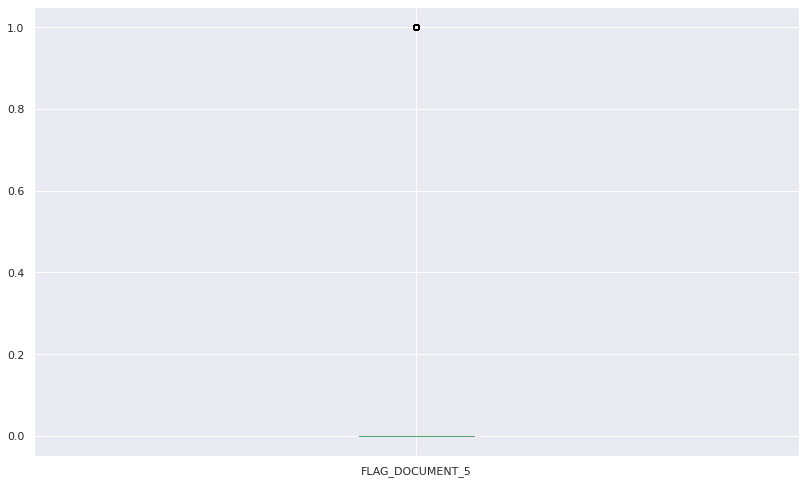

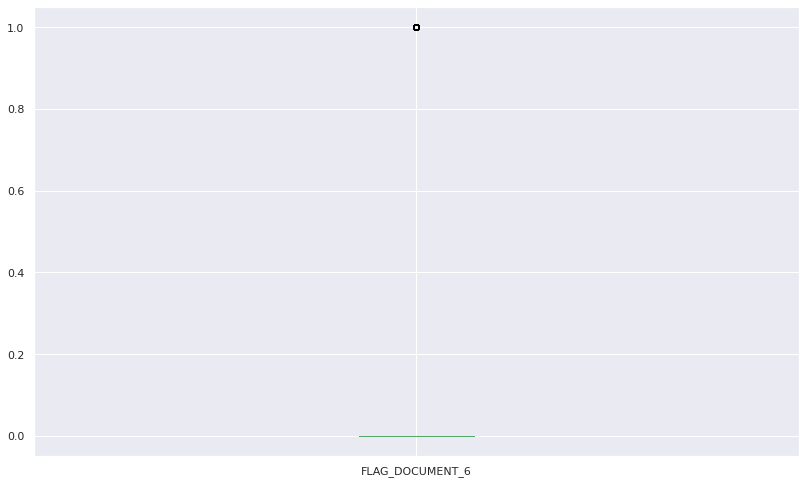

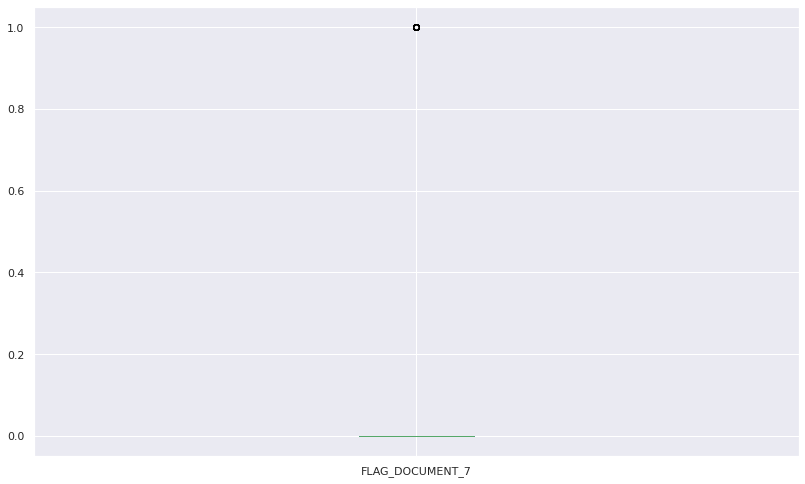

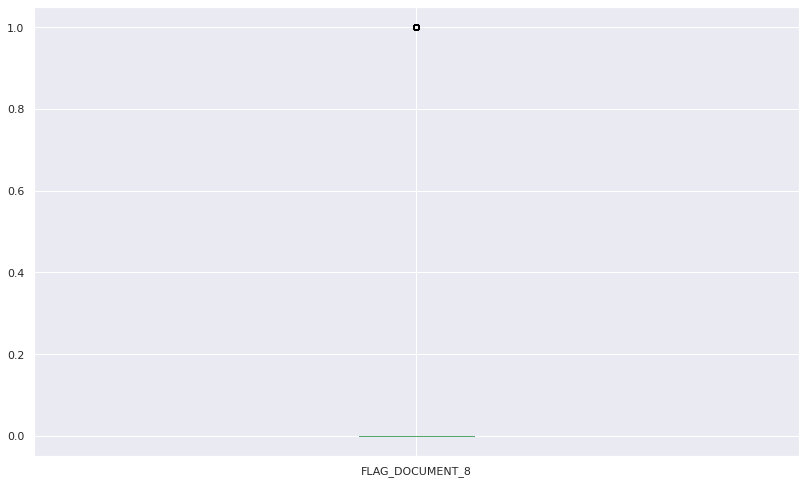

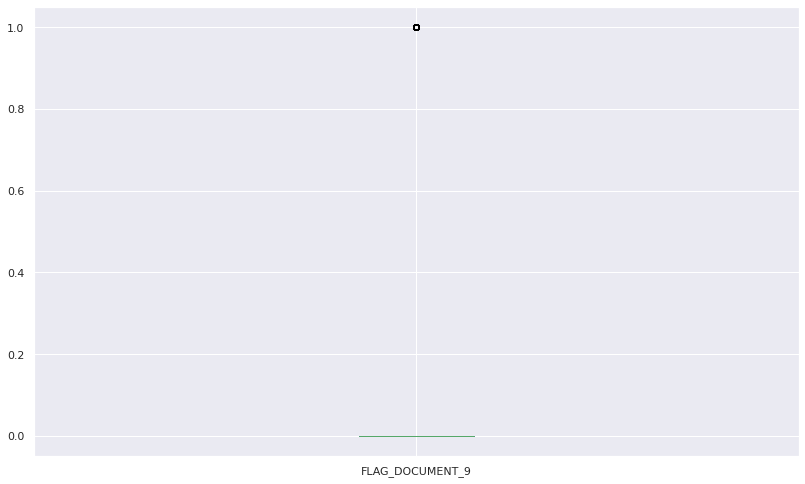

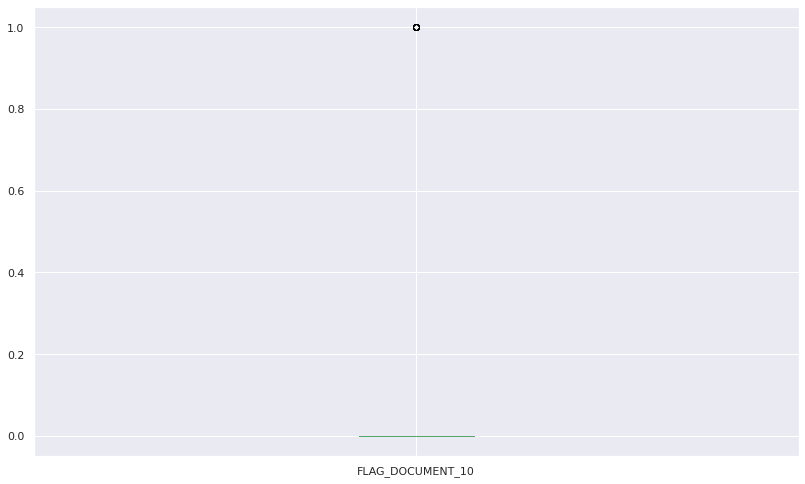

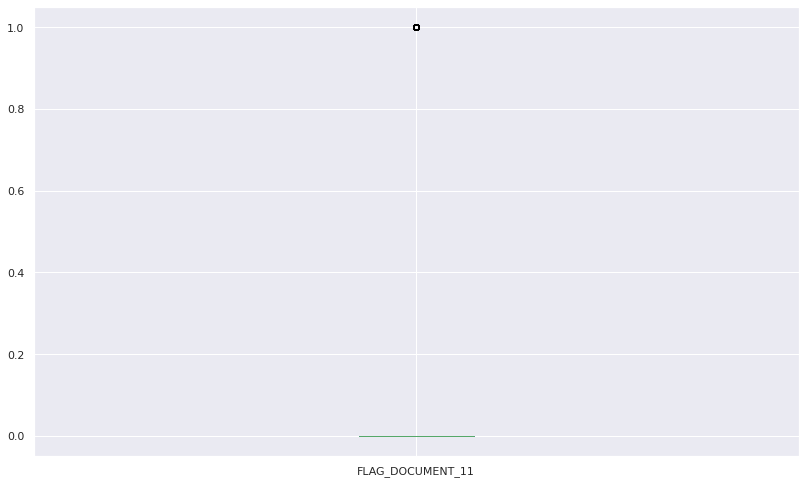

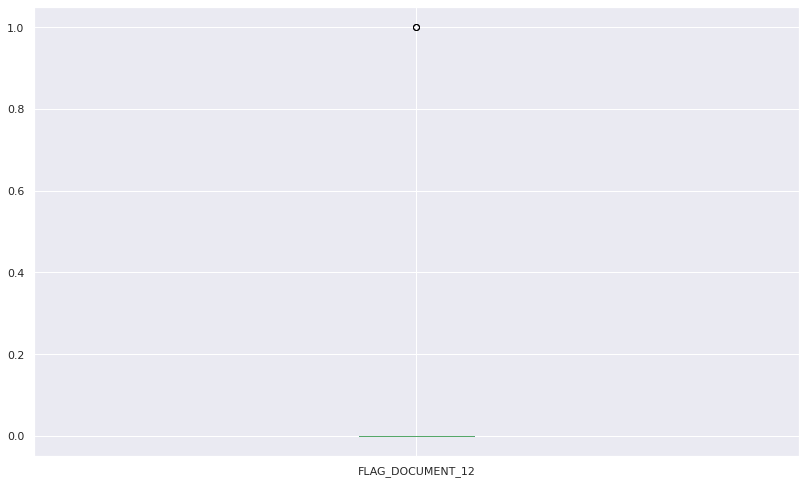

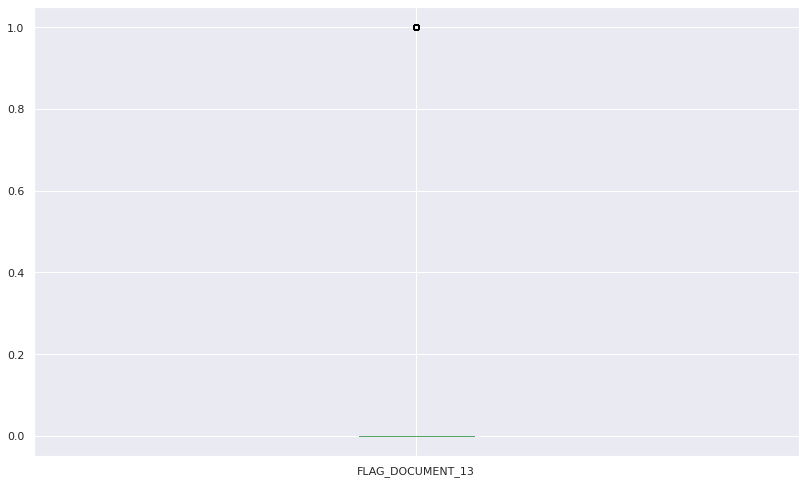

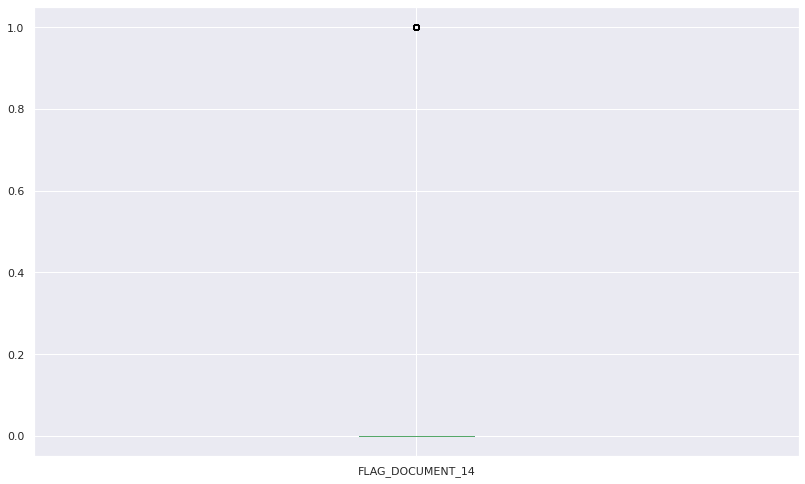

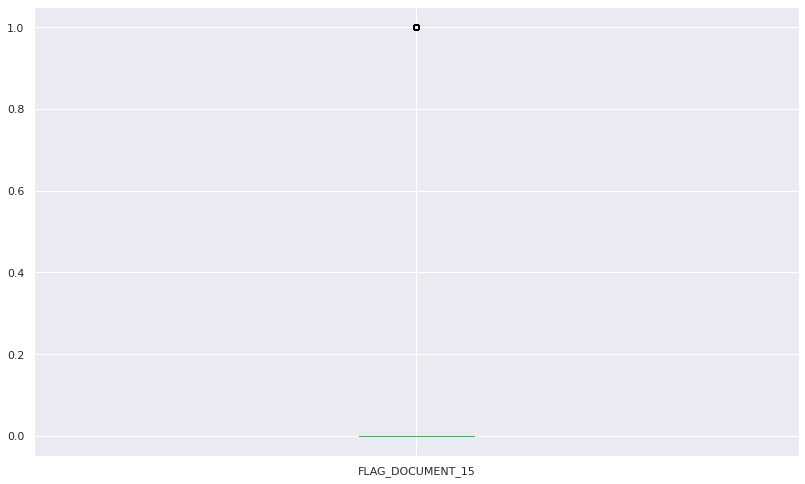

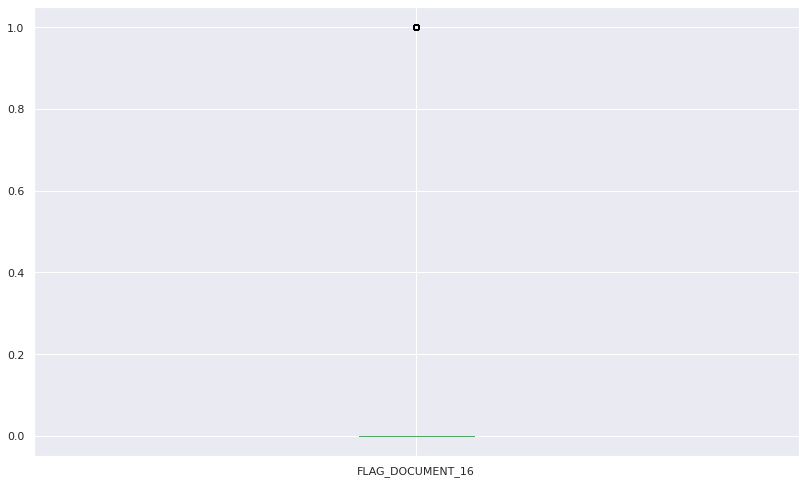

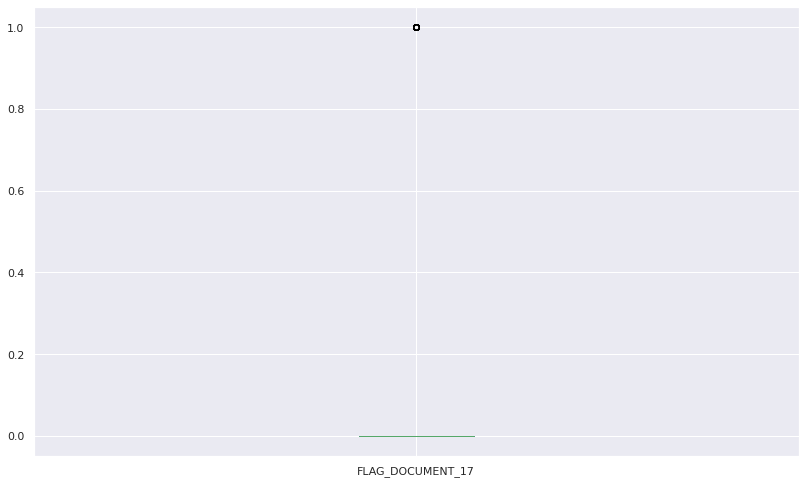

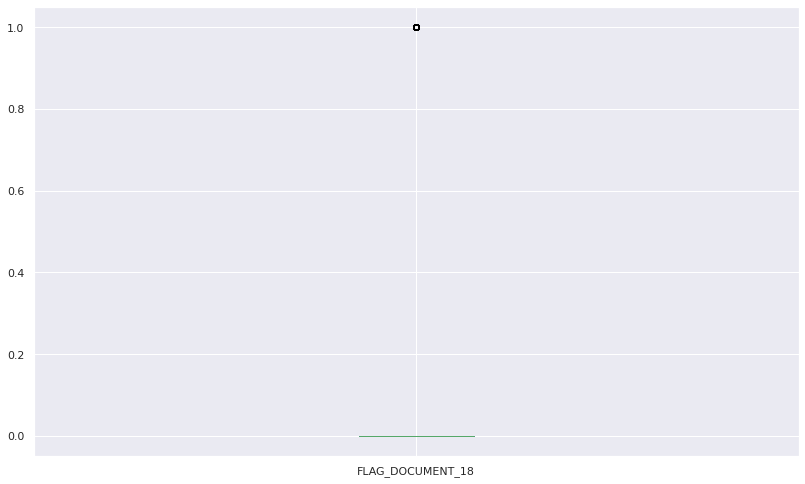

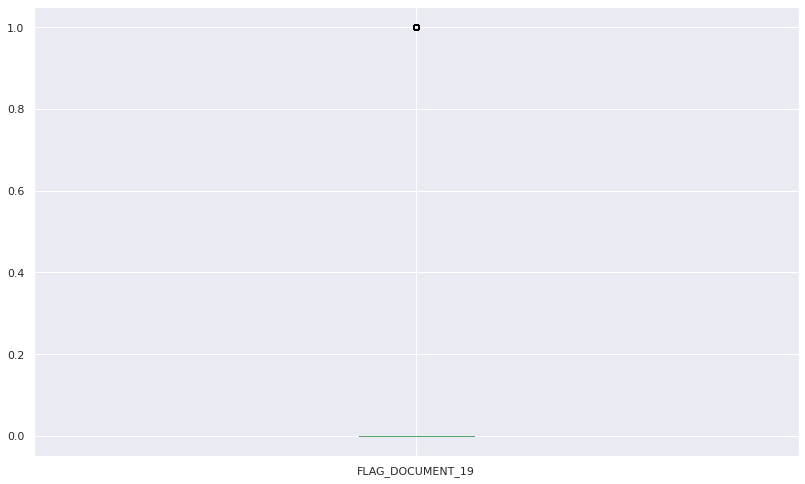

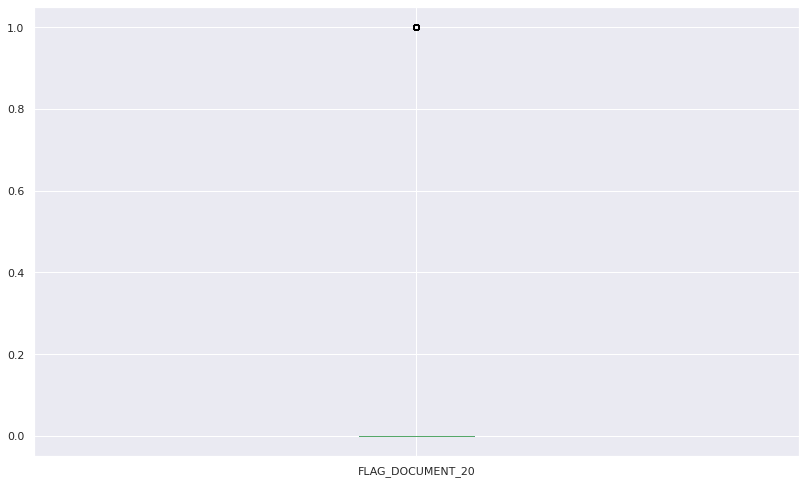

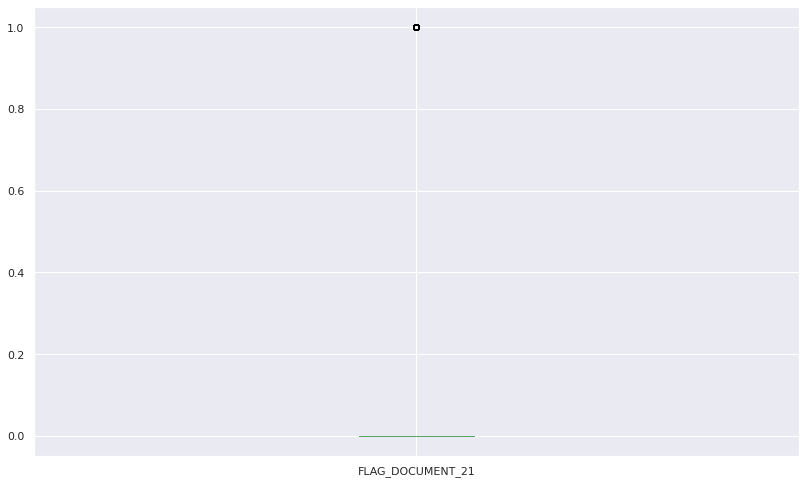

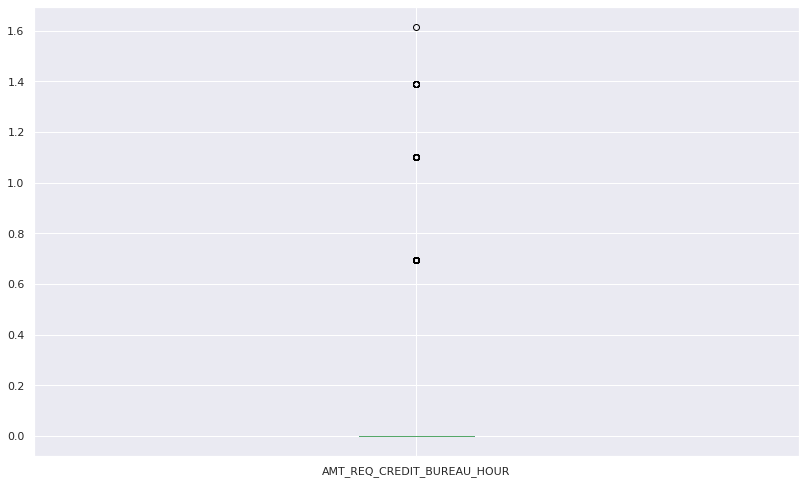

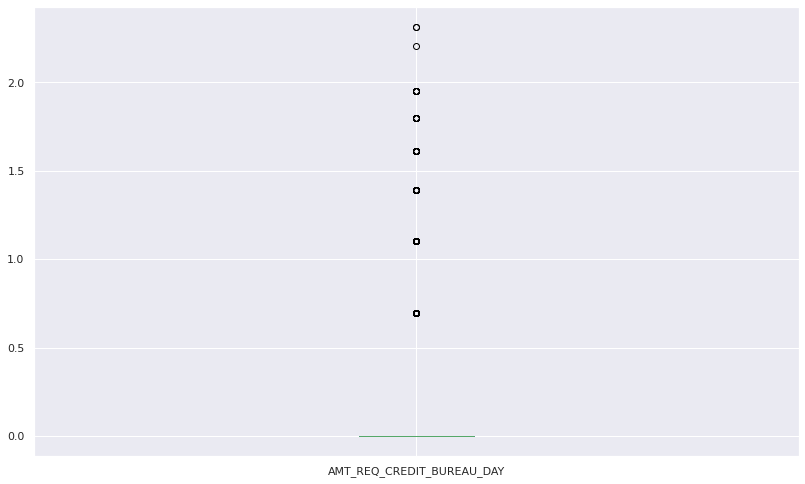

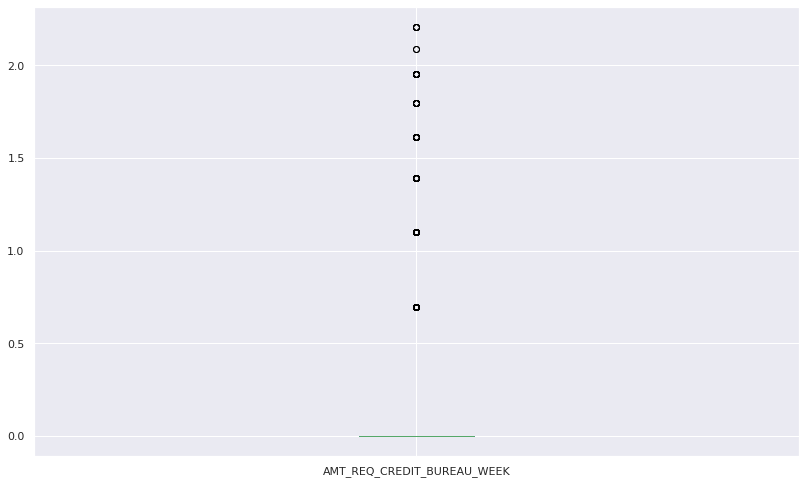

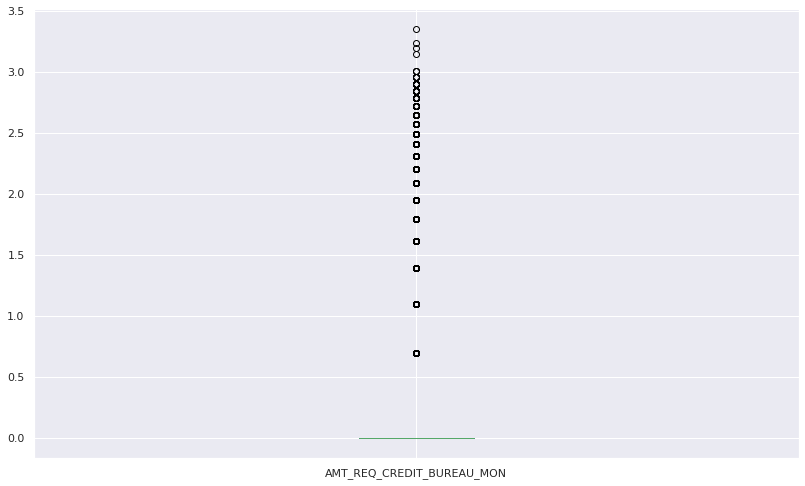

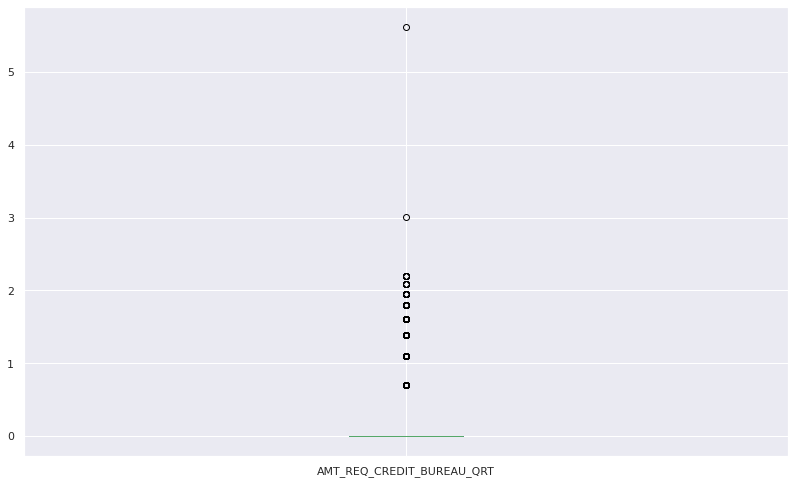

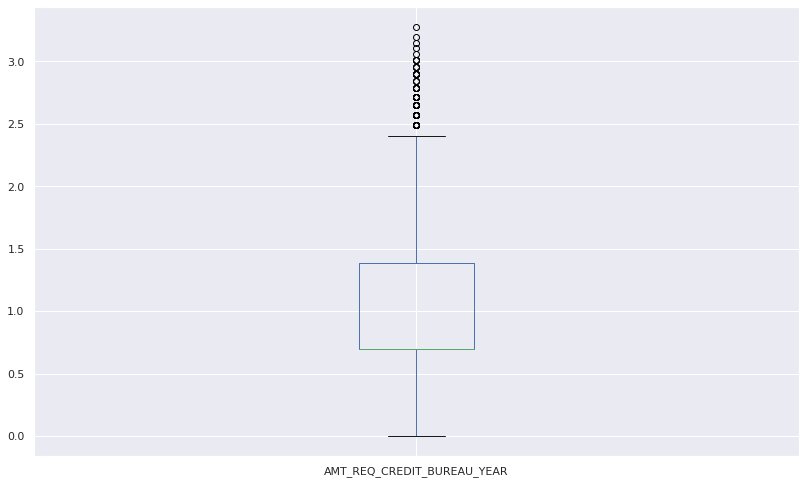

In [47]:
#Plot the Box Plots AFTER Outlier removal
for x in num_dtypes:#df_NaN.columns.values:
    df_Outlier[x].plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
    plt.show()

In [48]:
# Check max values after handling the outliers 
for x in outlier_skew_features:
  print(" %s   %s"  %(x, df_Outlier[x].describe()))

for x in outlier_nonskew_features:
  print(" %s   %s"  %(x, df_Outlier[x].describe()))

 CNT_CHILDREN   count    307507.000000
mean          0.253457
std           0.406544
min           0.000000
25%           0.000000
50%           0.000000
75%           0.693868
max           3.000000
Name: CNT_CHILDREN, dtype: float64
 REGION_POPULATION_RELATIVE   count    307507.000000
mean          0.020564
std           0.013419
min           0.000290
25%           0.009956
50%           0.018675
75%           0.028261
max           0.070007
Name: REGION_POPULATION_RELATIVE, dtype: float64
 OBS_30_CNT_SOCIAL_CIRCLE   count    307507.000000
mean          0.580363
std           0.719693
min           0.000000
25%           0.000000
50%           0.000000
75%           1.100425
max           4.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
 DEF_30_CNT_SOCIAL_CIRCLE   count    307507.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
 OBS_60_CNT_SOCIAL_CIRCL

In [49]:
df_Outlier.head(1)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                   0.0                     1      100002       1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             0                1           0.0         12.445199   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0   13.169063    10.269642        13.016251                    0.018627   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461        6.52131             3648.0             2120           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0         0.693868                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                     0.0                      0.0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                  1.100425                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                  1.100425                       0.0                  1134.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                    0.693868   

   NAME_INCOME_TYPE_enc  OCCUPATION_TYPE_enc  NAME_FAMILY_STATUS_enc  \
0              0.095885             0.105788                0.098077   

   ORGANIZATION_TYPE_enc  NAME_EDUCATION_TYPE_enc  
0               0.092996                 0.089399

# Split the data into Training and Test Set (80/20)

In [50]:
#Save Target featur in y and remaining in X
X_df = df_Outlier.copy()
X_df = X_df.select_dtypes(exclude=[object]) 

X_split_tar = X_df.iloc[:,X_df.columns != 'TARGET'].values
y_split_tar = X_df.TARGET.values

X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE_0         307507 non-null  float64
 1   NAME_CONTRACT_TYPE_1         307507 non-null  int64  
 2   SK_ID_CURR                   307507 non-null  int64  
 3   TARGET                       307507 non-null  int64  
 4   CODE_GENDER                  307507 non-null  int64  
 5   FLAG_OWN_CAR                 307507 non-null  int64  
 6   FLAG_OWN_REALTY              307507 non-null  int64  
 7   CNT_CHILDREN                 307507 non-null  float64
 8   AMT_INCOME_TOTAL             307507 non-null  float64
 9   AMT_CREDIT                   307507 non-null  float64
 10  AMT_ANNUITY                  307507 non-null  float64
 11  AMT_GOODS_PRICE              307507 non-null  float64
 12  REGION_POPULATION_RELATIVE   307507 non-null  float64
 13 

In [51]:
# Split into train and  test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_split_tar, y_split_tar, test_size=0.20)

In [52]:
print('X_train:')
print(X_train.shape)
print ("\n")
print('X_test:')
print(X_test.shape)
print ("\n")
print('X_Original:')
print(X_split_tar.shape)
print ("\n")
print('y_train :')
print("y_train - %s" %(y_train.shape))
print ("\n")
print('y_test:')
print("y_test - %s" %(y_test.shape))
print ("\n")
print('y_Original:')
print("y_split_tar- %s" %(y_split_tar.shape))

X_train:
(246005, 68)


X_test:
(61502, 68)


X_Original:
(307507, 68)


y_train :
y_train - 246005


y_test:
y_test - 61502


y_Original:
y_split_tar- 307507


In [53]:
df_Outlier.head(1)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  TARGET  \
0                   0.0                     1      100002       1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             0                1           0.0         12.445199   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0   13.169063    10.269642        13.016251                    0.018627   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461        6.52131             3648.0             2120           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0         0.693868                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                     0.0                      0.0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                  1.100425                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                  1.100425                       0.0                  1134.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                    0.693868   

   NAME_INCOME_TYPE_enc  OCCUPATION_TYPE_enc  NAME_FAMILY_STATUS_enc  \
0              0.095885             0.105788                0.098077   

   ORGANIZATION_TYPE_enc  NAME_EDUCATION_TYPE_enc  
0               0.092996                 0.089399

# Handling Imblance

In [54]:
# Imbalance Removal using SMOTE

# Consider only columns that are integers and float
#X_df = df_Outlier.copy()
#X_df = X_df.select_dtypes(exclude=[object]) 


from imblearn.over_sampling import SMOTE 
from collections import Counter
oversample = SMOTE()
#X = X_df.iloc[:,X_df.columns != 'TARGET'].values

#X and y are OVERSAMPLED values that now belong to the TRAIN dataset
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

#print(y)
#print(X_df)
#y = df.Class.values

In [55]:
#X and y are now belong to the TRAIN dataset
print (X_train_oversampled.shape)
print(y_train_oversampled.shape)

(452108, 68)
(452108,)


Counter({0: 226054, 1: 226054})
[[0.00000000e+00 1.00000000e+00 2.23924000e+05 ... 9.94458438e-02
  9.29962349e-02 8.93992884e-02]
 [6.93868360e-01 0.00000000e+00 4.48355000e+05 ... 9.80767538e-02
  9.29962349e-02 5.35511534e-02]
 [0.00000000e+00 1.00000000e+00 2.87914000e+05 ... 9.80767538e-02
  5.39964604e-02 8.93992884e-02]
 ...
 [6.93868360e-01 0.00000000e+00 2.08811000e+05 ... 9.80767538e-02
  9.29962349e-02 5.35511534e-02]
 [0.00000000e+00 1.00000000e+00 3.57963000e+05 ... 9.80767538e-02
  7.00000000e-02 8.93992884e-02]
 [0.00000000e+00 1.00000000e+00 4.38508000e+05 ... 7.55986805e-02
  1.01739040e-01 8.93992884e-02]]
[[0.00000000e+00 1.00000000e+00 4.51001000e+05 ... 7.55986805e-02
  6.42201835e-02 8.93992884e-02]
 [0.00000000e+00 1.00000000e+00 1.69096000e+05 ... 8.19423369e-02
  9.29962349e-02 8.48496643e-02]
 [0.00000000e+00 1.00000000e+00 2.41484000e+05 ... 7.55986805e-02
  1.01739040e-01 8.93992884e-02]
 ...
 [0.00000000e+00 1.00000000e+00 4.23419227e+05 ... 7.55986805e-02


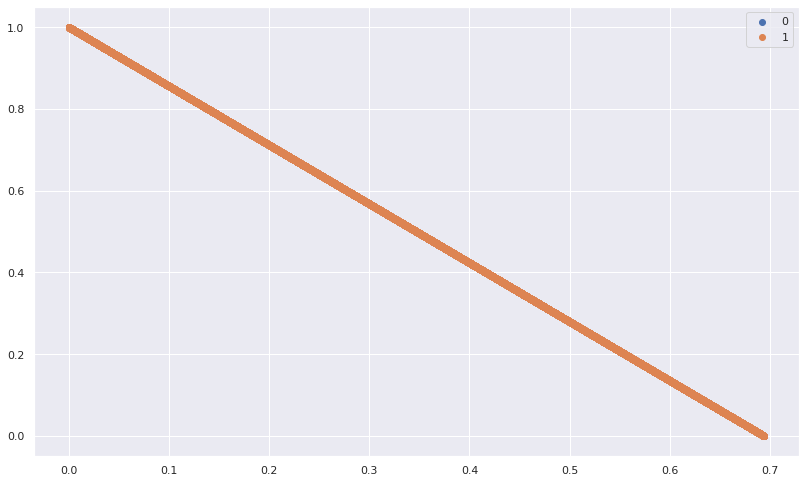

In [56]:
# SMOTE function to handle imbalance dataset

from collections import Counter
counter = Counter(y_train_oversampled)
print(counter)

# scatter plot of examples by class label for the TRAIN dataset
for label, _ in counter.items():
  row_ix = np.where(y_train_oversampled == label)[0]
  plt.scatter(X_train_oversampled[row_ix, 0], X_train_oversampled[row_ix, 1], label=str(label)) 
  print(X_train_oversampled[row_ix])

plt.legend()
plt.show()

TARGET
0    226054
1    226054
dtype: int64


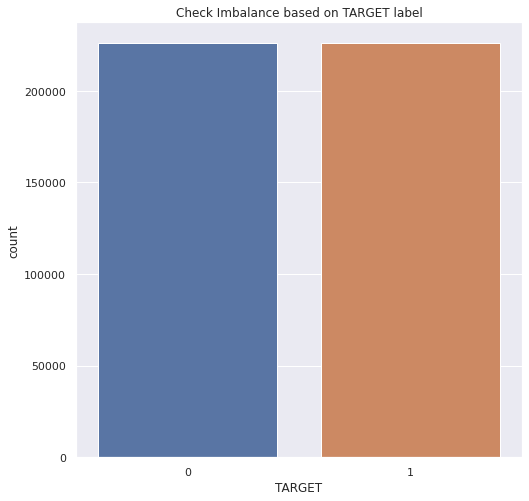

In [57]:
# Determine the distribution of target in the dataset. 0 indicates the number of people that were late on the first X installments and 1 indicates the number of people who were not late on the first X installments. 
#Convert numpy array y to data-frame
df_y = pd.DataFrame(data=y_train_oversampled, columns=["TARGET"])
import seaborn as sns
class_size = df_y.groupby('TARGET').size()
print(class_size)

#Plot the class distribution
plt.figure(figsize=(8, 8))
plt.title("Check Imbalance based on TARGET label")
sns.countplot('TARGET', data=df_y)

In [58]:
print(counter)

Counter({0: 226054, 1: 226054})


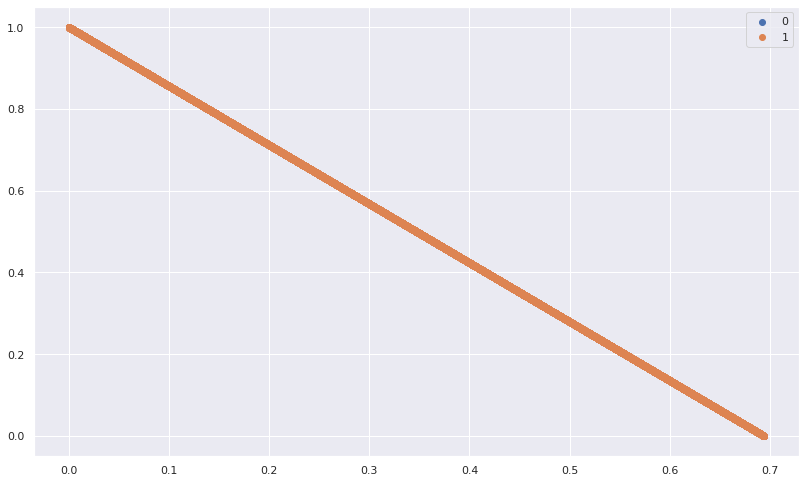

In [59]:
X_train_oversampled.shape

for label, _ in counter.items():
	row_ix = np.where(y_train_oversampled == label)[0]
	plt.scatter(X_train_oversampled[row_ix, 0], X_train_oversampled[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# K fold cross Validation (Stratified)

Determine ROC value BEFORE removing imbalance

In [60]:
import statistics as stat
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from statistics import mean

model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_split_tar, y_split_tar, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % stat.mean(scores))

Mean ROC AUC: 0.521


Determine ROC value AFTER removing imbalance

In [61]:
# K fold cross Validation is used to test the skill of the machine learning model after Data Tranformation (Imbalance/Outlier/Skew Removal)
# The values of K is 10 for better bias-variance trade off (underfitting/overfitting).
# We utilize a stratified approach so that both target categories are represented equally in each K fold.
# K -= 10 means the Training Dataset is divided into 10 subsets.In every iteration of the model, 9 of the subsets form the training dataset and one subset will be the test dataset. 

model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#X and y belong to the TRAIN dataset
scores = cross_val_score(model, X_train_oversampled, y_train_oversampled, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % stat.mean(scores))

Mean ROC AUC: 0.912


DATAFRAMECreate a dataframe from the numpy arrary with oversampled data generated from SMOTE

In [62]:
#Create a dataframe from the numpy arrary with oversampled data generated from SMOTE
X_rem_target = X_df.drop('TARGET', axis = 1)
df_X_imb_train = pd.DataFrame(X_train_oversampled, columns= X_rem_target.columns)
df_y_imb_train = pd.DataFrame(data= y_train_oversampled, columns=["TARGET"])

In [63]:
df_X_imb_train.shape

(452108, 68)

# Bias identification and Removal

In [64]:
! pip install aif360
from aif360 import datasets
from aif360.explainers import MetricTextExplainer
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

     |████████████████████████████████| 174kB 2.8MB/s 


In [65]:
#Concatenate X and y (train, imbalance removed) to form the TRAIN data frame

df_imb_train = pd.concat([df_X_imb_train, df_y_imb_train],axis = 1)

#myData = np#   ("data.txt", names=True)

In [66]:
df_imb_train.head(1)
#test = df_imb_train.values

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  CODE_GENDER  \
0                   0.0                   1.0    223924.0          0.0   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           1.0              1.0           0.0         12.184601    12.55451   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      9.93819         12.55451                    0.024854     12157.0   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       7.254841             6831.0           1853.0         1.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              0.0               1.0         0.0         0.0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0         1.100425                   2.0                          2.0   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                     15.0                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                0.693868                 0.693868   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                  0.693868                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                  0.693868                       0.0                   297.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0              0.0              1.0              0.0              0.0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0              0.0              0.0              0.0              0.0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0               0.0               0.0               0.0               0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                    0.693868   

   NAME_INCOME_TYPE_enc  OCCUPATION_TYPE_enc  NAME_FAMILY_STATUS_enc  \
0              0.074843             0.063943                0.099446   

   ORGANIZATION_TYPE_enc  NAME_EDUCATION_TYPE_enc  TARGET  
0               0.092996                 0.089399       0

Split data into test and train (Imbalanced removed, Target variable concatenated)

In [67]:

#dataset_imb_train, dataset_imb_test = test.split([0.8], shuffle=True)

test= X_train_oversampled#, y_train_oversampled,1)

In [68]:
# The privleged group is assigned the code one and the unprivleged group is assigned the code 0
privileged_groups = [{'CODE_GENDER': 1}]
unprivileged_groups = [{'CODE_GENDER': 0}]

Detect Bias

In [69]:
#Get DF in the IBM format
aif_train_ready2 = datasets.BinaryLabelDataset(favorable_label = 0.0,
                                               unfavorable_label= 1.0,
                                               df= df_imb_train,
                                               label_names=["TARGET"],
                                               protected_attribute_names = ['CODE_GENDER'],
                                               privileged_protected_attributes = [0,0,0])



In [70]:
#Disparte impact measurement for gender

metric_aif_train_ready2= BinaryLabelDatasetMetric(aif_train_ready2,
                                                  unprivileged_groups = unprivileged_groups,
                                                  privileged_groups = privileged_groups)

In [71]:
explainer_aif_train_ready2 = MetricTextExplainer(metric_aif_train_ready2)
print(explainer_aif_train_ready2.disparate_impact())

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0760061270671137


In [72]:
##ignore  
#metric_orig_train = BinaryLabelDatasetMetric( test,
#                                            unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

In [73]:
df_imb_train.head(10)

NAME_CONTRACT_TYPE_0  NAME_CONTRACT_TYPE_1  SK_ID_CURR  CODE_GENDER  \
0              0.000000                   1.0    223924.0          0.0   
1              0.693868                   0.0    448355.0          1.0   
2              0.000000                   1.0    287914.0          0.0   
3              0.000000                   1.0    199413.0          1.0   
4              0.000000                   1.0    349073.0          0.0   
5              0.000000                   1.0    223252.0          1.0   
6              0.000000                   1.0    326580.0          0.0   
7              0.000000                   1.0    451001.0          1.0   
8              0.000000                   1.0    297930.0          0.0   
9              0.000000                   1.0    237018.0          0.0   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           1.0              1.0      0.000000         12.184601   12.554510   
1           0.0              1.0      0.000000         12.554510   14.418756   
2           0.0              1.0      0.000000         12.323041   13.576324   
3           0.0              1.0      0.000000         12.024854   11.040372   
4           0.0              1.0      0.000000         11.605021   13.862834   
5           0.0              1.0      0.000000         11.605021   12.653424   
6           1.0              1.0      0.000000         12.184601   13.252994   
7           0.0              1.0      0.693868         11.836008   13.242839   
8           0.0              1.0      1.100425         11.605021   14.074472   
9           1.0              0.0      0.000000         12.091727   14.228600   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     9.938190        12.554510                    0.024854     12157.0   
1    11.307456        14.418756                    0.070007     19502.0   
2    10.432777        13.274510                    0.035168     22817.0   
3     8.694917        10.888499                    0.024854     16083.0   
4    10.778109        13.862834                    0.015107     18962.0   
5    10.014493        12.653424                    0.015107     23654.0   
6    10.543116        13.042558                    0.032044     19294.0   
7    10.119973        13.242839                    0.030850      8839.0   
8    10.417265        13.886242                    0.009982     14206.0   
9    10.565082        14.228600                    0.018921     17597.0   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       7.254841             6831.0           1853.0         1.0   
1       7.761746             9261.0           3057.0         1.0   
2      13.057583            10013.0           4979.0         1.0   
3       7.492712             4129.0           4325.0         1.0   
4       7.013964             3563.0           2498.0         1.0   
5      13.057583             5531.0           3652.0         1.0   
6       8.367401             4209.0           2808.0         1.0   
7       6.886915             7919.0           1501.0         1.0   
8       8.161051             2934.0           5119.0         1.0   
9       8.259178             8074.0           1145.0         1.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              0.0               1.0         0.0         0.0   
1             1.0              0.0               1.0         1.0         0.0   
2             0.0              0.0               1.0         0.0         0.0   
3             1.0              1.0               1.0         1.0         0.0   
4             1.0              0.0               1.0         0.0         0.0   
5             0.0              0.0               1.0         1.0         0.0   
6             1.0              0.0               1.0         0.0         0.0   
7             1.0              1.0               1.0         0.0         0.0   
8           

In [74]:
#RW = Reweighing(unprivileged_groups=unprivileged_groups,
                #privileged_groups=privileged_groups)
#dataset_transf_train = RW.fit_transform(dataset_orig_train)

Evaluate Training dataset with SVC 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
model = SVC()
# evaluate pipeline
cv = KFold(n_splits=10, random_state=1)
#X and y belong to the TRAIN dataset
scores = cross_val_score(model, X_train_oversampled, y_train_oversampled, scoring='roc_auc', cv=cv, n_jobs=-1)
print('SVC Mean ROC AUC: %.3f' % stat.mean(scores))